#**CSC 4040 Spring 2021 Project**
#**Team "Buzzing with Data"**
#**By: Matthew Brotherton & Tyler Fulghum**


In [ ]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator

import pylab
from scipy.stats import norm
import seaborn as sns

from sklearn import tree

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.feature_selection import RFE
from sklearn.impute import IterativeImputer

from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import export_graphviz

import statsmodels.api as sm
from statsmodels.tools import eval_measures
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf

from xgboost import XGBRegressor
import xgboost as xgb

from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#**What does our data look like?**

#**MUST HAVE dengue_features_train.csv, dengue_labels_train.csv, and dengue_features_test.csv UPLOADED TO COLAB LOCAL FILE STORAGE**

In [ ]:
train_features = pd.read_csv('dengue_features_train.csv', index_col=[0,1,2])
train_labels = pd.read_csv('dengue_labels_train.csv', index_col=[0,1,2])

In [ ]:

sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']

print('San Juan')
print('features: ', sj_train_features.shape)
print('labels  : ', sj_train_labels.shape)

print('\nIquitos')
print('features: ', iq_train_features.shape)
print('labels  : ', iq_train_labels.shape)

San Juan
features:  (936, 21)
labels  :  (936, 1)

Iquitos
features:  (520, 21)
labels  :  (520, 1)


In [ ]:
label_data = train_labels.total_cases

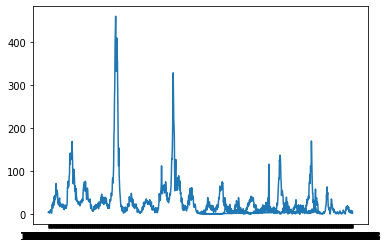

In [ ]:
plt.plot(train_features.week_start_date, train_labels.total_cases)

In [ ]:
#iq_train_features["week_start_date"] = pd.to_datetime(iq_train_features["week_start_date"])
#test["week_start_date"] = pd.to_datetime(test["week_start_date"])

In [ ]:
sj_train_features["week_start_date"] = pd.to_datetime(sj_train_features["week_start_date"])
#test["week_start_date"] = pd.to_datetime(test["week_start_date"])

In [ ]:
#iq_train_features['month'] = iq_train_features['week_start_date'].dt.month
#test['month'] = test['week_start_date'].dt.month

In [ ]:
sj_train_features['month'] = sj_train_features['week_start_date'].dt.month
#test['month'] = test['week_start_date'].dt.month

In [ ]:
sj_train_features.head()

week_start_date  ...  station_precip_mm
year weekofyear                  ...                   
1990 18              1990-04-30  ...               16.0
     19              1990-05-07  ...                8.6
     20              1990-05-14  ...               41.4
     21              1990-05-21  ...                4.0
     22              1990-05-28  ...                5.8

[5 rows x 21 columns]

In [ ]:
sj_train_features

week_start_date   ndvi_ne  ...  station_precip_mm  month
year weekofyear                            ...                          
1990 18              1990-04-30  0.122600  ...               16.0      4
     19              1990-05-07  0.169900  ...                8.6      5
     20              1990-05-14  0.032250  ...               41.4      5
     21              1990-05-21  0.128633  ...                4.0      5
     22              1990-05-28  0.196200  ...                5.8      5
...                         ...       ...  ...                ...    ...
2008 13              2008-03-25  0.077850  ...                1.8      3
     14              2008-04-01 -0.038000  ...                0.5      4
     15              2008-04-08 -0.155200  ...               30.7      4
     16              2008-04-15  0.001800  ...               11.2      4
     17              2008-04-22 -0.037000  ...                0.3      4

[936 rows x 22 columns]

In [ ]:
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

We have noted that the city timelines do not directly match up. There is a time discrepancy of 5 years. (WE SHOULD ALIGN GRAPHS BY THE SHARED 5 YEARS AND EXPERIMENT WITH DIFFERENT SCALES)

#**Feature Plots w.r.t. Time (for both Iquitos and San Juan)**

#**Reanalysis Specific Humidity G per Kg**

Text(0.5, 0, 'Time')

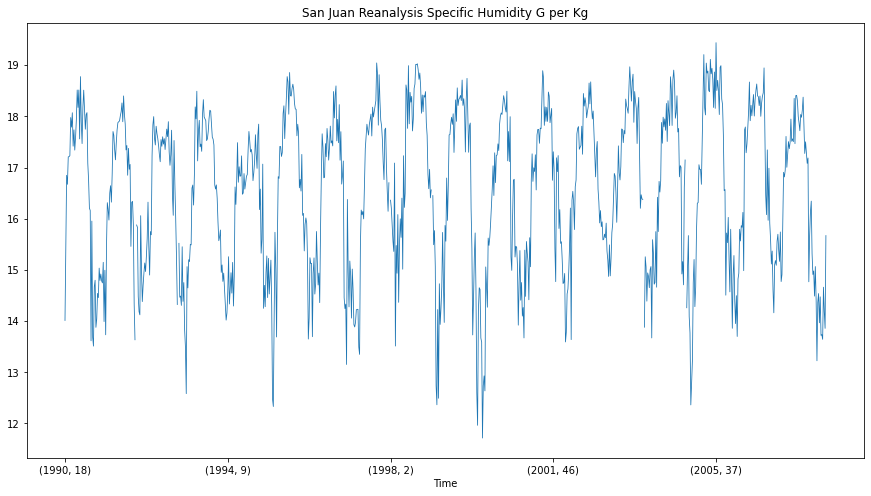

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.reanalysis_specific_humidity_g_per_kg.plot.line(lw=0.8))

plt.title('San Juan Reanalysis Specific Humidity G per Kg')
plt.xlabel('Time')


Text(0.5, 0, 'Time')

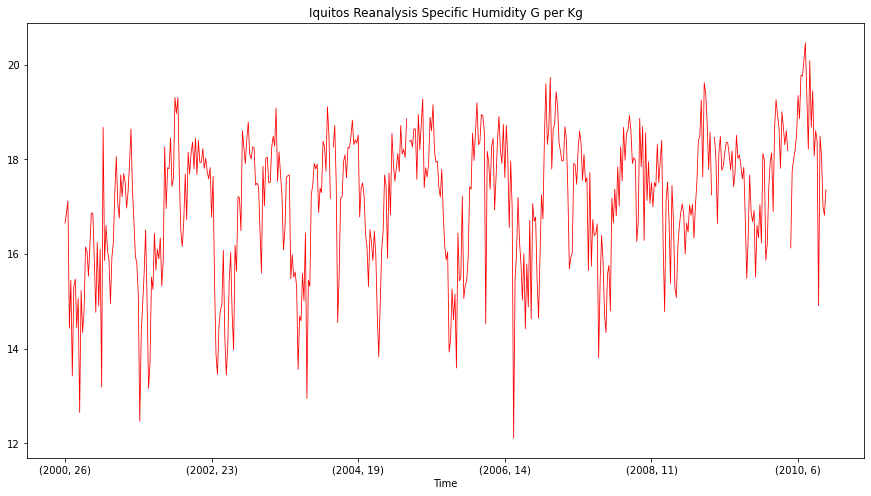

In [ ]:
plt.figure(figsize=(15,8))

(iq_train_features.reanalysis_specific_humidity_g_per_kg.plot.line(lw=0.8, color = 'r'))

plt.title('Iquitos Reanalysis Specific Humidity G per Kg')
plt.xlabel('Time')

Text(0, 0.5, 'Grams of Water Vapor per Kg of Air')

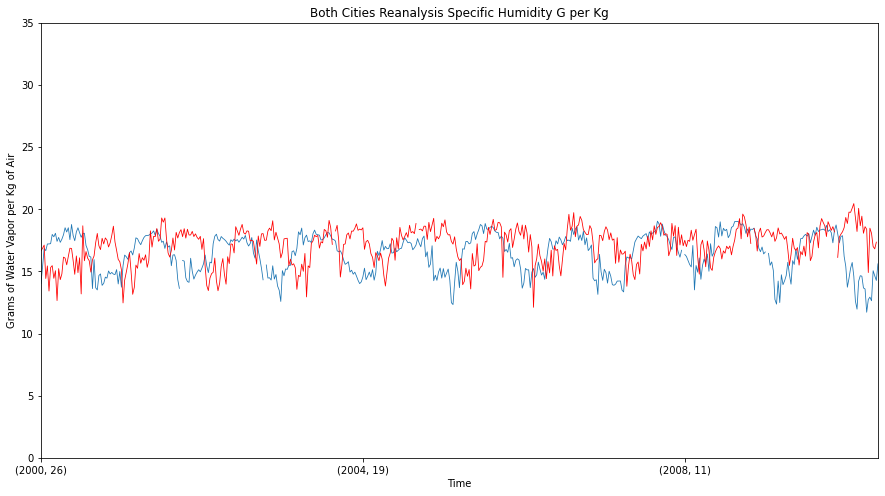

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.reanalysis_specific_humidity_g_per_kg.plot.line(lw=0.8))
(iq_train_features.reanalysis_specific_humidity_g_per_kg.plot.line(lw=0.8, color='r'))

plt.xlim([0, 520])
plt.ylim([0, 35])

plt.title('Both Cities Reanalysis Specific Humidity G per Kg')
plt.xlabel('Time')
plt.ylabel('Grams of Water Vapor per Kg of Air')

#**Reanalysis Dew Point Temp K**

Text(0.5, 0, 'Time')

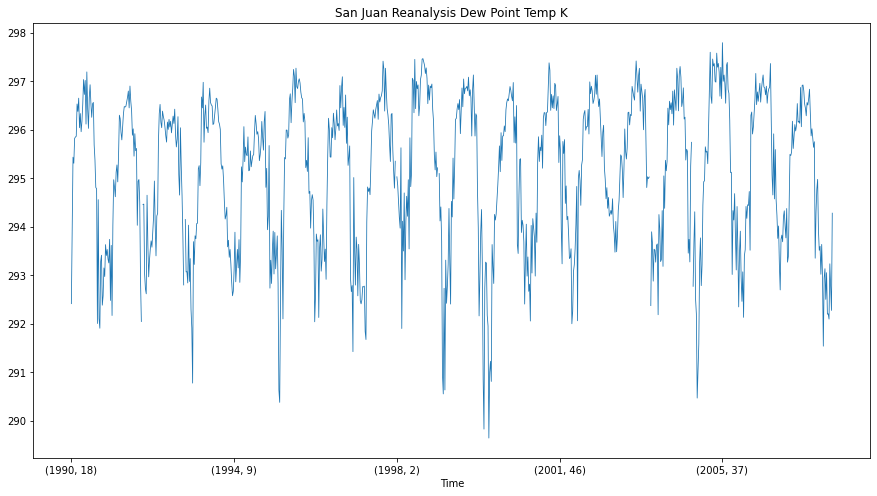

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.reanalysis_dew_point_temp_k.plot.line(lw=0.8))

plt.title('San Juan Reanalysis Dew Point Temp K')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

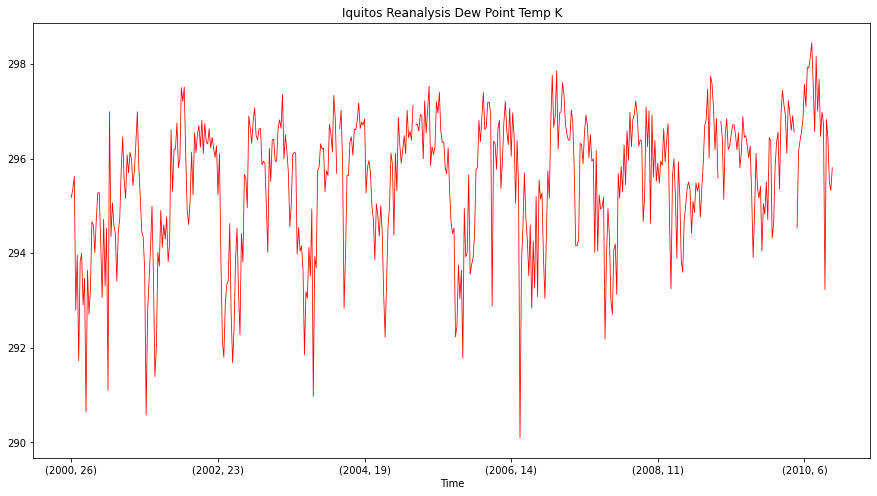

In [ ]:
plt.figure(figsize=(15,8))

(iq_train_features.reanalysis_dew_point_temp_k.plot.line(lw=0.8, color = 'r'))

plt.title('Iquitos Reanalysis Dew Point Temp K')
plt.xlabel('Time')

Text(0, 0.5, 'Temperature')

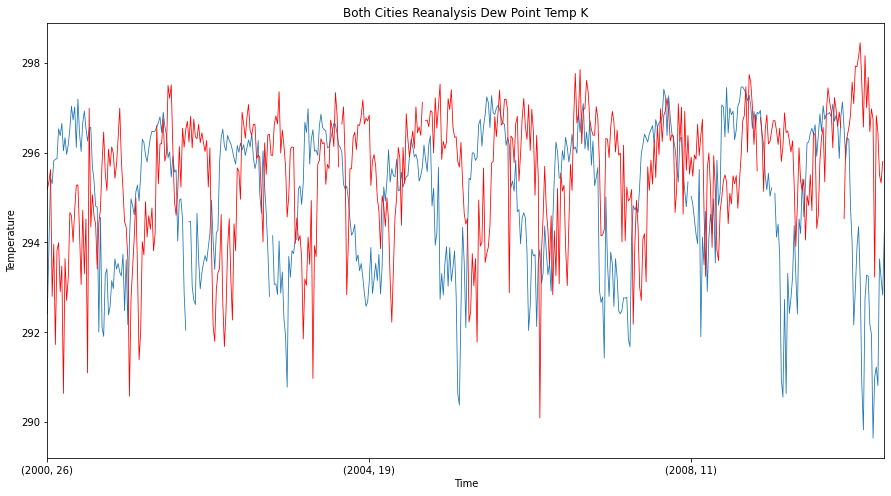

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.reanalysis_dew_point_temp_k.plot.line(lw=0.8))
(iq_train_features.reanalysis_dew_point_temp_k.plot.line(lw=0.8, color = 'r'))

plt.xlim([0, 520])

plt.title('Both Cities Reanalysis Dew Point Temp K')
plt.xlabel('Time')
plt.ylabel('Temperature')

#**Station Avg Temp C**

Text(0.5, 0, 'Time')

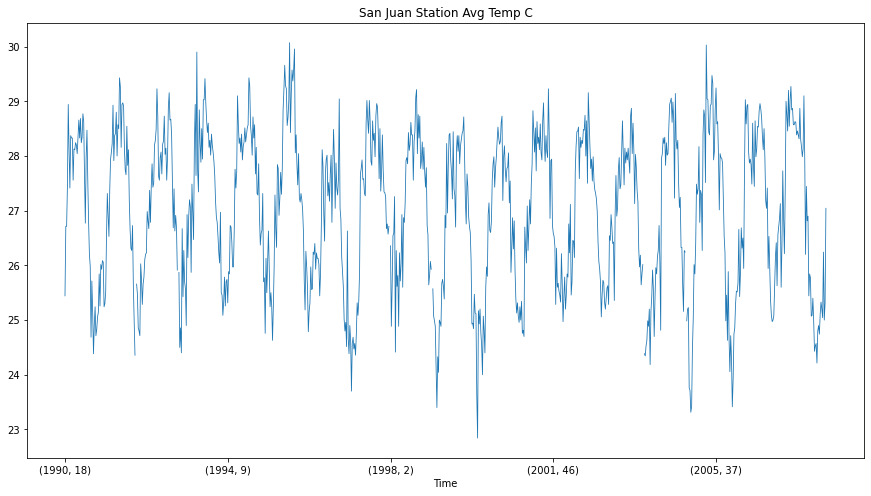

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.station_avg_temp_c.plot.line(lw=0.8))

plt.title('San Juan Station Avg Temp C')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

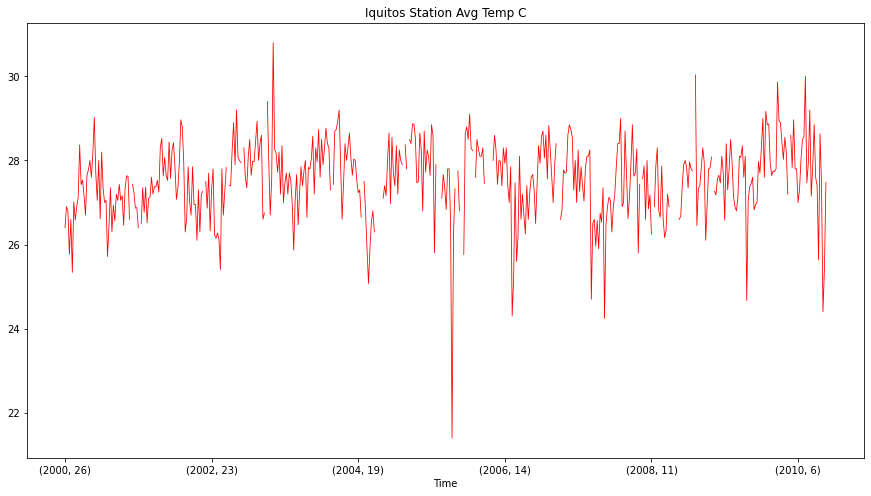

In [ ]:
plt.figure(figsize=(15,8))

(iq_train_features.station_avg_temp_c.plot.line(lw=0.8, color = 'r'))

plt.title('Iquitos Station Avg Temp C')
plt.xlabel('Time')

Text(0, 0.5, 'Temperature')

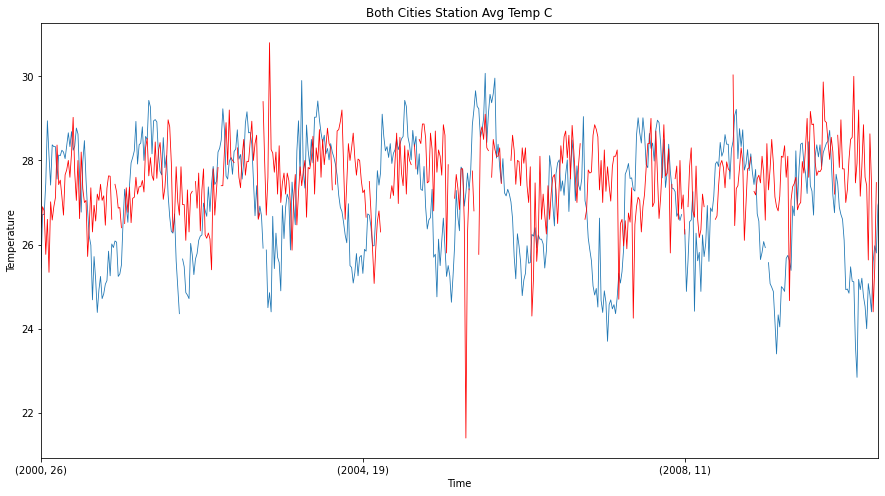

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.station_avg_temp_c.plot.line(lw=0.8))
(iq_train_features.station_avg_temp_c.plot.line(lw=0.8, color = 'r'))

plt.xlim([0, 520])

plt.title('Both Cities Station Avg Temp C')
plt.xlabel('Time')
plt.ylabel('Temperature')

#**Station Min Temp C**

Text(0.5, 0, 'Time')

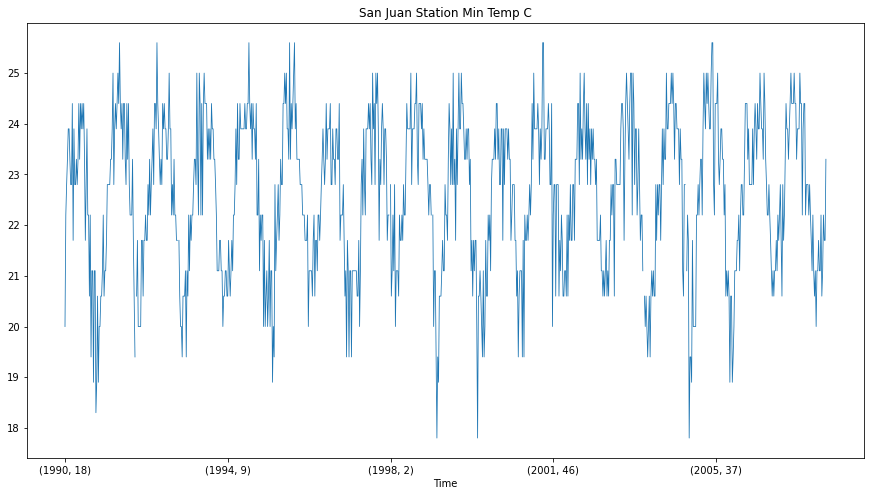

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.station_min_temp_c.plot.line(lw=0.8))

plt.title('San Juan Station Min Temp C')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

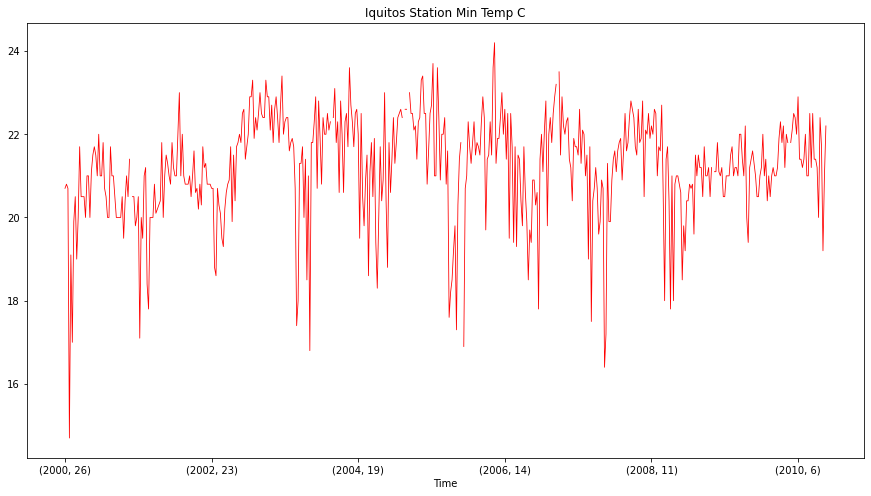

In [ ]:
plt.figure(figsize=(15,8))

(iq_train_features.station_min_temp_c.plot.line(lw=0.8, color = 'r'))

plt.title('Iquitos Station Min Temp C')
plt.xlabel('Time')

Text(0, 0.5, 'Temperature')

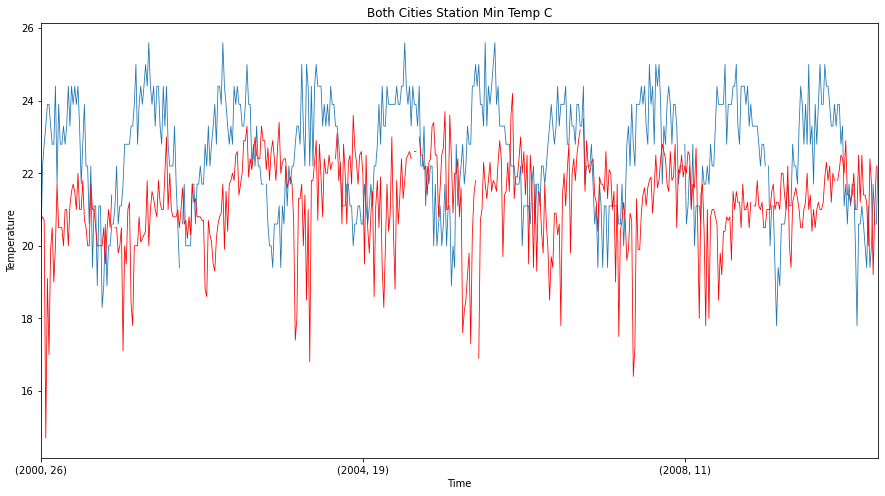

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.station_min_temp_c.plot.line(lw=0.8))
(iq_train_features.station_min_temp_c.plot.line(lw=0.8, color = 'r'))

plt.xlim([0, 520])

plt.title('Both Cities Station Min Temp C')
plt.xlabel('Time')
plt.ylabel('Temperature')

#**Precipitation Amt in Millimeters**

Text(0, 0.5, 'Precipitation Amt Millimeters')

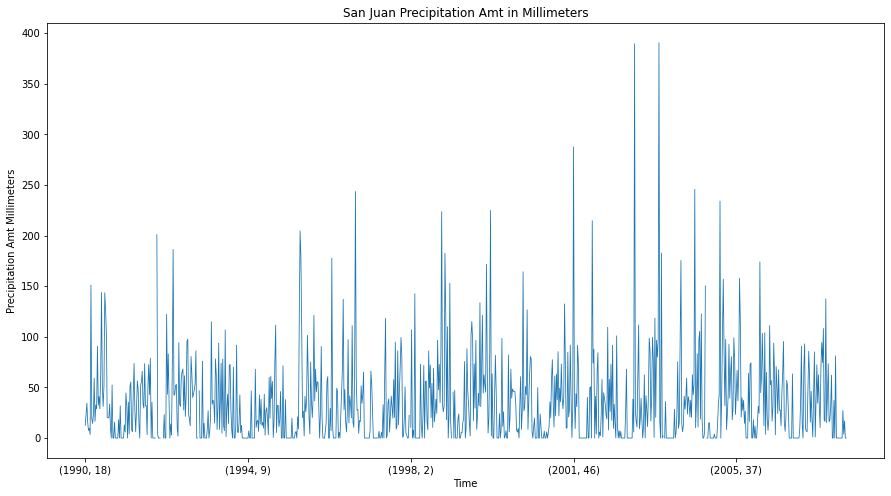

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.precipitation_amt_mm.plot.line(lw=0.8))

plt.title('San Juan Precipitation Amt in Millimeters')
plt.xlabel('Time')
plt.ylabel('Precipitation Amt Millimeters')

Text(0, 0.5, 'Precipitation Amt Millimeters')

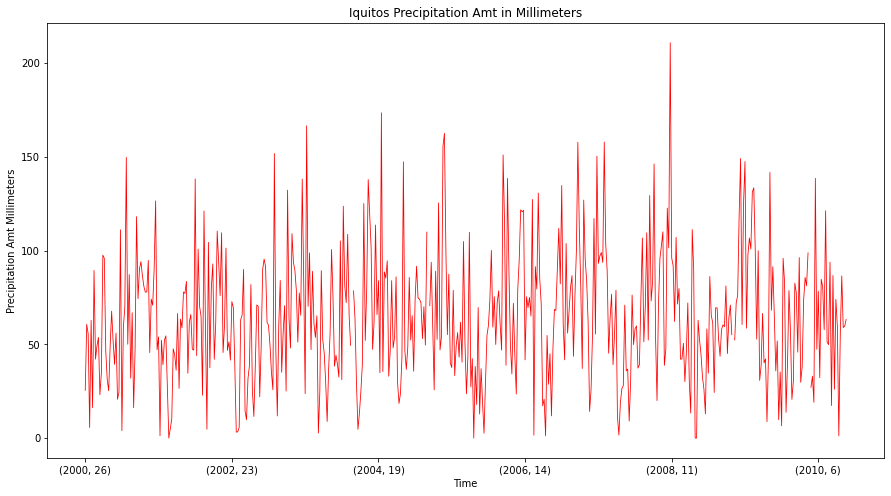

In [ ]:
plt.figure(figsize=(15,8))

(iq_train_features.precipitation_amt_mm.plot.line(lw=0.8, color='r'))

plt.title('Iquitos Precipitation Amt in Millimeters')
plt.xlabel('Time')
plt.ylabel('Precipitation Amt Millimeters')

Text(0, 0.5, 'Precipitation Amt Millimeters')

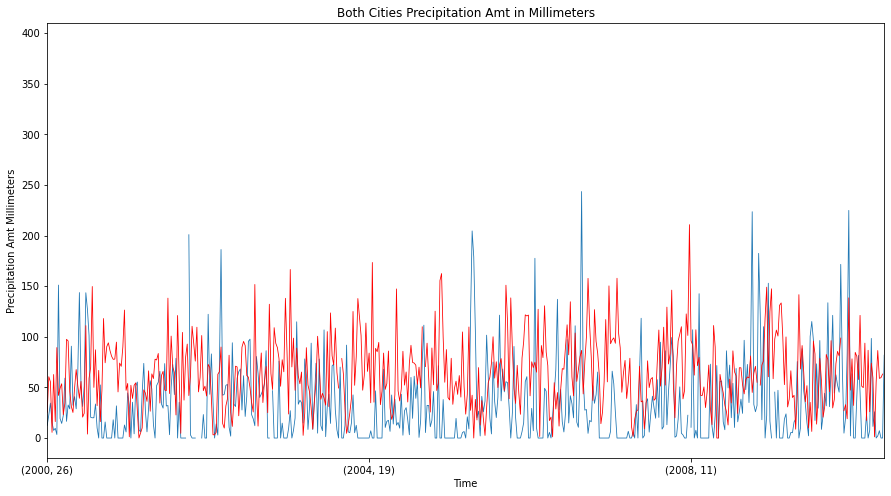

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.precipitation_amt_mm.plot.line(lw=0.8))
(iq_train_features.precipitation_amt_mm.plot.line(lw=0.8, color = 'r'))

plt.xlim([0, 520])

plt.title('Both Cities Precipitation Amt in Millimeters')
plt.xlabel('Time')
plt.ylabel('Precipitation Amt Millimeters')

#**Precipitation Amt vs Station Precipitation Amt (for both San Juan and Iquitos)**

Text(0, 0.5, 'Precipitation Amt Millimeters')

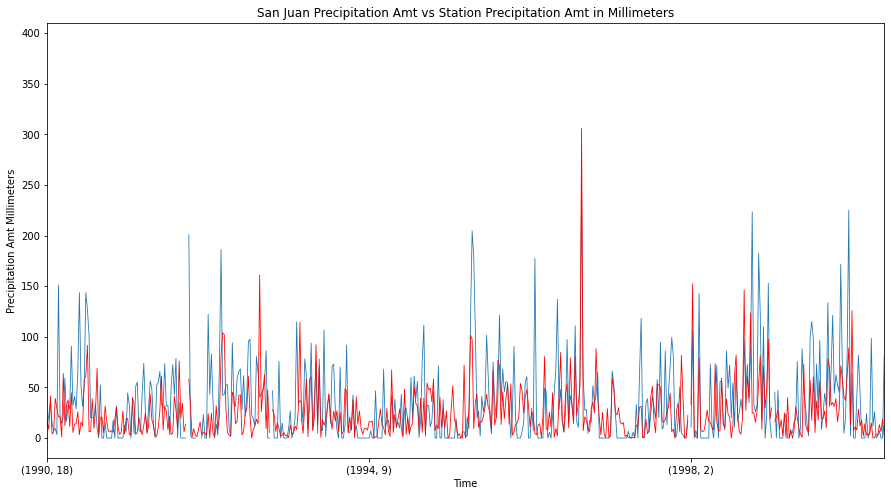

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.precipitation_amt_mm.plot.line(lw=0.8))
(sj_train_features.station_precip_mm.plot.line(lw=0.8, color = 'r'))

plt.xlim([0, 520])

plt.title('San Juan Precipitation Amt vs Station Precipitation Amt in Millimeters')
plt.xlabel('Time')
plt.ylabel('Precipitation Amt Millimeters')

Text(0, 0.5, 'Precipitation Amt Millimeters')

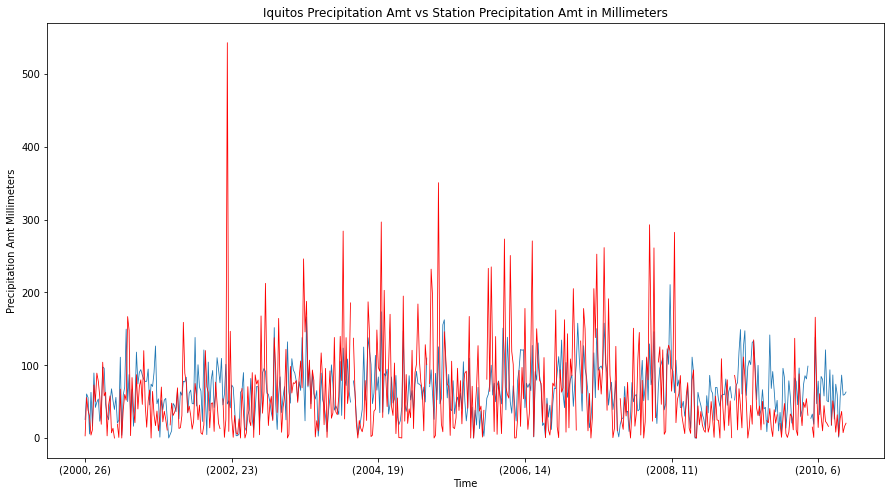

In [ ]:
plt.figure(figsize=(15,8))

(iq_train_features.precipitation_amt_mm.plot.line(lw=0.8))
(iq_train_features.station_precip_mm.plot.line(lw=0.8, color = 'r'))

#plt.xlim([0, 520])

plt.title('Iquitos Precipitation Amt vs Station Precipitation Amt in Millimeters')
plt.xlabel('Time')
plt.ylabel('Precipitation Amt Millimeters')

#**Precipitation Amt in Kg per Meter Squared**

Note that Iquitos tends to get more rain per year, although San Juan had a very large rainfall in one year, near 2002.

Text(0, 0.5, 'Precipitation Amt Kg per Meter Squared')

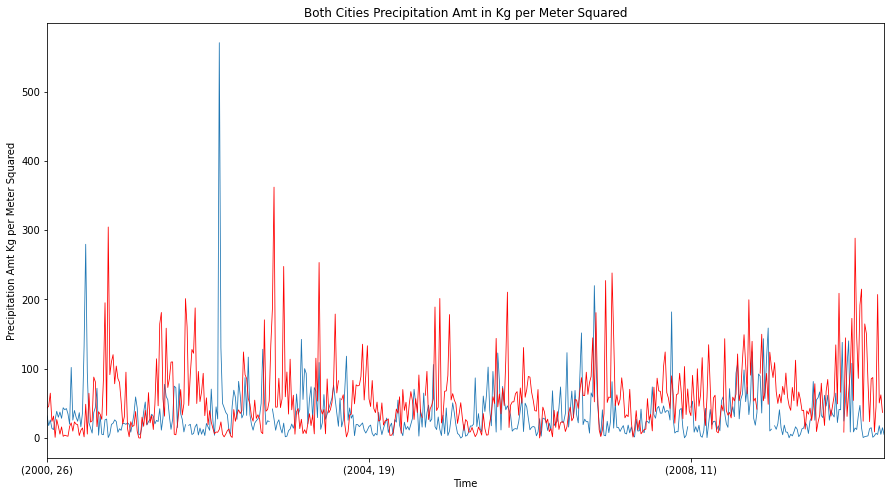

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.reanalysis_precip_amt_kg_per_m2.plot.line(lw=0.8))
(iq_train_features.reanalysis_precip_amt_kg_per_m2.plot.line(lw=0.8, color = 'r'))

plt.xlim([0, 520])

plt.title('Both Cities Precipitation Amt in Kg per Meter Squared')
plt.xlabel('Time')
plt.ylabel('Precipitation Amt Kg per Meter Squared')

#**Reanalysis Air Temp K**

Note that the temperatures are almost identical, except it is slightly hotter overall in San Juan

Text(0, 0.5, 'Temp in K')

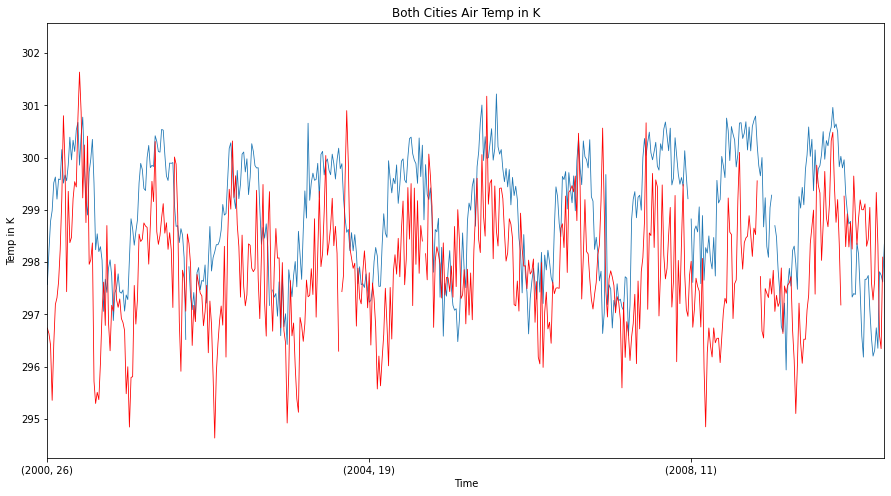

In [ ]:
plt.figure(figsize=(15,8))

(sj_train_features.reanalysis_air_temp_k.plot.line(lw=0.8))
(iq_train_features.reanalysis_air_temp_k.plot.line(lw=0.8, color = 'r'))

plt.xlim([0, 520])

plt.title('Both Cities Air Temp in K')
plt.xlabel('Time')
plt.ylabel('Temp in K')

#**How does Missing Data affect these Features?**

#**Percent of Feature NA's**

This function calculates what percent of a feature is comprised of null values. These null values get filled in with various methods.

Our least filled feature is the northeast vegetation index. (ndvi_ne)

In [ ]:
train_features.isnull().mean().sort_values(ascending=False)

ndvi_ne                                  0.133242
ndvi_nw                                  0.035714
station_diur_temp_rng_c                  0.029533
station_avg_temp_c                       0.029533
station_precip_mm                        0.015110
ndvi_se                                  0.015110
ndvi_sw                                  0.015110
station_max_temp_c                       0.013736
station_min_temp_c                       0.009615
reanalysis_sat_precip_amt_mm             0.008929
precipitation_amt_mm                     0.008929
reanalysis_avg_temp_k                    0.006868
reanalysis_air_temp_k                    0.006868
reanalysis_min_air_temp_k                0.006868
reanalysis_dew_point_temp_k              0.006868
reanalysis_max_air_temp_k                0.006868
reanalysis_precip_amt_kg_per_m2          0.006868
reanalysis_relative_humidity_percent     0.006868
reanalysis_specific_humidity_g_per_kg    0.006868
reanalysis_tdtr_k                        0.006868


#**Possibly feature engineer a global NDVI feature? Or is the % NE missing too substantial?**

Text(0.5, 0, 'Time')

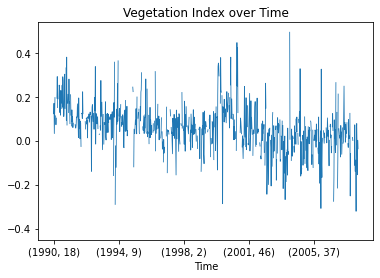

In [ ]:
(sj_train_features
     .ndvi_ne
     .plot
     .line(lw=0.8))

plt.title('Vegetation Index over Time')
plt.xlabel('Time')

In [ ]:
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

This uses a forward fill method. May try other fills inn the future such as backfill.

In [ ]:
print('San Juan')
print('mean: ', sj_train_labels.mean()[0])
print('var :', sj_train_labels.var()[0])

print('\nIquitos')
print('mean: ', iq_train_labels.mean()[0])
print('var :', iq_train_labels.var()[0])

San Juan
mean:  34.18055555555556
var : 2640.045439691045

Iquitos
mean:  7.565384615384615
var : 115.8955239365642


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc45fa3ee50>]],
      dtype=object)

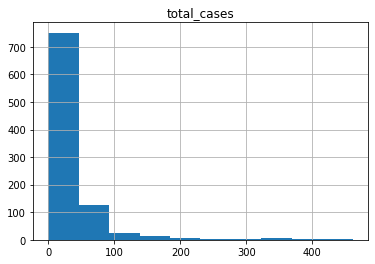

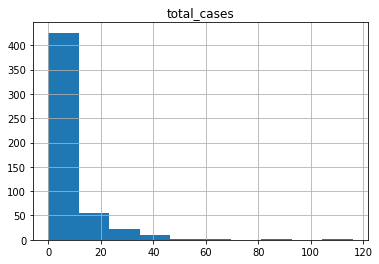

In [ ]:
sj_train_labels.hist()
iq_train_labels.hist()

Variance greater than the mean suggests total_cases can be described by a negative binomial distribution, so we'll use a negative binomial regression below.

Text(0.5, 1.0, 'San Juan Variable Correlations')

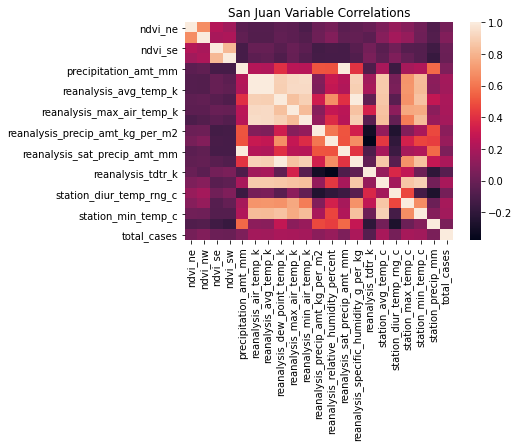

In [ ]:
sj_train_features['total_cases'] = sj_train_labels.total_cases
iq_train_features['total_cases'] = iq_train_labels.total_cases

sj_correlations = sj_train_features.corr()
iq_correlations = iq_train_features.corr()

sj_corr_heat = sns.heatmap(sj_correlations)
plt.title('San Juan Variable Correlations')

Text(0.5, 1.0, 'Iquitos Variable Correlations')

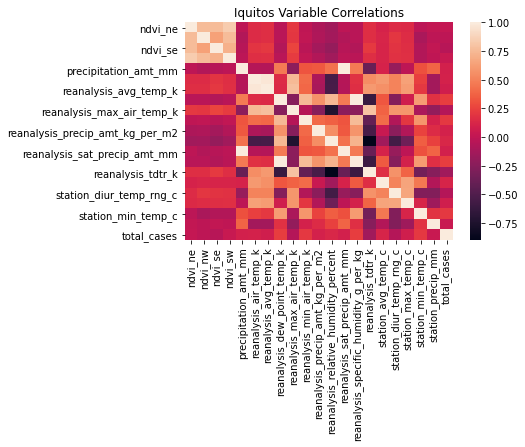

In [ ]:
iq_corr_heat = sns.heatmap(iq_correlations)
plt.title('Iquitos Variable Correlations')

#**Correlations?**

In [ ]:
sj_train_features.isnull().sum().sort_values(ascending =False)

ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_sat_precip_amt_mm               9
reanalysis_min_air_temp_k                  6
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
station_precip_mm                          6
reanalysis_relative_humidity_percent       6
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_min_temp_c                         6
total_cases                                0
dtype: int64

In [ ]:
iq_train_features.isnull().sum().sort_values(ascending =False)

station_diur_temp_rng_c                  37
station_avg_temp_c                       37
station_precip_mm                        16
station_max_temp_c                       14
station_min_temp_c                        8
reanalysis_precip_amt_kg_per_m2           4
reanalysis_max_air_temp_k                 4
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_relative_humidity_percent      4
reanalysis_min_air_temp_k                 4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
ndvi_se                                   3
ndvi_nw                                   3
ndvi_ne                                   3
ndvi_sw                                   3
total_cases                               0
dtype: int64

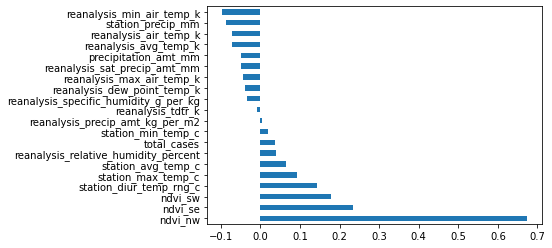

In [ ]:
(sj_correlations
     .ndvi_ne
     .drop('ndvi_ne') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

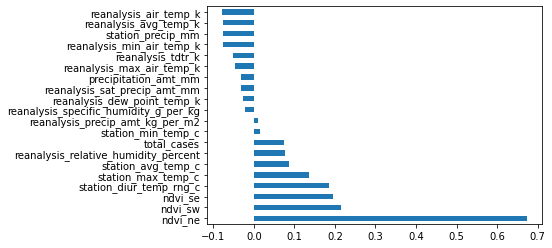

In [ ]:
(sj_correlations
     .ndvi_nw
     .drop('ndvi_nw') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

No handles with labels found to put in legend.


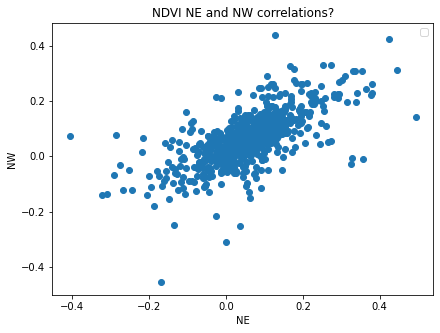

In [ ]:
plt.figure(figsize=[15,5])
ax = plt.subplot(121)

x = sj_train_features['ndvi_ne']
y = sj_train_features['ndvi_nw']

#for i,j in zip(x,y):
  #ax.annotate("({},{})".format(i, j), xy=(i, j))

plt.scatter(x,y)
plt.title("NDVI NE and NW correlations?")
plt.xlabel("NE")
plt.ylabel("NW")
plt.plot()
#plot ground truth to compare predictions vs real

plt.legend()

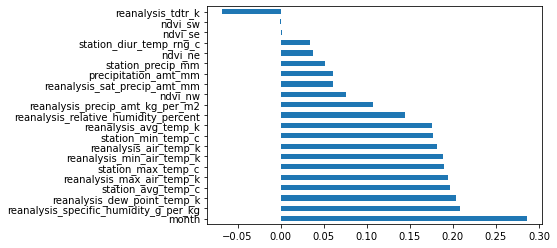

In [ ]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

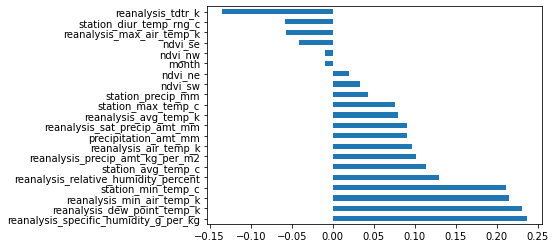

In [ ]:
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [ ]:
train_features['total_cases'] = train_labels.total_cases

In [ ]:
bothcity_correlations = train_features.corr()

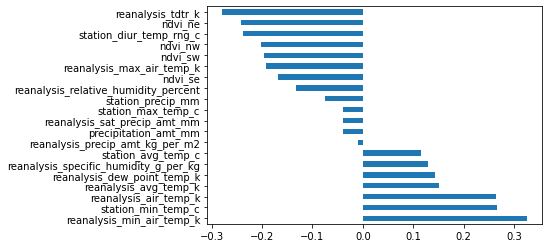

In [ ]:
(bothcity_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

As we can see these variables present the strongest correlations reanalysis_specific_humidity_g_per_kg,
reanalysis_dew_point_temp_k,
station_avg_temp_c,
station_min_temp_c

#**Dengue over time visualization**

In [ ]:
train_features2 = pd.merge(train_labels, train_features, on=['city','year','weekofyear'])

Text(0.5, 0.98, 'Dengue over time')

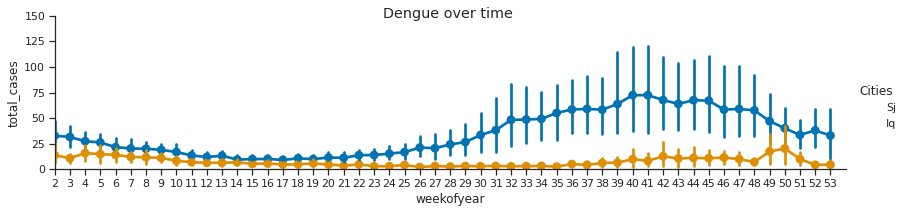

In [ ]:
sns.set(style="ticks", palette="colorblind")

fig = sns.FacetGrid(train_features2, hue='city', aspect=4) 
fig.map(sns.pointplot,'weekofyear','total_cases')

max_x = train_features2.weekofyear.max()
min_x = train_features2.weekofyear.min()

fig.set(xlim=(min_x,max_x))
fig.set(ylim=(0, 150))

fig.add_legend(train_features2, title='Cities', label_order=['Sj', 'Iq'])
fig.fig.suptitle("Dengue over time")

#**IQ Dengue Projections (RF)**

In [ ]:
y = pd.read_csv("dengue_labels_train.csv")

#iq_pred = pd.read_csv("iq_pred_cont_test.csv")

#blank_pred_iq = pd.read_csv("blank_visual_iq.csv")
blank_pred_iq = pd.read_csv("blank_visual_iq2.csv")


Text(0, 0.5, 'Number of Cases')

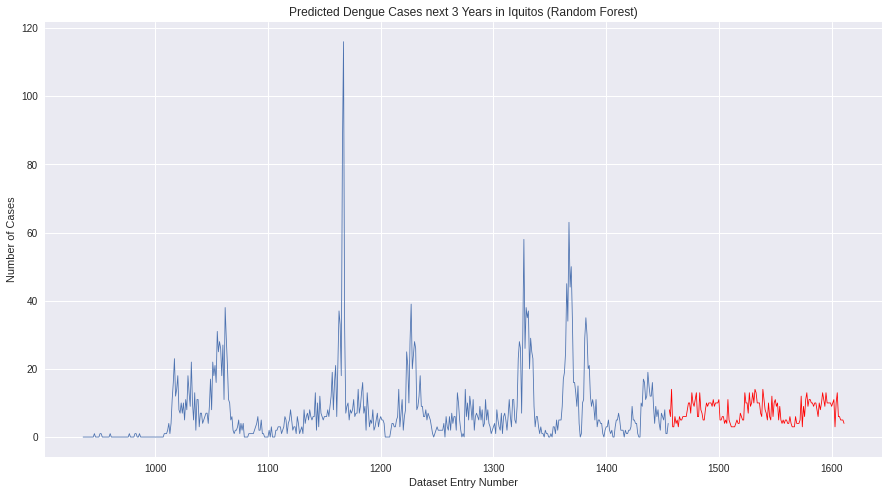

In [ ]:
blank_pred_iq.dropna(inplace=True)
#appended = y.append(iq_pred)

y.set_index('year')

#both_sets = pd.merge(y, blank_pred_iq, on = ['city', 'year', 'weekofyear', 'total_cases'], how = 'outer')
yiq = y.total_cases[y.city == 'iq']
fig, ax = plt.subplots(figsize=(15,8))

blank_pred_iq.set_index('year')

plt.plot(yiq, "C0", lw = 0.8)
plt.plot(blank_pred_iq.total_cases, "r", lw= 0.8)

plt.title("Predicted Dengue Cases next 3 Years in Iquitos (Random Forest)")
plt.xlabel("Dataset Entry Number")
plt.ylabel("Number of Cases")

#unique_years, ind = np.unique(blank_pred_iq['year'].values, return_index=True)
#plt.xticks(blank_pred_iq.index[ind], unique_years)
#yiq.plot.line(lw=0.8)


#**SJ Dengue Projections (RF)**

In [ ]:
y = pd.read_csv("dengue_labels_train.csv")

#iq_pred = pd.read_csv("sj_pred_cont_test.csv")

#blank_pred_sj = pd.read_csv("blank_visual_sj.csv")
blank_pred_sj = pd.read_csv("blank_pred_sj2.csv")

blank_pred_sj_selected = blank_pred_sj.total_cases[blank_pred_sj.city =='sj']

Text(0, 0.5, 'Number of Cases')

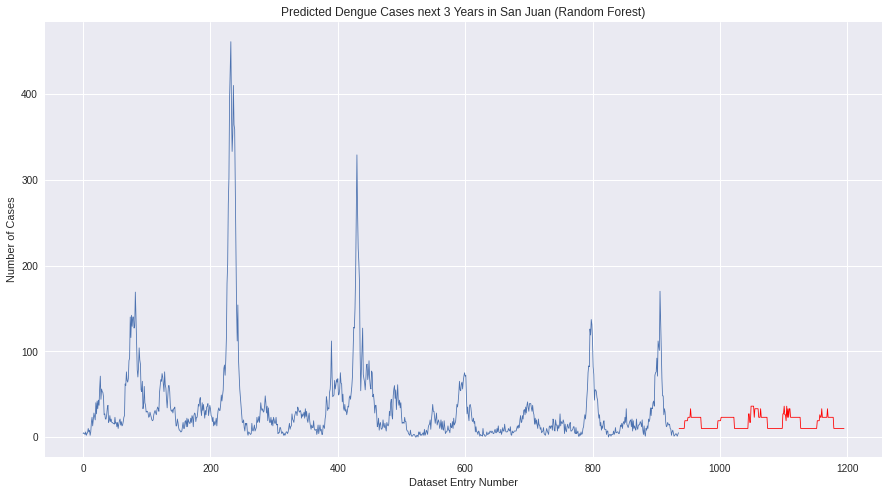

In [ ]:
blank_pred_sj.dropna(inplace=True)
#appended = y.append(iq_pred)

y.set_index('year')

#both_sets = pd.merge(y, blank_pred_iq, on = ['city', 'year', 'weekofyear', 'total_cases'], how = 'outer')
ysj= y.total_cases[y.city == 'sj']
fig, ax = plt.subplots(figsize=(15,8))

blank_pred_sj.set_index('year')

plt.plot(ysj, "C0", lw = 0.8)
plt.plot(blank_pred_sj_selected, "r", lw= 0.8)

plt.title("Predicted Dengue Cases next 3 Years in San Juan (Random Forest)")
plt.xlabel("Dataset Entry Number")
plt.ylabel("Number of Cases")

#unique_years, ind = np.unique(blank_pred_iq['year'].values, return_index=True)
#plt.xticks(blank_pred_iq.index[ind], unique_years)
#yiq.plot.line(lw=0.8)


#**Visualizing Feature Importance between cities**

In [ ]:
xgb_data = pd.read_csv('xgb_fi_btwn_cities3.csv')
#rf_data = pd.read_csv('rf_fi_btwn_cities.csv')

df = pd.DataFrame(xgb_data)
df_sorted = df.sort_values('sj', ascending=True)
iqY = list(df.iloc[:, 1])
sjY = list(df.iloc[:, 2])
varsX = list(df.iloc[:, 0])

In [ ]:
iqY

[1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0]

In [ ]:
sjY

[1, 1, 12, 1, 0, 4, 9, 14, 11, 6, 7, 5, 1, 1, 13, 1, 10, 1, 2, 3, 8, 1]

In [ ]:
varsX

['year',
 'weekofyear',
 'ndvi_nw',
 'ndvi_se',
 'station_diur_temp_c',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_tdtr_k',
 'reanalysis_air_temp_k',
 'reanalysis_specific_humidity_g_per_kg',
 'ndvi_sw',
 'station_avg_temp_c',
 'station_max_temp_c',
 'reanalysis_dew_point_temp_k',
 'ndvi_ne',
 'reanalysis_max_air_temp_k',
 'reanalysis_avg_temp_k',
 'station_min_temp_c',
 'station_precip_mm',
 'reanalysis_relative_humidity_percent',
 'preciptation_amt_mm',
 'month']

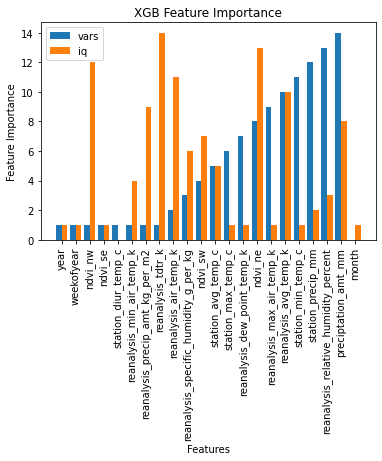

In [ ]:
width=0.4
plt.bar(x-0.2, iqY, width)
plt.bar(x+0.2, sjY, width)
plt.title("XGB Feature Importance")
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.xticks(np.arange(0,22), varsX, rotation=90)
plt.legend(df.columns)

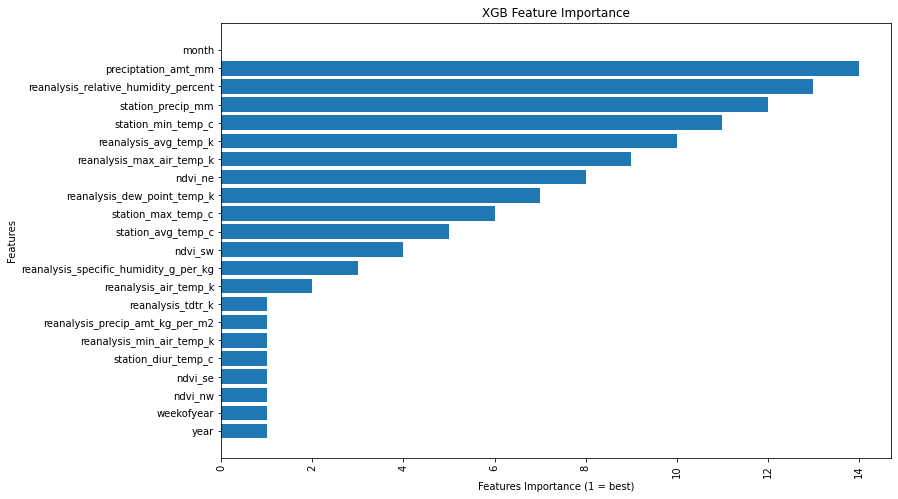

In [ ]:

plt.figure(figsize=(12,8))
plt.barh(X, Y)
#plt.gca().invert_yaxis()
#plt.ylim(reversed(plt.ylim()))


plt.title("XGB Feature Importance")
plt.xlabel('Features Importance (1 = best)')
plt.xticks(rotation=90)
plt.ylabel('Features')

plt.show()



In [ ]:
X

0                                      year
1                                weekofyear
2                                   ndvi_nw
3                                   ndvi_se
4                       station_diur_temp_c
5                 reanalysis_min_air_temp_k
6           reanalysis_precip_amt_kg_per_m2
7                         reanalysis_tdtr_k
8                     reanalysis_air_temp_k
9     reanalysis_specific_humidity_g_per_kg
10                                  ndvi_sw
11                       station_avg_temp_c
12                       station_max_temp_c
13              reanalysis_dew_point_temp_k
14                                  ndvi_ne
15                reanalysis_max_air_temp_k
16                    reanalysis_avg_temp_k
17                       station_min_temp_c
18                        station_precip_mm
19     reanalysis_relative_humidity_percent
20                      preciptation_amt_mm
21                                    month
Name: vars, dtype: object

#**Time Series Analysis of Target**

In [ ]:
train_features = pd.read_csv("dengue_features_train.csv")
train_labels = pd.read_csv("dengue_labels_train.csv")

train_labels.index = pd.DatetimeIndex(train_features.week_start_date)

iq_total_cases = train_labels.total_cases[train_labels.city == 'iq']
sj_total_cases = train_labels.total_cases[train_labels.city == 'sj']

iq_weekly_total_cases = iq_total_cases.resample('W').sum()
iq_monthly_total_cases = iq_total_cases.resample('M').sum()
iq_yearly_total_cases = iq_total_cases.resample("Y").sum()

sj_weekly_total_cases = sj_total_cases.resample('W').sum()
sj_monthly_total_cases = sj_total_cases.resample('M').sum()
sj_yearly_total_cases = sj_total_cases.resample("Y").sum()

Text(0, 0.5, 'Corr Strength')

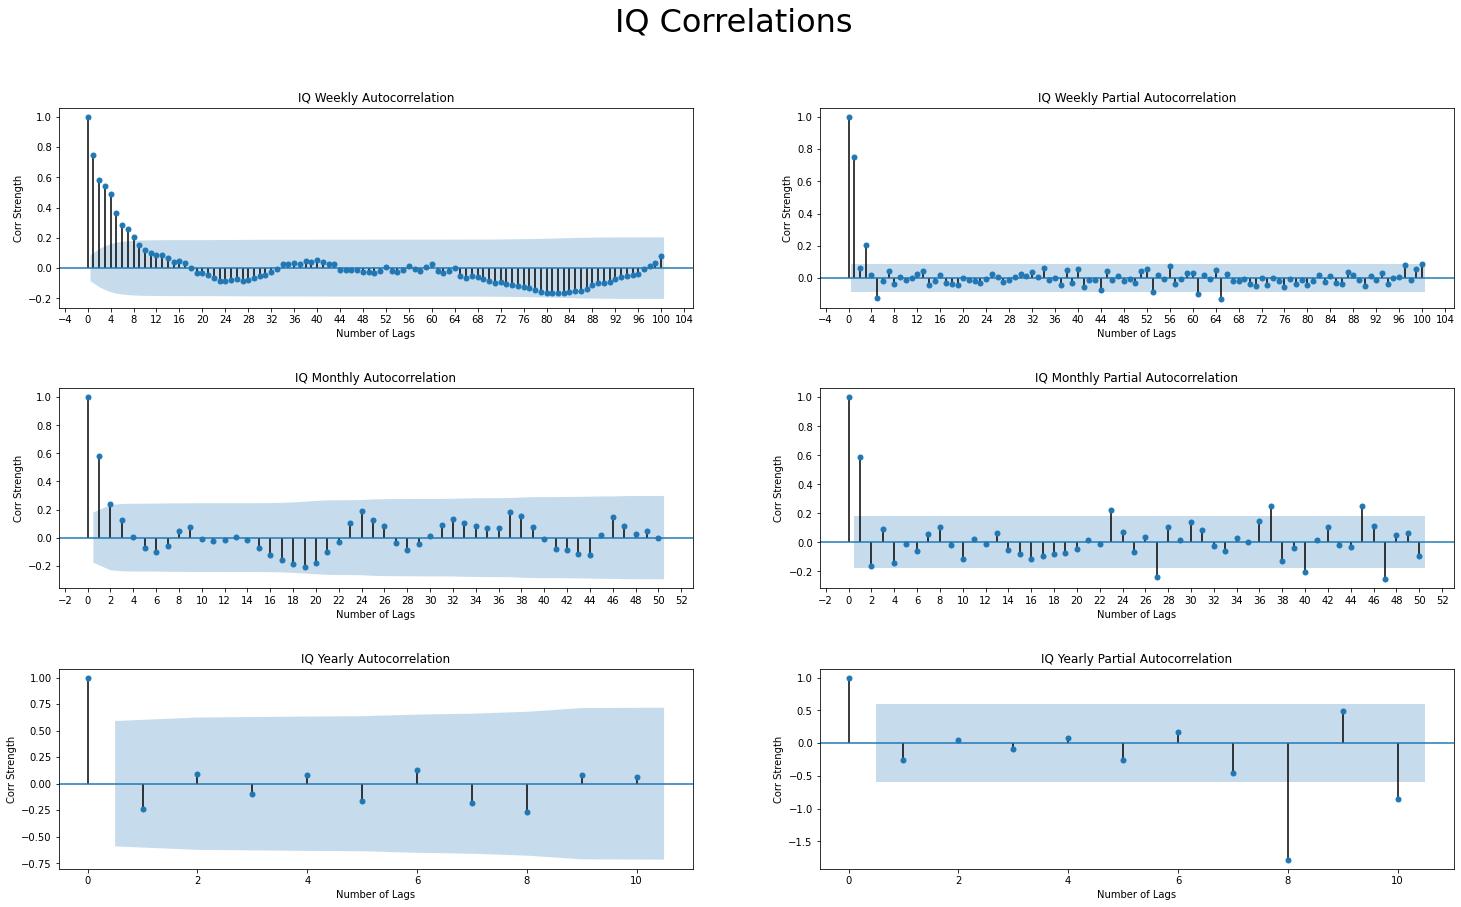

In [ ]:
fig = plt.figure(figsize=(25,14))
fig.suptitle('IQ Correlations', size = 32)
fig.subplots_adjust(hspace=.4)

#WEEKLY
ax3 = fig.add_subplot(321)
ax3.xaxis.set_major_locator(plt.MultipleLocator(4))
fig = sm.graphics.tsa.plot_acf(iq_weekly_total_cases, lags = 100, ax=ax3)
plt.title("IQ Weekly Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")

ax4 = fig.add_subplot(322)
ax4.xaxis.set_major_locator(plt.MultipleLocator(4))
fig = sm.graphics.tsa.plot_pacf(iq_weekly_total_cases, lags = 100, ax=ax4)
plt.title("IQ Weekly Partial Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")


#MONTHLY
ax1 = fig.add_subplot(323)
ax1.xaxis.set_major_locator(plt.MultipleLocator(2))
fig = sm.graphics.tsa.plot_acf(iq_monthly_total_cases, lags = 50, ax=ax1)
plt.title("IQ Monthly Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")

ax2 = fig.add_subplot(324)
ax2.xaxis.set_major_locator(plt.MultipleLocator(2))
fig = sm.graphics.tsa.plot_pacf(iq_monthly_total_cases, lags = 50, ax=ax2)
plt.title("IQ Monthly Partial Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")


#YEARLY
ax5 = fig.add_subplot(325)
fig = sm.graphics.tsa.plot_acf(iq_yearly_total_cases, lags = 10, ax=ax5)
plt.title("IQ Yearly Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")

ax6 = fig.add_subplot(326)
fig = sm.graphics.tsa.plot_pacf(iq_yearly_total_cases, lags = 10, ax=ax6)
plt.title("IQ Yearly Partial Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")

Text(0, 0.5, 'Corr Strength')

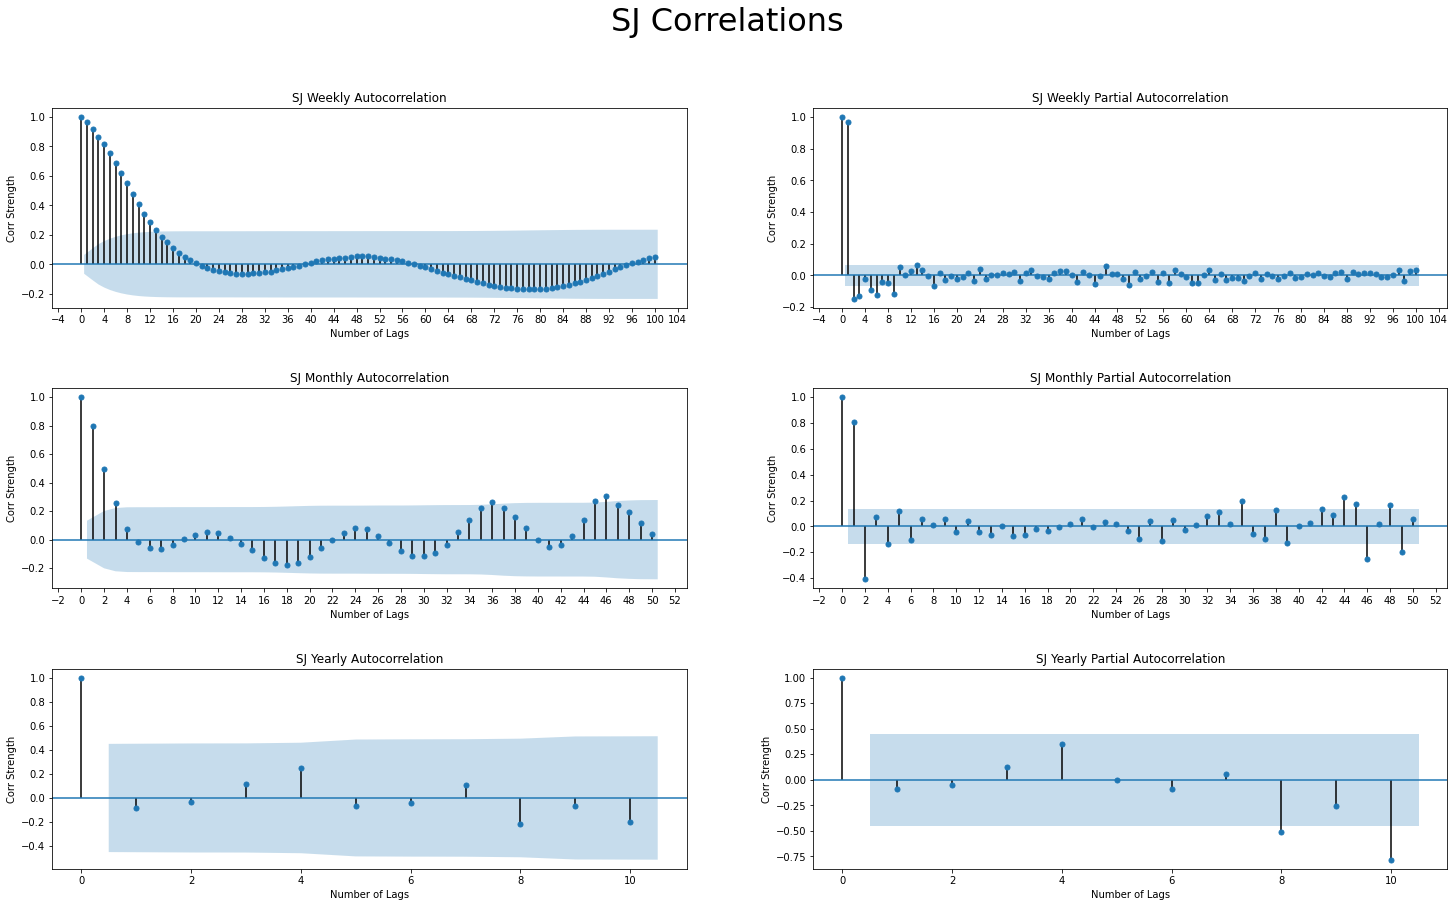

In [ ]:
fig = plt.figure(figsize=(25,14))
fig.suptitle('SJ Correlations', size = 32)
fig.subplots_adjust(hspace=.4)

#WEEKLY
ax3 = fig.add_subplot(321)
ax3.xaxis.set_major_locator(plt.MultipleLocator(4))
fig = sm.graphics.tsa.plot_acf(sj_weekly_total_cases, lags = 100, ax=ax3)
plt.title("SJ Weekly Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")

ax4 = fig.add_subplot(322)
ax4.xaxis.set_major_locator(plt.MultipleLocator(4))
fig = sm.graphics.tsa.plot_pacf(sj_weekly_total_cases, lags = 100, ax=ax4)
plt.title("SJ Weekly Partial Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")

#MONTHLY
ax1 = fig.add_subplot(323)
ax1.xaxis.set_major_locator(plt.MultipleLocator(2))
fig = sm.graphics.tsa.plot_acf(sj_monthly_total_cases, lags = 50, ax=ax1)
plt.title("SJ Monthly Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")

ax2 = fig.add_subplot(324)
ax2.xaxis.set_major_locator(plt.MultipleLocator(2))
fig = sm.graphics.tsa.plot_pacf(sj_monthly_total_cases, lags = 50, ax=ax2)
plt.title("SJ Monthly Partial Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")

#YEARLY
ax5 = fig.add_subplot(325)
fig = sm.graphics.tsa.plot_acf(sj_yearly_total_cases, lags = 10, ax=ax5)
plt.title("SJ Yearly Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")

ax6 = fig.add_subplot(326)
fig = sm.graphics.tsa.plot_pacf(sj_yearly_total_cases, lags = 10, ax=ax6)
plt.title("SJ Yearly Partial Autocorrelation")
plt.xlabel("Number of Lags")
plt.ylabel("Corr Strength")


#**SARIMA Modeling**

SARIMA is defined by 4 parts:

* S - Seasonality
* AR - Autoregressive 
* I - Integrated
* MA - Moving Average



Tuple definition = SARIMA(p,d,q)(P,D,Q)m where:



**Non-seasonal**                           
*   p = order (# of time lags)  
*   d = degree of differencing  
*   q = order of the MA model   


**Seasonal**
* P = Autoregressive                  
* D = Differencing                    
* Q = MA term                         
* m = # of periods in each "season"   





**We will need a SARIMA model for each city, as they have different correlations**

IQ formula seems to be SARIMA(, 0, 3) ( , , )

SJ formula seems to be SARIMA( , , ) ( , , )

# #**START OF ML MODELS, RUN THESE (reimported to avoid mismatching variables from the above graphs)**

Data cleaning is as important as the models themselves. Here we create training and testing data sets for the project by first joining the features and labels on the common columns.

In [ ]:
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
test = pd.read_csv('dengue_features_test.csv')

train_features = train_features.merge(train_labels, on = ['city', 'year', 'weekofyear'], how = 'left')
train_features 

city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
0      sj  1990          18  ...               20.0               16.0            4
1      sj  1990          19  ...               22.2                8.6            5
2      sj  1990          20  ...               22.8               41.4            4
3      sj  1990          21  ...               23.3                4.0            3
4      sj  1990          22  ...               23.9                5.8            6
...   ...   ...         ...  ...                ...                ...          ...
1451   iq  2010          21  ...               22.4               27.0            5
1452   iq  2010          22  ...               21.7               36.6            8
1453   iq  2010          23  ...               19.2                7.4            1
1454   iq  2010          24  ...               21.0               16.0            1
1455   iq  2010          25  ...               22.2               20.4            4

[1456 rows x 25 columns]

#**Adding month feature to both training and testing data for SJ**

In [ ]:
train_features["week_start_date"] = pd.to_datetime(train_features["week_start_date"])
test["week_start_date"] = pd.to_datetime(test["week_start_date"])

train_features['month'] = train_features['week_start_date'].dt.month
test['month'] = test['week_start_date'].dt.month

We need to check for nulls and deal with them accordingly. Imputation will be used.

In [ ]:
train_features.isnull().sum().sort_values(ascending =False)

ndvi_ne                                  194
ndvi_nw                                   52
station_diur_temp_rng_c                   43
station_avg_temp_c                        43
station_precip_mm                         22
ndvi_se                                   22
ndvi_sw                                   22
station_max_temp_c                        20
station_min_temp_c                        14
reanalysis_sat_precip_amt_mm              13
precipitation_amt_mm                      13
reanalysis_dew_point_temp_k               10
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_relative_humidity_percent      10
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
reanalysis_precip_amt_kg_per_m2           10
year                                       0
weekofyear                                 0
month     

#**Training data Imputation**

We will be dropping the week start date because so many values are missing. Then, we will concatenate the labels onto the training data, and perform a forward fill on the NA's.

In [ ]:
joinedSet = pd.concat([train_features, train_labels], axis=1, join='inner')

#imputedSet = joinedSet.fillna(method='ffill')
#imputedSet.drop('week_start_date', axis=1, inplace=True)

joinedSet.drop('week_start_date', axis=1, inplace=True)

joinedSet

city  year  weekofyear   ndvi_ne  ...  city  year  weekofyear  total_cases
0       sj  1990          18  0.122600  ...    sj  1990          18            4
1       sj  1990          19  0.169900  ...    sj  1990          19            5
2       sj  1990          20  0.032250  ...    sj  1990          20            4
3       sj  1990          21  0.128633  ...    sj  1990          21            3
4       sj  1990          22  0.196200  ...    sj  1990          22            6
...    ...   ...         ...       ...  ...   ...   ...         ...          ...
1451    iq  2010          21  0.342750  ...    iq  2010          21            5
1452    iq  2010          22  0.160157  ...    iq  2010          22            8
1453    iq  2010          23  0.247057  ...    iq  2010          23            1
1454    iq  2010          24  0.333914  ...    iq  2010          24            1
1455    iq  2010          25  0.298186  ...    iq  2010          25            4

[1456 rows x 29 columns]

#**Checking that imputation worked**

As we can see, the NA's are now imputed via forward fill.

In [ ]:
#imputedSet.isnull().sum().sort_values(ascending = False)

joinedSet.isnull().sum().sort_values(ascending = False)

ndvi_ne                                  194
ndvi_nw                                   52
station_diur_temp_rng_c                   43
station_avg_temp_c                        43
station_precip_mm                         22
ndvi_sw                                   22
ndvi_se                                   22
station_max_temp_c                        20
station_min_temp_c                        14
precipitation_amt_mm                      13
reanalysis_sat_precip_amt_mm              13
reanalysis_min_air_temp_k                 10
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_relative_humidity_percent      10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
weekofyear                                 0
year                                       0
total_case

#**Kelvin to Celsius conversion (for feature consistency)**

We create an index of features we wish to convert from K to C, and then iteratively perform the conversion. (Note, this cell must be run only once per notebook walkthrough. Rerunning this cell will continually decrement the temperature.)

In [ ]:
K2Cfeatures = ["reanalysis_max_air_temp_k", "reanalysis_avg_temp_k", "reanalysis_air_temp_k", 
       "reanalysis_min_air_temp_k", "reanalysis_dew_point_temp_k"]      

for i in K2Cfeatures:
  #imputedSet[i] -= 273.15
  joinedSet[i] -= 273.15

#imputedSet
joinedSet

city  year  weekofyear   ndvi_ne  ...  city  year  weekofyear  total_cases
0       sj  1990          18  0.122600  ...    sj  1990          18            4
1       sj  1990          19  0.169900  ...    sj  1990          19            5
2       sj  1990          20  0.032250  ...    sj  1990          20            4
3       sj  1990          21  0.128633  ...    sj  1990          21            3
4       sj  1990          22  0.196200  ...    sj  1990          22            6
...    ...   ...         ...       ...  ...   ...   ...         ...          ...
1451    iq  2010          21  0.342750  ...    iq  2010          21            5
1452    iq  2010          22  0.160157  ...    iq  2010          22            8
1453    iq  2010          23  0.247057  ...    iq  2010          23            1
1454    iq  2010          24  0.333914  ...    iq  2010          24            1
1455    iq  2010          25  0.298186  ...    iq  2010          25            4

[1456 rows x 29 columns]

#**Correlation Heatmap**

We can get a good idea of correlations present within the features by using a heatmap matrix, as well as a histogram matrix. (FONT IS A WORK IN PROGRESS)

In [ ]:
np.tril(np.ones(joinedSet.shape)).astype(np.bool)[1:25,1:25]

array([[ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [ True,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [ True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False],
       [ True,  True,  True,  True,

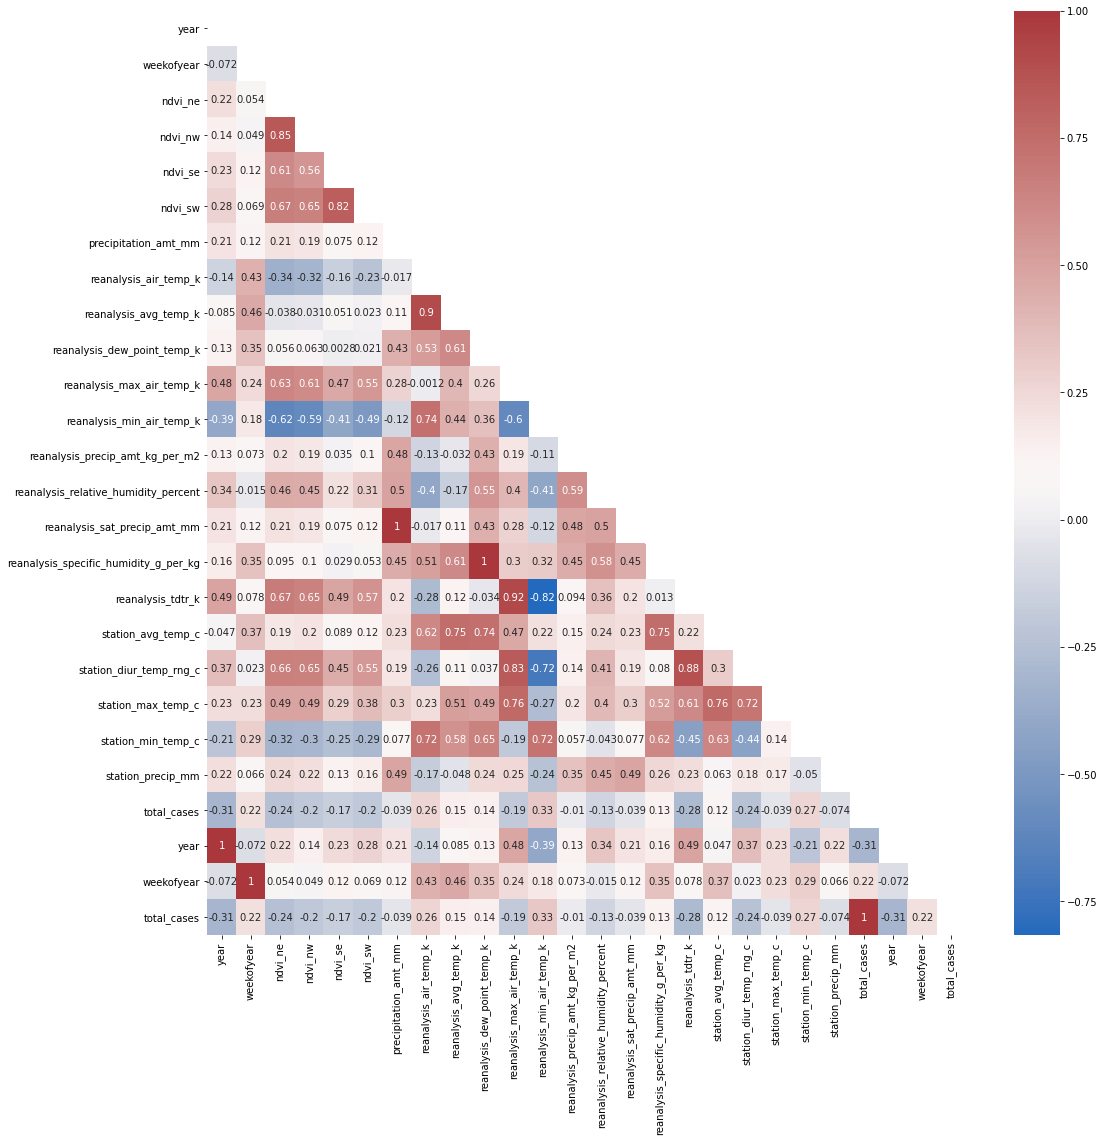

In [ ]:
mask_ut = np.triu(np.ones_like(joinedSet.corr()))

plt.figure(figsize=(17, 17))
dataplot = sns.heatmap(joinedSet.corr(), cmap="vlag", annot=True, mask=mask_ut)

#**Splitting Iquitos and San Juan**

Since we have joined multiple datasets, we need to get rid of duplicates so we can further separate based on city.

In [ ]:
#imputedSet = imputedSet.T.drop_duplicates().T

imputedSet = joinedSet.T.drop_duplicates().T

sj_train = imputedSet[imputedSet.city == "sj"]
iq_train = imputedSet[imputedSet.city == "iq"]

#iq_train['total_cases'].fillna((iq_train['total_cases'].mean()), inplace=True)
#sj_train['total_cases'].fillna((sj_train['total_cases'].mean()), inplace=True)
#impute total cases by mean too? NEEDS WORK

We can drop the city column since we are splitting the data into disjoint sets based on the city label present.

In [ ]:
test_city = test['city']
test_year = test['year']
test_weekofyear = test['weekofyear']

In [ ]:
sj_train.pop('city')
iq_train.pop('city')

936     iq
937     iq
938     iq
939     iq
940     iq
        ..
1451    iq
1452    iq
1453    iq
1454    iq
1455    iq
Name: city, Length: 520, dtype: object

In [ ]:
iq_train

year weekofyear   ndvi_ne  ... station_precip_mm total_cases month
936   2000         26  0.192886  ...                 3           0     7
937   2000         27  0.216833  ...              55.6           0     7
938   2000         28  0.176757  ...              38.1           0     7
939   2000         29  0.227729  ...                30           0     7
940   2000         30  0.328643  ...                 4           0     7
...    ...        ...       ...  ...               ...         ...   ...
1451  2010         21   0.34275  ...                27           5     5
1452  2010         22  0.160157  ...              36.6           8     6
1453  2010         23  0.247057  ...               7.4           1     6
1454  2010         24  0.333914  ...                16           1     6
1455  2010         25  0.298186  ...              20.4           4     6

[520 rows x 23 columns]

#**Dropping month for Iquitos**

In [ ]:
iq_train.pop('month')

936     7
937     7
938     7
939     7
940     7
       ..
1451    5
1452    6
1453    6
1454    6
1455    6
Name: month, Length: 520, dtype: object

In [ ]:
iq_train

year weekofyear  ... station_precip_mm total_cases
936   2000         26  ...                 3           0
937   2000         27  ...              55.6           0
938   2000         28  ...              38.1           0
939   2000         29  ...                30           0
940   2000         30  ...                 4           0
...    ...        ...  ...               ...         ...
1451  2010         21  ...                27           5
1452  2010         22  ...              36.6           8
1453  2010         23  ...               7.4           1
1454  2010         24  ...                16           1
1455  2010         25  ...              20.4           4

[520 rows x 22 columns]

#**IQ & SJ Feature Distributions (Features used in current models)**

Text(0.5, 0, 'station_min_temp_c')

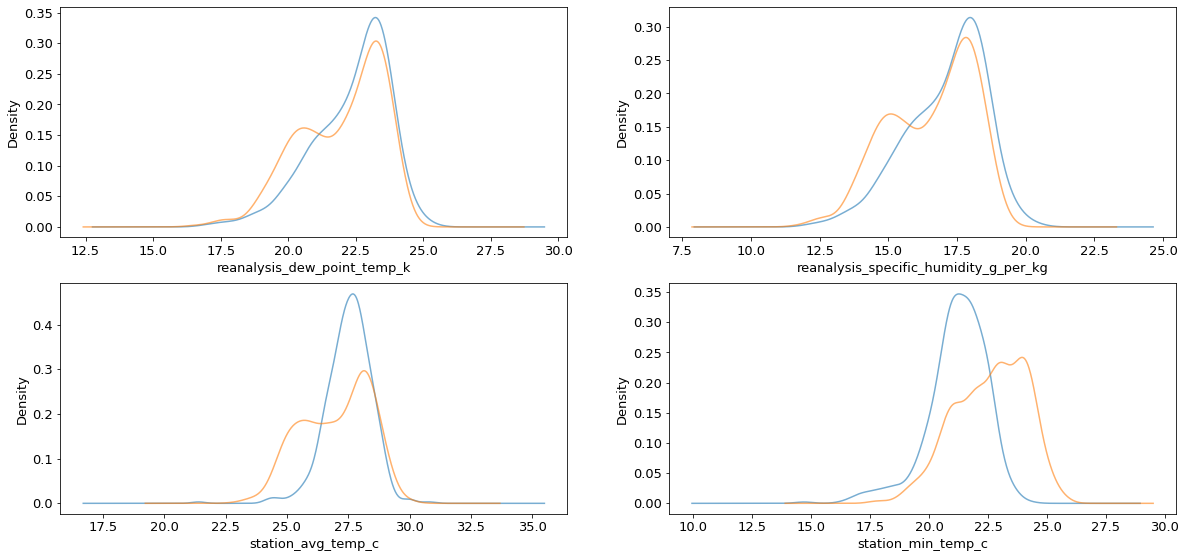

In [ ]:
plt.rc("font", size=13)
plt.figure(figsize=(20,50))
alpha=0.6

ax1 = plt.subplot2grid((10,2),(3,0))
iq_train.reanalysis_dew_point_temp_k.plot(kind="kde",alpha=alpha)
sj_train.reanalysis_dew_point_temp_k.plot(kind="kde",alpha=alpha)
ax1.set_xlabel("reanalysis_dew_point_temp_k")

ax2 = plt.subplot2grid((10,2),(3,1))
iq_train.reanalysis_specific_humidity_g_per_kg.plot(kind="kde",alpha=alpha)
sj_train.reanalysis_specific_humidity_g_per_kg.plot(kind="kde",alpha=alpha)
ax2.set_xlabel("reanalysis_specific_humidity_g_per_kg")

ax3 = plt.subplot2grid((10,2),(4,0))
iq_train.station_avg_temp_c.plot(kind="kde",alpha=alpha)
sj_train.station_avg_temp_c.plot(kind="kde",alpha=alpha)
ax3.set_xlabel("station_avg_temp_c")

ax4 = plt.subplot2grid((10,2),(4,1))
iq_train.station_min_temp_c.plot(kind="kde",alpha=alpha)
sj_train.station_min_temp_c.plot(kind="kde",alpha=alpha)
ax4.set_xlabel("station_min_temp_c")


#extra features
ax1 = plt.subplot2grid((10,2), (0,0))
data.ndvi_ne.plot(kind="kde",alpha=alpha)
ax1.set_xlabel("ndvi_ne")

ax2 = plt.subplot2grid((10,2),(0,1))
data.ndvi_nw.plot(kind="kde",alpha=alpha)
ax2.set_xlabel("ndvi_nw")

ax3 = plt.subplot2grid((10,2),(1,0))
data.ndvi_se.plot(kind="kde",alpha=alpha)
ax3.set_xlabel("ndvi_se")

ax4 = plt.subplot2grid((10,2),(1,1))
data.ndvi_sw.plot(kind="kde",alpha=alpha)
ax4.set_xlabel("ndvi_sw")

ax5 = plt.subplot2grid((10,2),(2,0))
data.precipitation_amt_mm.plot(kind="kde",alpha=alpha)
ax5.set_xlabel("precipitation_amt_mm")

ax6 = plt.subplot2grid((10,2),(2,1))
data.reanalysis_air_temp_k.plot(kind="kde",alpha=alpha)
ax6.set_xlabel("reanalysis_air_temp_k")

ax7 = plt.subplot2grid((10,2),(3,0))
data.reanalysis_avg_temp_k.plot(kind="kde",alpha=alpha)
ax7.set_xlabel("reanalysis_avg_temp_k")

ax8 = plt.subplot2grid((10,2),(3,1))
data.reanalysis_dew_point_temp_k.plot(kind="kde",alpha=alpha)
ax8.set_xlabel("reanalysis_dew_point_temp_k")

ax9 = plt.subplot2grid((10,2),(4,0))
data.reanalysis_max_air_temp_k.plot(kind="kde",alpha=alpha)
ax9.set_xlabel("reanalysis_max_air_temp_k")

ax10 = plt.subplot2grid((10,2),(4,1))
data.reanalysis_min_air_temp_k.plot(kind="kde",alpha=alpha)
ax10.set_xlabel("reanalysis_min_air_temp_k")

ax11 = plt.subplot2grid((10,2),(5,0))
data.reanalysis_precip_amt_kg_per_m2.plot(kind="kde",alpha=alpha)
ax11.set_xlabel("reanalysis_precip_amt_kg_per_m2")

ax12 = plt.subplot2grid((10,2),(5,1))
data.reanalysis_relative_humidity_percent.plot(kind="kde",alpha=alpha)
ax12.set_xlabel("reanalysis_relative_humidity_percent")

ax13 = plt.subplot2grid((10,2),(6,0))
data.reanalysis_sat_precip_amt_mm.plot(kind="kde",alpha=alpha)
ax13.set_xlabel("reanalysis_sat_precip_amt_mm")

ax14 = plt.subplot2grid((10,2),(6,1))
data.reanalysis_specific_humidity_g_per_kg.plot(kind="kde",alpha=alpha)
ax14.set_xlabel("reanalysis_specific_humidity_g_per_kg")

ax15 = plt.subplot2grid((10,2),(7,0))
data.reanalysis_tdtr_k.plot(kind="kde",alpha=alpha)
ax15.set_xlabel("reanalysis_tdtr_k")

ax16 = plt.subplot2grid((10,2),(7,1))
data.station_avg_temp_c.plot(kind="kde",alpha=alpha)
ax16.set_xlabel("station_avg_temp_c")

ax17 = plt.subplot2grid((10,2),(8,0))
data.station_diur_temp_rng_c.plot(kind="kde",alpha=alpha)
ax17.set_xlabel("station_diur_temp_rng_c")

ax18 = plt.subplot2grid((10,2),(8,1))
data.station_max_temp_c.plot(kind="kde",alpha=alpha)
ax18.set_xlabel("station_max_temp_c")

ax19 = plt.subplot2grid((10,2),(9,0))
data.station_min_temp_c.plot(kind="kde",alpha=alpha)
ax19.set_xlabel("station_min_temp_c")

ax20 = plt.subplot2grid((10,2),(9,1))
data.station_precip_mm.plot(kind="kde",alpha=alpha)
ax20.set_xlabel("station_precip_mm")

#**IQ QQ Plots of above Features**

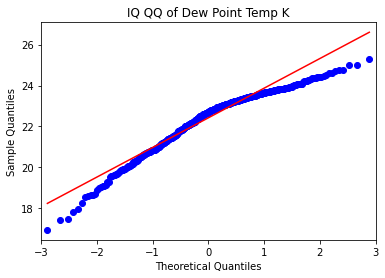

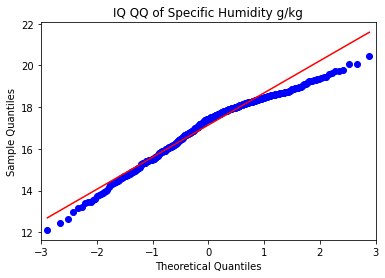

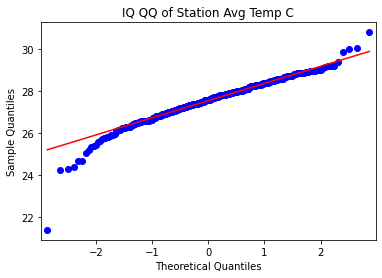

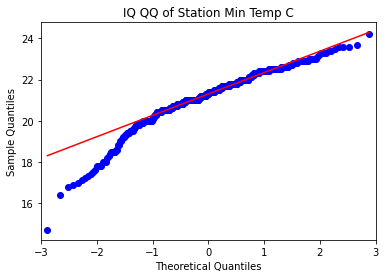

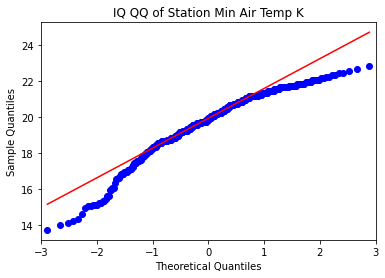

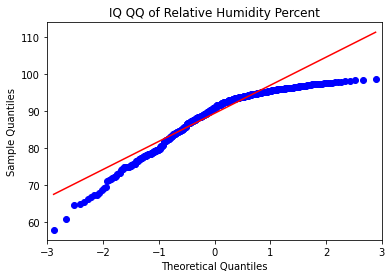

In [ ]:
testdf = iq_train['reanalysis_dew_point_temp_k']
testdf2 = iq_train['reanalysis_specific_humidity_g_per_kg']
testdf3 = iq_train['station_avg_temp_c']
testdf4 = iq_train['station_min_temp_c']
testdf5 = iq_train['reanalysis_min_air_temp_k']
testdf6 = iq_train['reanalysis_relative_humidity_percent']

testdf.dropna(inplace = True)
testdf2.dropna(inplace = True)
testdf3.dropna(inplace = True)
testdf4.dropna(inplace = True)
testdf5.dropna(inplace = True)
testdf6.dropna(inplace = True)

testdf.isna().sum()

testdfFloat = testdf.astype(float)
testdfFloat2 = testdf2.astype(float)
testdfFloat3 = testdf3.astype(float)
testdfFloat4 = testdf4.astype(float)
testdfFloat5 = testdf5.astype(float)
testdfFloat6 = testdf6.astype(float)

#ax1 = plt.subplot2grid((2,2),(0,0))
sm.qqplot(testdfFloat, line ='q')
plt.title("IQ QQ of Dew Point Temp K")

sm.qqplot(testdfFloat2, line ='q')
plt.title("IQ QQ of Specific Humidity g/kg")

sm.qqplot(testdfFloat3, line ='q')
plt.title("IQ QQ of Station Avg Temp C")

sm.qqplot(testdfFloat4, line ='q')
plt.title("IQ QQ of Station Min Temp C")

sm.qqplot(testdfFloat5, line ='q')
plt.title("IQ QQ of Station Min Air Temp K")

sm.qqplot(testdfFloat6, line ='q')
plt.title("IQ QQ of Relative Humidity Percent")

plt.show()

#**SJ QQ Plots of above Features**

<Figure size 720x360 with 0 Axes>

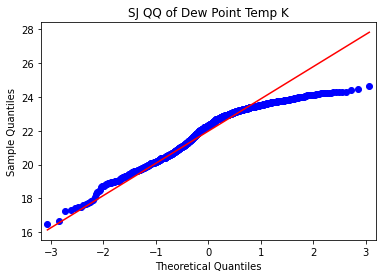

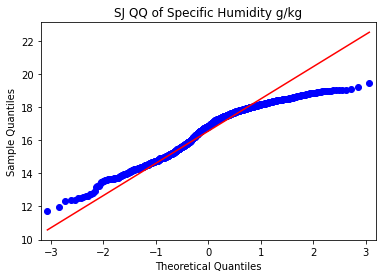

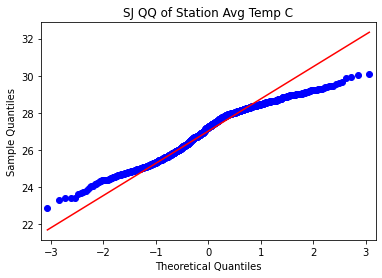

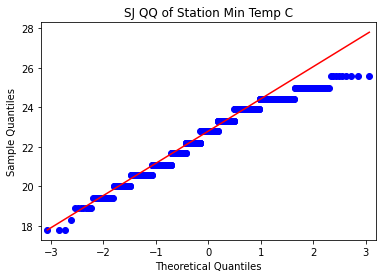

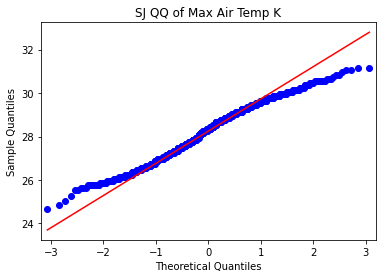

In [ ]:
testdf5 = sj_train['reanalysis_dew_point_temp_k']
testdf6 = sj_train['reanalysis_specific_humidity_g_per_kg']
testdf7 = sj_train['station_avg_temp_c']
testdf8 = sj_train['station_min_temp_c']
testdf9 = sj_train['reanalysis_max_air_temp_k']

testdf5.dropna(inplace = True)
testdf6.dropna(inplace = True)
testdf7.dropna(inplace = True)
testdf8.dropna(inplace = True)
testdf9.dropna(inplace = True)

testdf5.isna().sum()

testdfFloat5 = testdf5.astype(float)
testdfFloat6 = testdf6.astype(float)
testdfFloat7 = testdf7.astype(float)
testdfFloat8 = testdf8.astype(float)
testdfFloat9 = testdf9.astype(float)

plt.figure(figsize=(10,5))

sm.qqplot(testdfFloat5, line ='q')
plt.title("SJ QQ of Dew Point Temp K")

sm.qqplot(testdfFloat6, line ='q')
plt.title("SJ QQ of Specific Humidity g/kg")

sm.qqplot(testdfFloat7, line ='q')
plt.title("SJ QQ of Station Avg Temp C")

sm.qqplot(testdfFloat8, line ='q')
plt.title("SJ QQ of Station Min Temp C")

sm.qqplot(testdfFloat9, line ='q')
plt.title("SJ QQ of Max Air Temp K")

plt.show()

#**Selecting the correct imputation method based on distribution, and then imputing**

In [ ]:
iq_train['reanalysis_dew_point_temp_k'].fillna(iq_train['reanalysis_dew_point_temp_k'].mean(),inplace = True)
iq_train['reanalysis_specific_humidity_g_per_kg'].fillna(iq_train['reanalysis_specific_humidity_g_per_kg'].mean(),inplace = True)
iq_train['station_avg_temp_c'].fillna(iq_train['station_avg_temp_c'].mean(),inplace = True)
iq_train['station_min_temp_c'].fillna(iq_train['station_min_temp_c'].mean(),inplace = True)
iq_train['reanalysis_min_air_temp_k'].fillna(iq_train['reanalysis_min_air_temp_k'].mean(),inplace = True)
iq_train['reanalysis_relative_humidity_percent'].fillna(iq_train['reanalysis_relative_humidity_percent'].mean(),inplace = True)

sj_train['reanalysis_dew_point_temp_k'].fillna(sj_train['reanalysis_dew_point_temp_k'].mean(),inplace = True)
sj_train['reanalysis_specific_humidity_g_per_kg'].fillna(sj_train['reanalysis_specific_humidity_g_per_kg'].mean(),inplace = True)
sj_train['station_avg_temp_c'].fillna(sj_train['station_avg_temp_c'].mean(),inplace = True)
sj_train['station_min_temp_c'].fillna(sj_train['station_min_temp_c'].mean(),inplace = True)
sj_train['reanalysis_max_air_temp_k'].fillna(sj_train['reanalysis_max_air_temp_k'].mean(),inplace = True)

In [ ]:
#iq_train_mean_filled = [['reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'station_min_temp_c', 'reanalysis_min_air_temp_k', 'reanalysis_relative_humidity_percent']]
#sj_train_mean_filled = [['reanalysis_dew_point_temp_k', 'reanalysis_specific_humidity_g_per_kg', 'station_avg_temp_c', 'station_min_temp_c', 'reanalysis_max_air_temp_k']]

#**Acccounting for virus incubation**

#**Delay by 1 Week (Run both cells)**

Must fill in NA's / NaN's otherwise you can't convert to int

We convert to int to match the given data, otherwise its a double

In [ ]:
iq_train = iq_train.assign(Delay_1_Week = iq_train['total_cases'].shift(-1))
iq_train.fillna(method='ffill', inplace=True)

iq_train['Delay_1_Week'] = iq_train['Delay_1_Week'].astype(int)

In [ ]:
sj_train = sj_train.assign(Delay_1_Week = sj_train['total_cases'].shift(-1))
sj_train.fillna(method='ffill', inplace=True)

sj_train['Delay_1_Week'] = sj_train['Delay_1_Week'].astype(int)

#**Delay by 2 Weeks (Run both cells)**

In [ ]:
iq_train = iq_train.assign(Delay_2_Week = iq_train['total_cases'].shift(-2))
#iq_train.fillna(method='ffill', inplace=True)

iq_train['Delay_2_Week'] = iq_train['Delay_2_Week'].astype(int)

In [ ]:
sj_train = sj_train.assign(Delay_2_Week = sj_train['total_cases'].shift(-2))
#sj_train.fillna(method='ffill', inplace=True)

sj_train['Delay_2_Week'] = sj_train['Delay_2_Week'].astype(int)

#**Looking at all training structure**

Here we get an idea of the structure of our data before performing the appropriate label drops. Drop all columns that are labels (total_cases, year, weekofyear), which will correspond to a reduction of 3 columns.

In [ ]:
iq_X_not_dropped = iq_train.iloc[:,:]

In [ ]:
iq_X_not_dropped

year  weekofyear   ndvi_ne  ...  station_precip_mm  total_cases  Delay_1_Week
936   2000          26  0.192886  ...                3.0            0             0
937   2000          27  0.216833  ...               55.6            0             0
938   2000          28  0.176757  ...               38.1            0             0
939   2000          29  0.227729  ...               30.0            0             0
940   2000          30  0.328643  ...                4.0            0             0
...    ...         ...       ...  ...                ...          ...           ...
1451  2010          21  0.342750  ...               27.0            5             8
1452  2010          22  0.160157  ...               36.6            8             1
1453  2010          23  0.247057  ...                7.4            1             1
1454  2010          24  0.333914  ...               16.0            1             4
1455  2010          25  0.298186  ...               20.4            4             4

[520 rows x 23 columns]

In [ ]:
sj_X_not_dropped = sj_train.iloc[:,:]

In [ ]:
sj_X_not_dropped

ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
0    0.122600  0.103725  ...                20.0               16.0
1    0.169900  0.142175  ...                22.2                8.6
2    0.032250  0.172967  ...                22.8               41.4
3    0.128633  0.245067  ...                23.3                4.0
4    0.196200  0.262200  ...                23.9                5.8
..        ...       ...  ...                 ...                ...
931  0.077850 -0.039900  ...                21.1                1.8
932 -0.038000 -0.016833  ...                22.2                0.5
933 -0.155200 -0.052750  ...                21.7               30.7
934  0.001800 -0.052750  ...                21.7               11.2
935 -0.037000 -0.010367  ...                23.3                0.3

[936 rows x 19 columns]

#**PCA Prep for both cities**

In [ ]:
iq_X_for_PCA = iq_train.iloc[:,2:-2]

In [ ]:
iq_X_for_PCA

ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
936   0.192886  0.132257  ...                20.7                3.0
937   0.216833  0.276100  ...                20.8               55.6
938   0.176757  0.173129  ...                20.7               38.1
939   0.227729  0.145429  ...                14.7               30.0
940   0.328643  0.322129  ...                19.1                4.0
...        ...       ...  ...                 ...                ...
1451  0.342750  0.318900  ...                22.4               27.0
1452  0.160157  0.160371  ...                21.7               36.6
1453  0.247057  0.146057  ...                19.2                7.4
1454  0.333914  0.245771  ...                21.0               16.0
1455  0.298186  0.232971  ...                22.2               20.4

[520 rows x 19 columns]

In [ ]:
sj_X_for_PCA = sj_train.iloc[:,2:-3]

In [ ]:
sj_X_for_PCA

ndvi_ne   ndvi_nw  ...  station_min_temp_c  station_precip_mm
0    0.122600  0.103725  ...                20.0               16.0
1    0.169900  0.142175  ...                22.2                8.6
2    0.032250  0.172967  ...                22.8               41.4
3    0.128633  0.245067  ...                23.3                4.0
4    0.196200  0.262200  ...                23.9                5.8
..        ...       ...  ...                 ...                ...
931  0.077850 -0.039900  ...                21.1                1.8
932 -0.038000 -0.016833  ...                22.2                0.5
933 -0.155200 -0.052750  ...                21.7               30.7
934  0.001800 -0.052750  ...                21.7               11.2
935 -0.037000 -0.010367  ...                23.3                0.3

[936 rows x 19 columns]

#**IQ PCA**

In [ ]:
iq_X_for_PCA_Scaled = StandardScaler().fit_transform(iq_X_for_PCA)

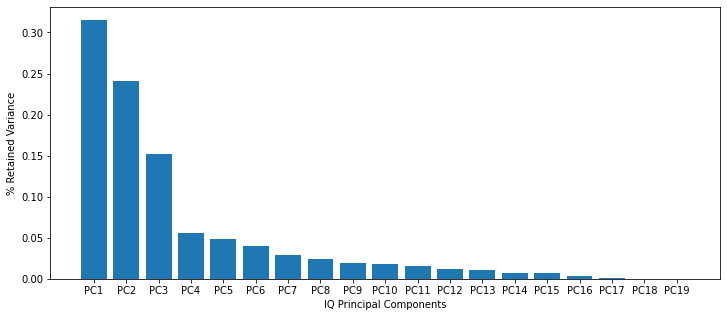

[3.15239142e-01 2.40354401e-01 1.51948989e-01 5.60253742e-02
 4.84259190e-02 3.95042990e-02 2.94976316e-02 2.40702970e-02
 1.87020891e-02 1.74345411e-02 1.59758532e-02 1.16212452e-02
 1.12073837e-02 7.62925344e-03 7.40649361e-03 3.73160125e-03
 9.29630678e-04 2.15105238e-04 8.07502293e-05]


In [ ]:
pca = PCA(19)

pca.fit(iq_X_for_PCA_Scaled)

PC = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19']

plt.figure(figsize=(12,5))
plt.bar(PC, pca.explained_variance_ratio_)
plt.xlabel('IQ Principal Components')
plt.ylabel('% Retained Variance')
plt.show()
print(pca.explained_variance_ratio_)

#print(pd.iq)

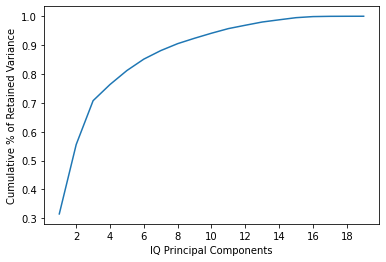

In [ ]:
n_comp = np.arange(19)
n_comp = n_comp+1
cumulative = np.cumsum(pca.explained_variance_ratio_)

ax = figure().gca()
ax.plot(n_comp,cumulative)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('IQ Principal Components')
plt.ylabel('Cumulative % of Retained Variance')
show()

#**SJ PCA**

In [ ]:
sj_X_for_PCA_Scaled = StandardScaler().fit_transform(sj_X_for_PCA)

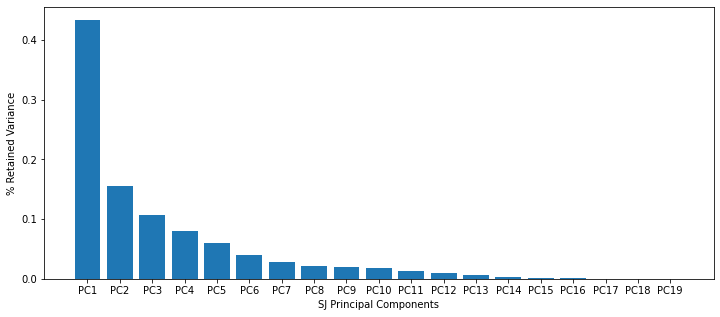

[4.33915906e-01 1.55029526e-01 1.06416460e-01 7.96824557e-02
 5.94889725e-02 3.93071737e-02 2.83604791e-02 2.15257806e-02
 2.05559342e-02 1.88467278e-02 1.38666687e-02 9.45108985e-03
 6.12092778e-03 3.24178194e-03 2.12759973e-03 1.52767840e-03
 3.87019951e-04 8.94565176e-05 5.83615919e-05]


In [ ]:
pca = PCA(19)

pca.fit(sj_X_for_PCA_Scaled)

PC = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19']

plt.figure(figsize=(12,5))
plt.bar(PC, pca.explained_variance_ratio_)
plt.xlabel('SJ Principal Components')
plt.ylabel('% Retained Variance')
plt.show()
print(pca.explained_variance_ratio_)

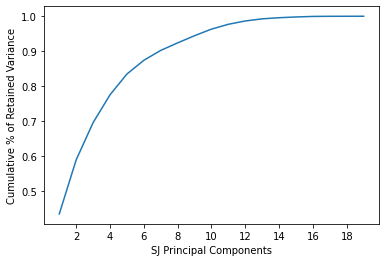

In [ ]:
n_comp = np.arange(19)
n_comp = n_comp+1
cumulative = np.cumsum(pca.explained_variance_ratio_)

ax = figure().gca()
ax.plot(n_comp,cumulative)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('SJ Principal Components')
plt.ylabel('Cumulative % of Retained Variance')
show()

#**Including ONLY correlated variables for each city, and selecting the target column**

In [ ]:
#X SELECTION CODE
#previously used  iq_X = iq_train[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'station_min_temp_c', 'month']]
#(prev + min air temp - month) iq_X = iq_train[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k', 'station_min_temp_c', 'station_avg_temp_c']]

iq_X = iq_train[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_relative_humidity_percent', 'station_avg_temp_c']]

#Y SELECTION CODE
#The y selection code works for either full variables or 
#selecting the most relevant 
#(Added month as a variable, so the index shifted forward one)

# [:, 21:22] for normal  no lag
# [:, 22:23] for 1 Week Delay OR 2 Week Delay, if you only load one for a model
# [:, 23:24] for 2 Week Delay if you load both 1 & 2

#old works with month iq_y = iq_train.iloc[:, 23:24]

iq_y = iq_train.iloc[:, 21:22]

In [ ]:
iq_X

reanalysis_specific_humidity_g_per_kg  ...  station_avg_temp_c
936                               16.651429  ...           26.400000
937                               16.862857  ...           26.900000
938                               17.120000  ...           26.800000
939                               14.431429  ...           25.766667
940                               15.444286  ...           26.600000
...                                     ...  ...                 ...
1451                              18.485714  ...           28.633333
1452                              18.070000  ...           27.433333
1453                              17.008571  ...           24.400000
1454                              16.815714  ...           25.433333
1455                              17.355714  ...           27.475000

[520 rows x 6 columns]

In [ ]:
iq_y

total_cases
936            0
937            0
938            0
939            0
940            0
...          ...
1451           5
1452           8
1453           1
1454           1
1455           4

[520 rows x 1 columns]

#**(DEPRECATED????) Current working method of including all variables**

In [ ]:
iq_X = iq_train.iloc[:, :-2]

In [ ]:
iq_X

year  weekofyear  ...  station_min_temp_c  station_precip_mm
936   2000          26  ...                20.7                3.0
937   2000          27  ...                20.8               55.6
938   2000          28  ...                20.7               38.1
939   2000          29  ...                14.7               30.0
940   2000          30  ...                19.1                4.0
...    ...         ...  ...                 ...                ...
1451  2010          21  ...                22.4               27.0
1452  2010          22  ...                21.7               36.6
1453  2010          23  ...                19.2                7.4
1454  2010          24  ...                21.0               16.0
1455  2010          25  ...                22.2               20.4

[520 rows x 21 columns]

**Now we do the same steps for San Juan.**

#**Including only the relevant variables for SJ, and selecting the target column**

In [ ]:
sj_X = sj_train[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'reanalysis_max_air_temp_k', 'station_min_temp_c', 'month']]

# [:, 21:22] for normal  no lag
# [:, 22:23] for 1 Week Delay OR 2 Week Delay, if you only load one for a model
# [:, 23:24] for 2 Week Delay if you load both 1 & 2

sj_y = sj_train.iloc[:, 21:22]

In [ ]:
sj_X

reanalysis_specific_humidity_g_per_kg  ...  month
0                                14.012857  ...      4
1                                15.372857  ...      5
2                                16.848571  ...      5
3                                16.672857  ...      5
4                                17.210000  ...      5
..                                     ...  ...    ...
931                              13.644286  ...      3
932                              14.662857  ...      4
933                              14.184286  ...      4
934                              13.858571  ...      4
935                              15.671429  ...      4

[936 rows x 6 columns]

In [ ]:
sj_y

total_cases
0             4
1             5
2             4
3             3
4             6
..          ...
931           4
932           3
933           1
934           3
935           5

[936 rows x 1 columns]

#**(DEPRECATED????) Current working method of selecting all variables**

In [ ]:
sj_X = sj_train.iloc[:, :-1]

In [ ]:
sj_X

year  weekofyear   ndvi_ne  ...  station_precip_mm  total_cases  month
0    1990          18  0.122600  ...               16.0            4      4
1    1990          19  0.169900  ...                8.6            5      5
2    1990          20  0.032250  ...               41.4            4      5
3    1990          21  0.128633  ...                4.0            3      5
4    1990          22  0.196200  ...                5.8            6      5
..    ...         ...       ...  ...                ...          ...    ...
931  2008          13  0.077850  ...                1.8            4      3
932  2008          14 -0.038000  ...                0.5            3      4
933  2008          15 -0.155200  ...               30.7            1      4
934  2008          16  0.001800  ...               11.2            3      4
935  2008          17 -0.037000  ...                0.3            5      4

[936 rows x 23 columns]

In [ ]:
sj_X.pop('total_cases')

0      4
1      5
2      4
3      3
4      6
      ..
931    4
932    3
933    1
934    3
935    5
Name: total_cases, Length: 936, dtype: int64

In [ ]:
sj_X

year  weekofyear   ndvi_ne  ...  station_min_temp_c  station_precip_mm  month
0    1990          18  0.122600  ...                20.0               16.0      4
1    1990          19  0.169900  ...                22.2                8.6      5
2    1990          20  0.032250  ...                22.8               41.4      5
3    1990          21  0.128633  ...                23.3                4.0      5
4    1990          22  0.196200  ...                23.9                5.8      5
..    ...         ...       ...  ...                 ...                ...    ...
931  2008          13  0.077850  ...                21.1                1.8      3
932  2008          14 -0.038000  ...                22.2                0.5      4
933  2008          15 -0.155200  ...                21.7               30.7      4
934  2008          16  0.001800  ...                21.7               11.2      4
935  2008          17 -0.037000  ...                23.3                0.3      4

[936 rows x 22 columns]

In [ ]:
sj_y

total_cases
0             4
1             5
2             4
3             3
4             6
..          ...
931           4
932           3
933           1
934           3
935           5

[936 rows x 1 columns]

#**Preprocessing city Test data for Prediction**

#**IQ Prediction Test data prep: selecting only relevant variables like for train**

In [ ]:
iqCorrect_test = test[test.city=='iq']
iqCorrect_test

#iqCorrect_test_rel_vars = iqCorrect_test[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'station_min_temp_c', 'month']]

iqCorrect_test_rel_vars = iqCorrect_test[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k', 'station_min_temp_c', 'reanalysis_relative_humidity_percent', 'station_avg_temp_c']]

iqCorrect_test.pop('city')
iqCorrect_test.pop('week_start_date')
iqCorrect_test.pop('reanalysis_sat_precip_amt_mm')
iqCorrect_test.pop('month')

260    7
261    7
262    7
263    7
264    7
      ..
411    5
412    6
413    6
414    6
415    6
Name: month, Length: 156, dtype: int64

In [ ]:
iqCorrect_test_rel_vars

reanalysis_specific_humidity_g_per_kg  ...  station_avg_temp_c
260                              17.654286  ...              27.440
261                              16.320000  ...              27.025
262                              18.030000  ...              26.950
263                              15.394286  ...              26.900
264                              15.468571  ...              27.050
..                                     ...  ...                 ...
411                              17.185714  ...              27.400
412                              17.448571  ...              27.520
413                              16.410000  ...              27.200
414                              15.137143  ...              26.700
415                              16.148571  ...              27.350

[156 rows x 6 columns]

In [ ]:
iqCorrect_test_rel_vars.isna().sum().sort_values(ascending =False)

station_avg_temp_c                       10
station_min_temp_c                        7
reanalysis_relative_humidity_percent      0
reanalysis_min_air_temp_k                 0
reanalysis_dew_point_temp_k               0
reanalysis_specific_humidity_g_per_kg     0
dtype: int64

In [ ]:
#for running RFE

#iqCorrect_test.fillna(iqCorrect_test[['station_diur_temp_rng_c', 'station_avg_temp_c', 'station_min_temp_c', 'station_precip_mm', 'station_max_temp_c']])

year  weekofyear  ...  station_min_temp_c  station_precip_mm
260  2010          26  ...                21.5               11.2
261  2010          27  ...                21.2                8.9
262  2010          28  ...                21.6               22.6
263  2010          29  ...                14.2                4.8
264  2010          30  ...                16.9                3.0
..    ...         ...  ...                 ...                ...
411  2013          22  ...                21.8               33.0
412  2013          23  ...                21.4               68.0
413  2013          24  ...                21.6               93.2
414  2013          25  ...                21.8               34.1
415  2013          26  ...                22.0               14.9

[156 rows x 21 columns]

In [ ]:
iqCorrect_test_rel_vars.fillna(iqCorrect_test_rel_vars[['station_avg_temp_c', 'station_min_temp_c']].mean(),inplace=True)

In [ ]:
iqCorrect_test_rel_vars_filled_NAs = iqCorrect_test_rel_vars
iqCorrect_test_rel_vars_filled_NAs

reanalysis_specific_humidity_g_per_kg  ...  station_avg_temp_c
260                              17.654286  ...              27.440
261                              16.320000  ...              27.025
262                              18.030000  ...              26.950
263                              15.394286  ...              26.900
264                              15.468571  ...              27.050
..                                     ...  ...                 ...
411                              17.185714  ...              27.400
412                              17.448571  ...              27.520
413                              16.410000  ...              27.200
414                              15.137143  ...              26.700
415                              16.148571  ...              27.350

[156 rows x 6 columns]

In [ ]:
#old worked iqCorrect_test_rel_vars_filled_NAs = iqCorrect_test_rel_vars.fillna(method='ffill')

In [ ]:
#iqCorrect_test_filled_NAs = iqCorrect_test.fillna(method='ffill')

In [ ]:
#iqCorrect_test_filled_NAs

year  weekofyear  ...  station_min_temp_c  station_precip_mm
260  2010          26  ...                21.5               11.2
261  2010          27  ...                21.2                8.9
262  2010          28  ...                21.6               22.6
263  2010          29  ...                14.2                4.8
264  2010          30  ...                16.9                3.0
..    ...         ...  ...                 ...                ...
411  2013          22  ...                21.8               33.0
412  2013          23  ...                21.4               68.0
413  2013          24  ...                21.6               93.2
414  2013          25  ...                21.8               34.1
415  2013          26  ...                22.0               14.9

[156 rows x 21 columns]

#**SJ Prediction Test data prep**

In [ ]:
sjCorrect_test = test[test.city == 'sj']
sjCorrect_test

#sjCorrect_test_rel_vars = sjCorrect_test[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'station_min_temp_c', 'month']]

sjCorrect_test_rel_vars = sjCorrect_test[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'station_min_temp_c', 'reanalysis_max_air_temp_k', 'month']]

sjCorrect_test.pop('city')
sjCorrect_test.pop('week_start_date')
sjCorrect_test.pop('reanalysis_sat_precip_amt_mm')

0      78.60
1      12.56
2       3.66
3       0.00
4       0.76
       ...  
255    30.34
256     6.55
257     0.00
258     0.00
259    45.47
Name: reanalysis_sat_precip_amt_mm, Length: 260, dtype: float64

In [ ]:
#for running RFE

#sjCorrect_test.fillna(sjCorrect_test[['station_diur_temp_rng_c', 'station_avg_temp_c', 'station_min_temp_c', 'station_precip_mm', 'station_max_temp_c', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'reanalysis_precip_amt_kg_per_m2', 'precipitation_amt_mm', 'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k', 'reanalysis_min_air_temp_k']].mean(),inplace=True)

In [ ]:
sjCorrect_test_rel_vars.isna().sum().sort_values(ascending =False)

month                                    0
reanalysis_max_air_temp_k                0
station_min_temp_c                       0
station_avg_temp_c                       0
reanalysis_dew_point_temp_k              0
reanalysis_specific_humidity_g_per_kg    0
dtype: int64

In [ ]:
sjCorrect_test_rel_vars.fillna(sjCorrect_test_rel_vars[['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'station_min_temp_c', 'reanalysis_max_air_temp_k']].mean(),inplace=True)

sjCorrect_test_rel_vars_filled_NAs = sjCorrect_test_rel_vars

In [ ]:
sjCorrect_test_rel_vars_filled_NAs

reanalysis_specific_humidity_g_per_kg  ...  month
0                                15.918571  ...      4
1                                15.791429  ...      5
2                                16.674286  ...      5
3                                15.775714  ...      5
4                                16.137143  ...      5
..                                     ...  ...    ...
255                              15.985714  ...      3
256                              15.881429  ...      4
257                              16.212857  ...      4
258                              15.965714  ...      4
259                              15.451429  ...      4

[260 rows x 6 columns]

#**IQ Model Prep (Run Before a Model)**

In [ ]:
#test_size = 0.3 bandaid
#test_size = 0.2 default??

iq_train_X, iq_test_X, iq_train_y, iq_test_y = train_test_split(iq_X, iq_y, test_size = 0.2)

In [ ]:
iq_train_X

reanalysis_specific_humidity_g_per_kg  ...  station_avg_temp_c
1102                              15.447143  ...           27.833333
1437                              18.857143  ...           27.300000
1426                              18.671429  ...           28.025000
1059                              17.907143  ...           27.600000
1200                              15.260000  ...           21.400000
...                                     ...  ...                 ...
1148                              15.975714  ...           27.530933
1033                              17.744286  ...           26.866667
1358                              16.847143  ...           27.900000
1015                              16.482857  ...           28.966667
1435                              18.522857  ...           27.800000

[416 rows x 6 columns]

In [ ]:
iq_test_y

total_cases
1034           5
1217           3
1151           6
1406           0
1380          11
...          ...
1115           6
1045           7
986            1
1288           9
1008           1

[104 rows x 1 columns]

In [ ]:
len(iq_train_X)

416

#**RF IQ Learning Curves by Hand**

In [ ]:
iq_train_X = iq_train_X.to_numpy()
iq_train_y = iq_train_y.to_numpy()

iq_test_X = iq_test_X.to_numpy()
iq_test_y = iq_test_y.to_numpy()

In [ ]:
t_sizes_var = list(range(1,332))

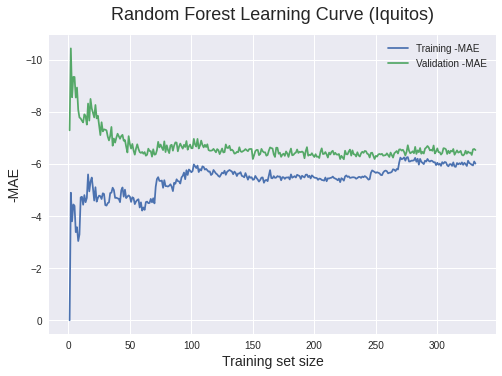

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes = [t_sizes_var]
train_sizes,train_scores, validation_scores = learning_curve(estimator = RandomForestRegressor(n_estimators=5, max_depth=2, min_samples_split=2),
                                                          X = iq_train_X,
                                                          y = iq_train_y, 
                                                          train_sizes = train_sizes, 
                                                          cv = 5,
                                                          scoring = 'neg_mean_absolute_error')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training -MAE')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation -MAE')
plt.ylabel('-MAE', fontsize = 14)
plt.gca().invert_yaxis()
plt.xlabel('Training set size', fontsize = 14)
plt.title('Random Forest Learning Curve (Iquitos)', fontsize = 18, y = 1.03)
plt.legend()

#**XGB IQ Learning Curves by Hand**

In [ ]:
iq_train_X = iq_train_X.to_numpy()
iq_train_y = iq_train_y.to_numpy()

iq_test_X = iq_test_X.to_numpy()
iq_test_y = iq_test_y.to_numpy()

[09:41:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:7.14054	validation_1-mae:7.65746
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 50 rounds.
[1]	validation_0-mae:7.13445	validation_1-mae:7.65146
[2]	validation_0-mae:7.12837	validation_1-mae:7.64546
[3]	validation_0-mae:7.12229	validation_1-mae:7.63949
[4]	validation_0-mae:7.11622	validation_1-mae:7.63351
[5]	validation_0-mae:7.11016	validation_1-mae:7.62754
[6]	validation_0-mae:7.10412	validation_1-mae:7.62157
[7]	validation_0-mae:7.09807	validation_1-mae:7.61562
[8]	validation_0-mae:7.09202	validation_1-mae:7.60967
[9]	validation_0-mae:7.08598	validation_1-mae:7.60381
[10]	validation_0-mae:7.07995	validation_1-mae:7.59788
[11]	validation_0-mae:7.07393	validation_1-mae:7.59203
[12]	validation_0-mae:7.0679	validation_1-mae:7.58611
[13]	validat

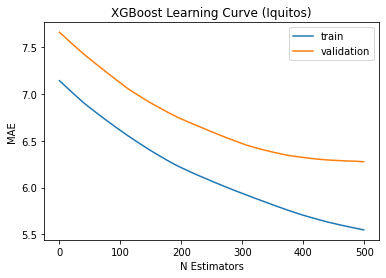

In [ ]:
model = XGBRegressor(n_estimators=500, learning_rate=0.0012)
# define the datasets to evaluate each iteration
evalset = [(iq_train_X, iq_train_y), (iq_test_X, iq_test_y)]
# fit the model
model.fit(iq_train_X, iq_train_y, early_stopping_rounds=50, eval_metric='mae', eval_set=evalset)
# evaluate performance
yhat = model.predict(iq_test_X)
score = mean_absolute_error(iq_test_y, yhat)
print('MAE: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['mae'], label='train')
plt.plot(results['validation_1']['mae'], label='validation')
# show the legend
plt.title("XGBoost Learning Curve (Iquitos)")
plt.xlabel("N Estimators")
plt.ylabel("MAE")
plt.legend()
# show the plot
plt.show()

#**IQ Attempting Recursive Feature Elimination**

#Random Forest RFE

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

#max_depth': 10, 'max_features': 19, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100

#sel = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=19, min_samples_leaf=5, min_samples_split=4, random_state=0)

#rfe = RFE(sel, 8)

#fit = rfe.fit(iq_train_X, iq_train_y)

rfe = RFE(RandomForestRegressor(), n_features_to_select=8)

model = RandomForestRegressor()

pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, iq_train_X, iq_train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
np.mean(n_scores)


-5.2467262485482005

#XGBoost RFE

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost.sklearn import XGBRegressor
from hyperopt import hp

rfe = RFE(XGBRegressor(), n_features_to_select=8)

model = XGBRegressor()

pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, iq_train_X, iq_train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
np.mean(n_scores)

-5.176008881236687

In [ ]:
pipe.fit(iq_train_X, iq_train_y)

[04:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Pipeline(memory=None,
         steps=[('Feature Selection',
                 RFE(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='reg:linear',
                                            random_state=...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              i

In [ ]:
rfe.support_

array([ True,  True, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False, False, False])

In [ ]:
pd.DataFrame(rfe.support_,index=iq_X.columns,columns=['Rank']).head()

Rank
year         True
weekofyear   True
ndvi_ne     False
ndvi_nw      True
ndvi_se      True

In [ ]:
iq_X.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [ ]:
rfe.ranking_

array([ 1,  1,  8,  1,  1,  4, 14,  2, 10,  7,  9,  1,  1, 13,  3,  1,  5,
        1,  6, 11, 12])

In [ ]:
rf_df = pd.DataFrame(rfe.ranking_,index=iq_X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

In [ ]:

rf_df

Rank
year                                      1
weekofyear                                1
ndvi_nw                                   1
ndvi_se                                   1
station_diur_temp_rng_c                   1
reanalysis_min_air_temp_k                 1
reanalysis_precip_amt_kg_per_m2           1
reanalysis_tdtr_k                         1
reanalysis_air_temp_k                     2
reanalysis_specific_humidity_g_per_kg     3
ndvi_sw                                   4
station_avg_temp_c                        5
station_max_temp_c                        6
reanalysis_dew_point_temp_k               7
ndvi_ne                                   8
reanalysis_max_air_temp_k                 9
reanalysis_avg_temp_k                    10
station_min_temp_c                       11
station_precip_mm                        12
reanalysis_relative_humidity_percent     13
precipitation_amt_mm                     14

#**IQ Model Prep Continuation**

In [ ]:
scaler = StandardScaler()

scaler.fit(iq_train_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
iq_train_X = scaler.transform(iq_train_X)
iq_test_X = scaler.transform(iq_test_X)

In [ ]:
iqCorrect_test_rel_vars_filled_NAs = scaler.transform(iqCorrect_test_rel_vars_filled_NAs)

In [ ]:
iqCorrect_test_all_vars_filled_NAs = scaler.transform(iqCorrect_test)

In [ ]:
iq_train_X

array([[ 1.69539719e-01,  1.42478478e-01, -6.48703177e-01,
         3.68863751e-01, -9.91468877e-01,  1.70777984e+00],
       [ 4.55154290e-01,  4.51976234e-01, -2.70010623e-01,
         5.20309564e-02,  3.28038817e-03, -2.56767537e-02],
       [ 5.69198271e-01,  5.77224489e-01,  8.66067038e-01,
         3.68863751e-01,  6.10545763e-01,  1.66929535e-01],
       ...,
       [-1.32817061e+00, -1.39776453e+00, -3.55201276e+00,
        -3.03708879e+00, -4.58241297e-01,  1.30242623e-01],
       [ 4.28914082e-01,  4.42660248e-01,  1.37099044e+00,
        -2.71772421e-02, -5.83206115e-02,  2.76990271e-01],
       [ 4.02456153e-03,  8.03719051e-02,  3.61143633e-01,
        -2.64801838e-01,  5.00169208e-01, -1.37392077e+00]])

#**IQ Random Forest Model**

Now that we have our data cleaned and separated, we can begin building models. We can easily create a train test split by using the built in function. 20% of our data is withheld for validation.

Our first model is a Random Forest Regression.

Before we can run the model, we need to optimize our hyperparameters.

To do this, we run a Grid Search to find the best combinations.

#**IQ RF Grid Search**

In [ ]:
#def rfr_model(train_features, train_target):
# Perform Grid-Search

gsc = GridSearchCV(estimator=RandomForestRegressor(), 
                   param_grid={'max_depth': (2, 5, 10, 20, 40),
                               'n_estimators': (100, 1000, 1500, 2000),
                               'max_features': [19],
                               'min_samples_leaf': [3, 4 , 5],
                               'min_samples_split': [2, 4, 8, 10],
                               },cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    
grid_result = gsc.fit(iq_train_X, iq_train_y)
best_params = grid_result.best_params_
    
rfr = RandomForestRegressor(max_depth=best_params["max_depth"],
                            n_estimators=best_params["n_estimators"],
                            max_features=best_params["max_features"],
                            min_samples_leaf=best_params["min_samples_leaf"],
                            min_samples_split=best_params["min_samples_split"],
                            random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, iq_train_X, iq_train_y, cv=10, scoring='neg_mean_absolute_error')

    #return scores

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 51.9min finished


Best: -91.696661 using {'max_depth': 10, 'max_features': 19, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}
-102.740036 (62.063443) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
-102.723029 (62.084273) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1000}
-102.648859 (62.303282) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1500}
-102.603514 (62.290356) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 2000}
-102.777718 (61.745149) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
-102.523454 (62.198305) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 1000}
-102.670470 (62.203920) with: {'max_depth': 2, 'max_featu

#**IQ RF Model Instantiation**

#**Still tweaking the model.fit to figure out submission**

In [ ]:
#previous attempts had max_depth = 2 after n estimators parameter
#best params after 2 hour grid search? could be worse than n_est 1k, max_depth 6, 
#{n_estimators=100, max_depth=40, max_features=6, min_samples_leaf=3, min_samples_split=4, random_state=0)

#best params for rel vars = Best: -123.037266 using {'max_depth': 2, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

#with month added Best: -108.541369 using {'max_depth': 2, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}

#revised new vars best corr individual Best: -118.666327 using {'max_depth': 2, 'max_features': 6, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}

#for RFE Best: -91.696661 using {'max_depth': 10, 'max_features': 19, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100}

#model = RandomForestRegressor(n_estimators=100, max_depth=2, max_features=6, min_samples_leaf=5, min_samples_split=10, random_state=0)

model = RandomForestRegressor(n_estimators=5, max_depth=2, min_samples_split=2)

model.fit(iq_train_X, iq_train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#**Visualizing the Trees**

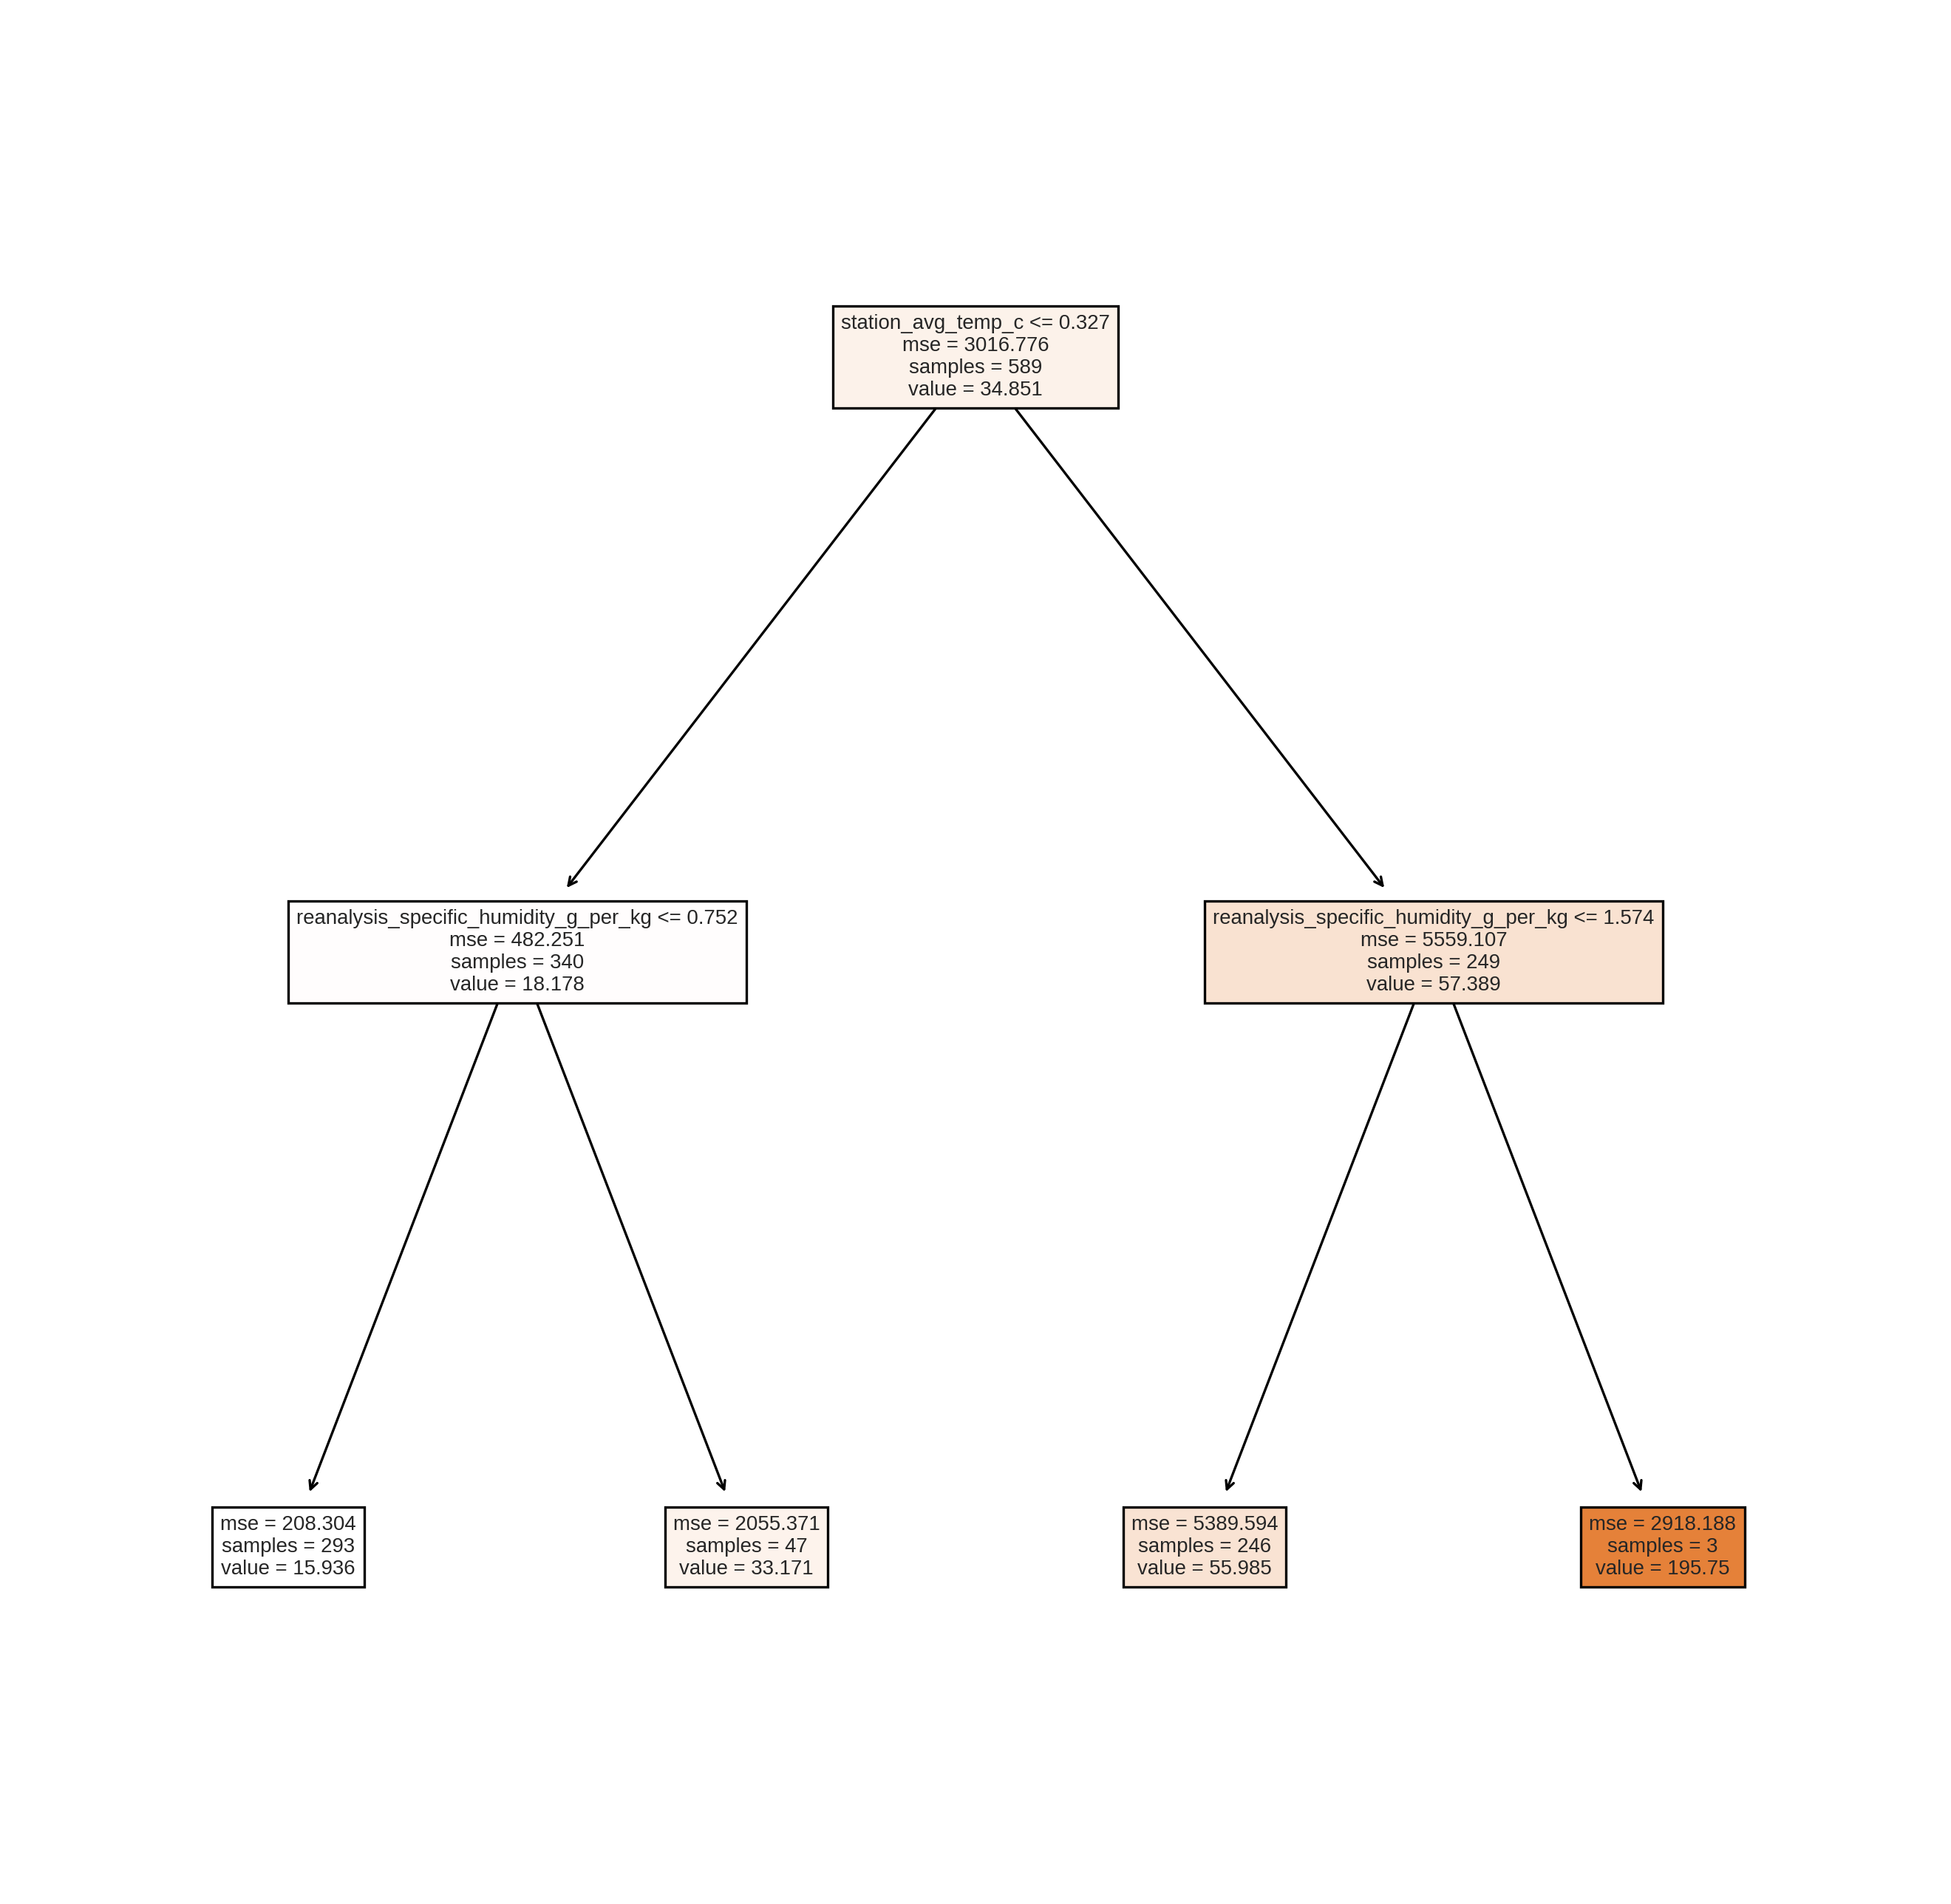

In [ ]:
fn=iq_X.columns
cn=iq_y.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

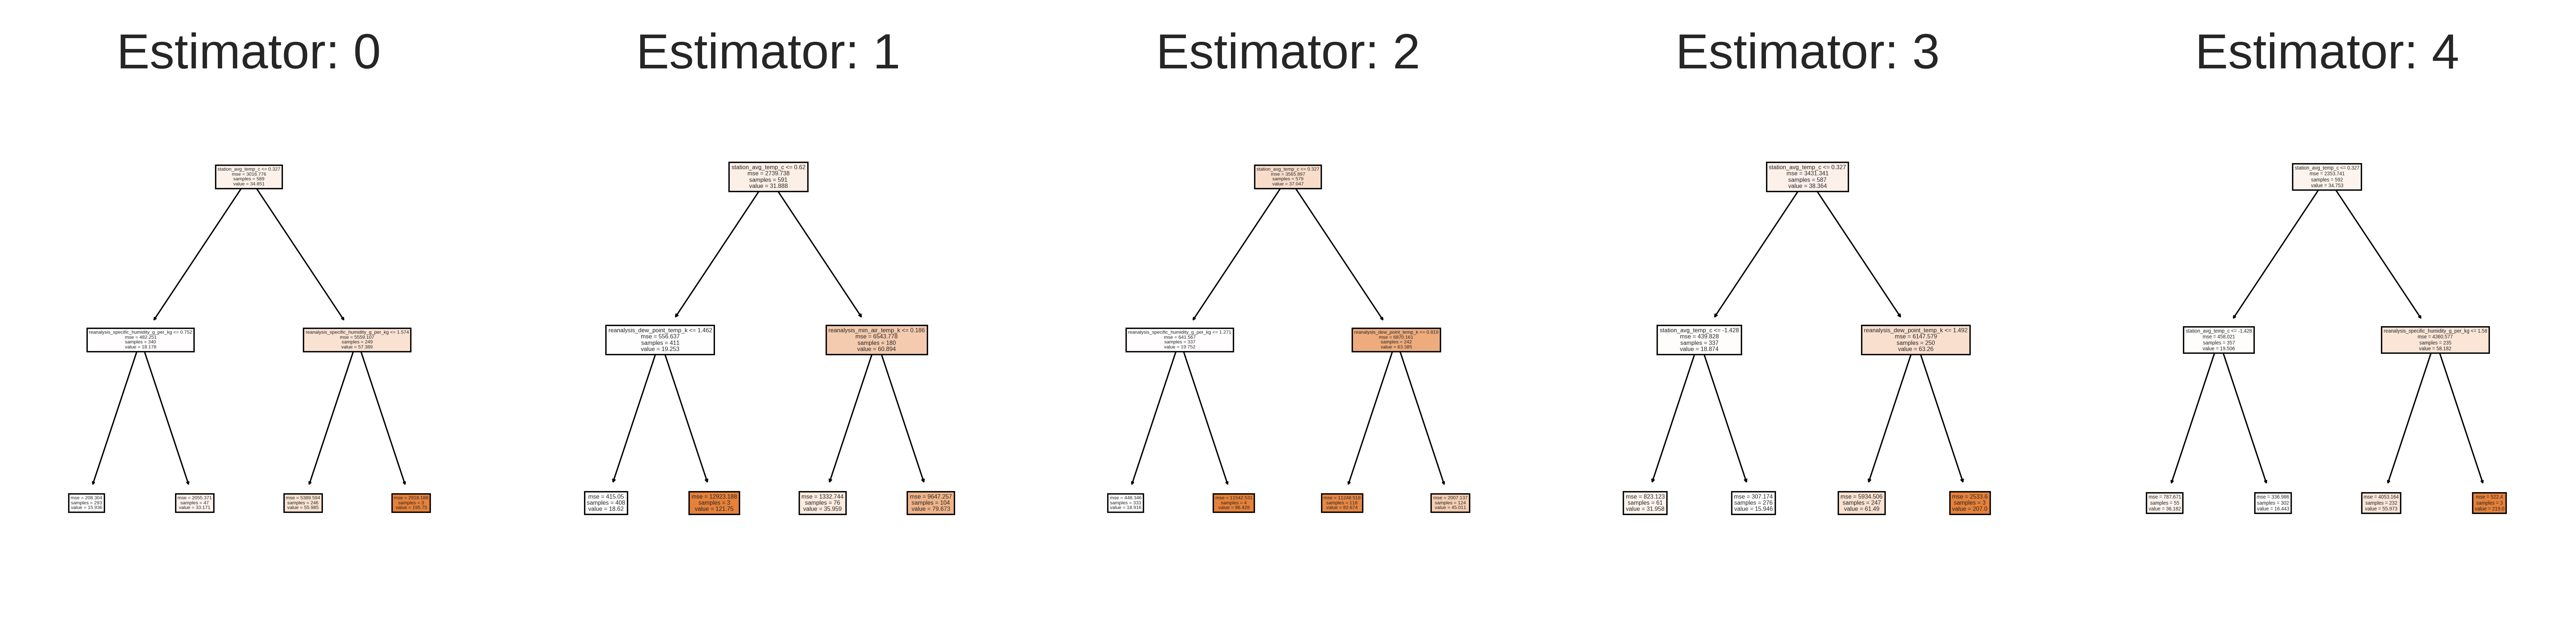

In [ ]:
fn=iq_X.columns
cn=iq_y.columns
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

#**Model Continuation (Skip tree visuals)**

In [ ]:
iq_predicted = model.predict(iq_test_X)

iq_predicted

array([ 9.48151107, 10.54087329,  5.08206862,  4.98281223, 12.58201443,
        4.27233014,  4.98281223,  4.98281223,  4.98281223,  5.79255071,
        4.98281223,  5.08206862,  4.98281223,  4.27233014, 10.54087329,
        4.98281223, 10.54087329,  6.69497495,  4.27233014,  6.69497495,
       10.54087329,  4.98281223,  4.98281223,  9.48151107,  4.27233014,
       10.54087329, 10.54087329, 12.58201443,  4.27233014,  4.98281223,
       10.54087329,  5.08206862,  4.27233014, 17.52071493,  9.48151107,
       10.54087329,  4.27233014,  4.27233014,  5.08206862, 17.52071493,
        6.69497495,  4.98281223,  4.27233014,  4.27233014,  5.79255071,
        5.08206862, 10.17680519, 10.17680519,  5.08206862,  5.08206862,
        4.98281223,  4.98281223,  5.08206862,  5.79255071, 10.17680519,
       10.54087329, 10.54087329, 17.52071493, 29.51294031, 10.54087329,
       12.58201443, 12.58201443, 12.58201443, 10.54087329,  5.79255071,
       10.54087329,  5.98449286,  5.98449286,  9.48151107,  4.27

([<matplotlib.axis.XTick at 0x7f63dec79f90>,
 <a list of 21 Text major ticklabel objects>)

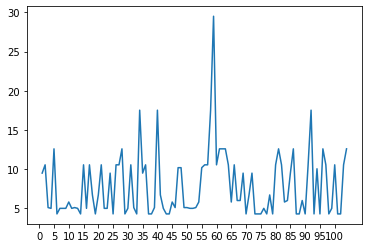

In [ ]:

y_example = np.arange(1, 105)
plt.plot(y_example, iq_predicted)
plt.xticks(np.arange(0, len(iq_predicted),5))

In [ ]:
pd.DataFrame(iq_predicted).to_csv("iq_pred_example_array.csv", header=None)

We can check our results by calculating MAE and MSE.

MAE & MSE

In [ ]:
iq_score_MAE = mean_absolute_error(iq_test_y, iq_predicted)
iq_score_MSE = math.sqrt(mean_absolute_error(iq_test_y, iq_predicted))

iq_score_MAE, iq_score_MSE

(5.626629372751276, 2.372051722191419)

#**Fitting the final RF IQ model in prep for prediction**

In [ ]:
iq_full_X = np.concatenate([iq_train_X, iq_test_X])
iq_full_y = np.concatenate([iq_train_y, iq_test_y])
iq_full_model = model.fit(iq_full_X, iq_full_y)

#**IQ Gradient Boosting Model**

#**IQ GB Grid Search**

In [ ]:
#def rfr_model(train_features, train_target):
# Perform Grid-Search

gsc = GridSearchCV(estimator=GradientBoostingRegressor(), 
                   param_grid={'max_depth': range(3,7),
                               'n_estimators': (10, 50, 100, 1000),
                               'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                               'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
                               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
                               },
                   cv=5, 
                   scoring='neg_mean_squared_error', 
                   verbose=1, 
                   n_jobs=-1)
    
grid_result = gsc.fit(iq_train_X, iq_train_y)
best_params = grid_result.best_params_
    
gbr = GradientBoostingRegressor(max_depth=best_params["max_depth"], 
                                n_estimators=best_params["n_estimators"],
                                learning_rate=best_params["learning_rate"],
                                min_samples_split=best_params["min_samples_split"],
                                min_samples_leaf=best_params["min_samples_leaf"],
                                random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(gbr, iq_train_X, iq_train_y, cv=5, scoring='neg_mean_absolute_error')

    #return scores

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1366 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2064 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 2714 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 4514 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 5574 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 6720 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 8078 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 9432 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 10966 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 12550 tasks      

Best: -99.595671 using {'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.30000000000000004, 'n_estimators': 100}
-120.899573 (32.586536) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 10}
-145.506075 (35.914790) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 50}
-148.375268 (37.252133) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100}
-149.292878 (37.158578) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 1000}
-120.899573 (32.586536) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'n_estimators': 10}
-145.510251 (35.915101) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'n_estimators': 50}
-148.366721 (37.24

#**IQ GB Model Instantiation**

In [ ]:
#best params -99 score 'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 0.1, 'min_samples_split': 0.30000000000000004, 'n_estimators': 100

from sklearn import ensemble

params = {'n_estimators': 100,
          'max_depth': 6,
          'min_samples_split': 0.30000000000000004,
          'learning_rate': 0.05,
          'min_samples_leaf': 0.1,
          'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(iq_train_X, iq_train_y)

iq_predicted_GB = clf.predict(iq_test_X)

MAE & MSE

In [ ]:
iq_score_MAE_GB = mean_absolute_error(iq_test_y, iq_predicted_GB)
iq_score_MSE_GB = math.sqrt(mean_squared_error(iq_test_y, iq_predicted_GB))

iq_score_MAE_GB, iq_score_MSE_GB

(5.928775268170534, 9.025680096926463)

In [ ]:
len(iq_predicted_GB)

104

#**Fitting the final GB IQ model in prep for prediction**

In [ ]:
iq_full_X = np.concatenate([iq_train_X, iq_test_X])

In [ ]:
iq_full_y = np.concatenate([iq_train_y, iq_test_y])

In [ ]:
iq_full_model = clf.fit(iq_full_X, iq_full_y)

#**IQ Neural Network Model**

#**IQ NN Grid Search**

In [ ]:
#def rfr_model(train_features, train_target):
# Perform Grid-Search

gsc = GridSearchCV(estimator=MLPRegressor(), 
                   param_grid={'hidden_layer_sizes': [(100,), (100, 100), (100, 50), (50, 50)],
                               'activation': ['tanh', 'relu'],
                               'max_iter': [1000],
                               'alpha': [0.0001, 0.001, 0.05]}, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    
grid_result = gsc.fit(iq_train_X, iq_train_y)
best_params = grid_result.best_params_
    
mlp = MLPRegressor(hidden_layer_sizes=best_params["hidden_layer_sizes"], 
                   activation=best_params["activation"],
                   max_iter=best_params["max_iter"],
                   alpha=best_params["alpha"],
                   random_state=False, verbose=True)

# Perform K-Fold CV
scores = cross_val_score(mlp, iq_train_X, iq_train_y, cv=10, scoring='neg_mean_absolute_error')

    #return scores

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.9min finished


Streaming output truncated to the last 5000 lines.
Iteration 26, loss = 79.66024862
Iteration 27, loss = 79.27850355
Iteration 28, loss = 78.90011052
Iteration 29, loss = 78.52862320
Iteration 30, loss = 78.18086871
Iteration 31, loss = 77.81706411
Iteration 32, loss = 77.45560622
Iteration 33, loss = 77.10557875
Iteration 34, loss = 76.74993537
Iteration 35, loss = 76.35712358
Iteration 36, loss = 76.01406873
Iteration 37, loss = 75.65758180
Iteration 38, loss = 75.32731623
Iteration 39, loss = 74.93985814
Iteration 40, loss = 74.59214070
Iteration 41, loss = 74.24708656
Iteration 42, loss = 73.88303561
Iteration 43, loss = 73.56729732
Iteration 44, loss = 73.17983561
Iteration 45, loss = 72.85730294
Iteration 46, loss = 72.46464957
Iteration 47, loss = 72.14733196
Iteration 48, loss = 71.78792844
Iteration 49, loss = 71.41390881
Iteration 50, loss = 71.09630847
Iteration 51, loss = 70.71659949
Iteration 52, loss = 70.39889836
Iteration 53, loss = 70.04127717
Iteration 54, loss = 69.7

#**IQ NN Model Instantiation**

In [ ]:
#best params so far? {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'max_iter': 1000}

model = MLPRegressor(solver ='adam', hidden_layer_sizes=100, max_iter=1000, random_state=1)
model.fit(iq_train_X, iq_train_y)

iq_predicted_NN = model.predict(iq_test_X)

MAE & MSE

In [ ]:
iq_score_MAE_NN = mean_absolute_error(iq_test_y, iq_predicted_NN)
iq_score_MSE_NN = math.sqrt(mean_squared_error(iq_test_y, iq_predicted_NN))

iq_score_MAE_NN, iq_score_MSE_NN

(7.8520818905828955, 13.619366340177178)

#**Fitting final NN IQ model in prep for prediction**

In [ ]:
iq_full_X = np.concatenate([iq_train_X, iq_test_X])

In [ ]:
iq_full_y = np.concatenate([iq_train_y, iq_test_y])

In [ ]:
iq_full_model = model.fit(iq_full_X, iq_full_y)

In [ ]:
iq_full_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=100, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

#**IQ XGBoost Model**

In [ ]:
#'colsample_bytree': [hp.uniform('colsample_bytree',0.5,1)],
#'reg_alpha': [hp.quniform('reg_alpha',40,180,1)],
#'min_child_weight': [hp.quniform('min_child_weight', 0, 10, 1)]

#def rfr_model(train_features, train_target):
# Perform Grid-Search
from xgboost.sklearn import XGBRegressor
from hyperopt import hp

gsc = GridSearchCV(estimator=XGBRegressor(), 
                   param_grid={'max_depth': (2, 5, 10, 20, 40),
                               'n_estimators': (100, 1000, 1500, 2000),
                               'gamma': [0, 2, 4, 6],
                               'colsample_bytree': (0.5, 0.75, 1),
                               'reg_alpha': (1, 20, 40),
                               'reg_lambda': [1, 3, 5],
                               'min_child_weight': (0, 10, 1)
                               },cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
    
grid_result = gsc.fit(iq_train_X, iq_train_y)
best_params = grid_result.best_params_
    
xgbr = xgb.XGBRegressor(max_depth=best_params["max_depth"],
                            n_estimators=best_params["n_estimators"],
                            gamma=best_params["gamma"],
                            colsample_bytree=int(best_params["colsample_bytree"]),
                            reg_alpha=best_params["reg_alpha"],
                            reg_lambda=best_params["reg_lambda"],
                            min_child_weight=best_params["min_child_weight"],
                            random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(xgbr, iq_train_X, iq_train_y, cv=10, scoring='neg_mean_absolute_error')

    #return scores

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 774 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1344 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2054 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 3030 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3954 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 4806 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 5942 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 7142 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 8476 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 9984 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 11646 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 13654 tasks      | elapsed: 42.8min
[Parallel(n_jobs=-1)]: Done 15476 tasks    

Streaming output truncated to the last 5000 lines.
-7.404474 (0.581998) with: {'colsample_bytree': 0.5, 'gamma': 4, 'max_depth': 20, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 20, 'reg_lambda': 3}
-7.409790 (0.629705) with: {'colsample_bytree': 0.5, 'gamma': 4, 'max_depth': 20, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 20, 'reg_lambda': 5}
-7.281839 (0.644965) with: {'colsample_bytree': 0.5, 'gamma': 4, 'max_depth': 20, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 40, 'reg_lambda': 1}
-7.316334 (0.630812) with: {'colsample_bytree': 0.5, 'gamma': 4, 'max_depth': 20, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 40, 'reg_lambda': 3}
-7.323590 (0.636960) with: {'colsample_bytree': 0.5, 'gamma': 4, 'max_depth': 20, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 40, 'reg_lambda': 5}
-7.493027 (0.468863) with: {'colsample_bytree': 0.5, 'gamma': 4, 'max_depth': 20, 'min_child_weight': 1, 'n_estimators': 1000, 'reg_alpha': 1, 'reg_l

#**IQ XGB Model Instantiation**

In [ ]:
iq_train_y = iq_train_y.astype(int)

In [ ]:
#best params so far? -5.160024 (1.027073) with: {'colsample_bytree': 1, 'gamma': 2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 20, 'reg_lambda': 5}

#best rel var params -6.221425 (1.000049) with: {'colsample_bytree': 0.5, 'gamma': 6, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 100, 'reg_alpha': 40, 'reg_lambda': 5}

#aredone best rel var params?? -6.960481 (0.726223) with: {'colsample_bytree': 0.75, 'gamma': 0, 'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 100, 'reg_alpha': 40, 'reg_lambda': 3}

#most recent sub model = xgb.XGBRegressor(max_depth=2, n_estimators=100, gamma=0, reg_lambda=3, reg_alpha=40, min_child_weight=10, col_sample_bytree=0.75)

model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.0012)

model.fit(iq_train_X, iq_train_y)

iq_predicted_XGB = model.predict(iq_test_X)

[09:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
iq_score_MAE_XGB = mean_absolute_error(iq_test_y, iq_predicted_XGB)
iq_score_MSE_XGB = math.sqrt(mean_squared_error(iq_test_y, iq_predicted_XGB))

iq_score_MAE_XGB, iq_score_MSE_XGB

(6.275010441358273, 12.485336082884947)

#**Final IQ XGB model in prep for prediction**

In [ ]:
iq_full_X = np.concatenate([iq_train_X, iq_test_X])

In [ ]:
iq_full_y = np.concatenate([iq_train_y, iq_test_y])

In [ ]:
iq_full_model = model.fit(iq_full_X, iq_full_y)

[09:32:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
iq_full_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.0012, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#**|||||||||||||||||||||  START OF SJ MODELS  ||||||||||||||||||||||||**

#**SJ Model Prep (Run Before a Model)**

#**Experimenting with dropping first half of SJ**

We want to drop approximately every row before index 460

In [ ]:
test_dropped_df = sj_X.drop(sj_X.index[0:460])

In [ ]:
test_dropped_df

reanalysis_specific_humidity_g_per_kg  ...  month
460                              14.730000  ...      3
461                              13.935714  ...      3
462                              14.244286  ...      3
463                              14.671429  ...      3
464                              15.732857  ...      4
..                                     ...  ...    ...
931                              13.644286  ...      3
932                              14.662857  ...      4
933                              14.184286  ...      4
934                              13.858571  ...      4
935                              15.671429  ...      4

[476 rows x 6 columns]

In [ ]:
sj_X2 = test_dropped_df

In [ ]:
sj_y2 = sj_y.drop(sj_y.index[0:460])

In [ ]:
#test_size = 0.277777777 bandaid
#test_size = 0.2 default??

#sj_train_X, sj_test_X, sj_train_y, sj_test_y = train_test_split(sj_X, sj_y, test_size = 0.2)

sj_train_X, sj_test_X, sj_train_y, sj_test_y = train_test_split(sj_X2, sj_y2, test_size = 0.2)

In [ ]:
sj_train_X

reanalysis_specific_humidity_g_per_kg  ...  month
821                              14.898571  ...      2
603                              14.771429  ...     12
869                              15.368571  ...      1
559                              15.378571  ...      1
585                              17.758571  ...      7
..                                     ...  ...    ...
675                              16.885714  ...      4
887                              17.005714  ...      5
625                              16.308571  ...      5
694                              18.968571  ...      9
632                              17.357143  ...      6

[380 rows x 6 columns]

#**RF SJ Learning Curves by Hand**

In [ ]:
t_sizes_var = list(range(1,304))

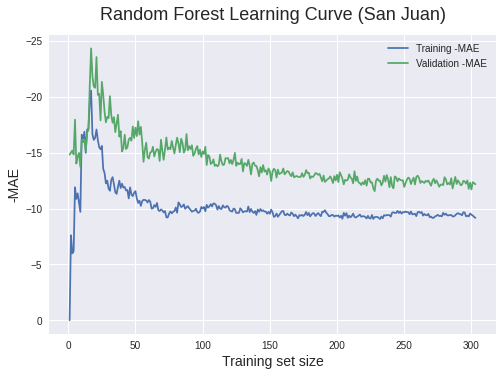

In [ ]:
from sklearn.model_selection import learning_curve 

#best is n_est = 5

train_sizes = [t_sizes_var]
train_sizes,train_scores, validation_scores = learning_curve(estimator = RandomForestRegressor(n_estimators=5, max_depth=7, min_samples_split=5, min_samples_leaf=5),
                                                          X = sj_train_X,
                                                          y = sj_train_y, 
                                                          train_sizes = train_sizes, 
                                                          cv = 5,
                                                          scoring = 'neg_mean_absolute_error')
train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training -MAE')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation -MAE')
plt.ylabel('-MAE', fontsize = 14)
plt.gca().invert_yaxis()
plt.xlabel('Training set size', fontsize = 14)
plt.title('Random Forest Learning Curve (San Juan)', fontsize = 18, y = 1.03)
plt.legend()

#**XGB SJ Learning Curves by Hand**

In [ ]:
sj_train_y = sj_train_y.to_numpy()
sj_train_X = sj_train_X.to_numpy()

sj_test_X = sj_test_X.to_numpy()
sj_test_y = sj_test_y.to_numpy()

[09:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:33.7385	validation_1-mae:33.1433
[1]	validation_0-mae:33.6728	validation_1-mae:33.0792
[2]	validation_0-mae:33.6067	validation_1-mae:33.0154
[3]	validation_0-mae:33.5411	validation_1-mae:32.9515
[4]	validation_0-mae:33.4752	validation_1-mae:32.8879
[5]	validation_0-mae:33.4099	validation_1-mae:32.8244
[6]	validation_0-mae:33.3443	validation_1-mae:32.761
[7]	validation_0-mae:33.2792	validation_1-mae:32.6977
[8]	validation_0-mae:33.2141	validation_1-mae:32.6345
[9]	validation_0-mae:33.1491	validation_1-mae:32.5715
[10]	validation_0-mae:33.0841	validation_1-mae:32.5086
[11]	validation_0-mae:33.0197	validation_1-mae:32.4457
[12]	validation_0-mae:32.955	validation_1-mae:32.3831
[13]	validation_0-mae:32.8903	validation_1-mae:32.3206
[14]	validation_0-mae:32.826	validation_1-mae:32.2582
[15]	validation_0-mae:32.7618	validation_1-mae:32.1959
[16]	v

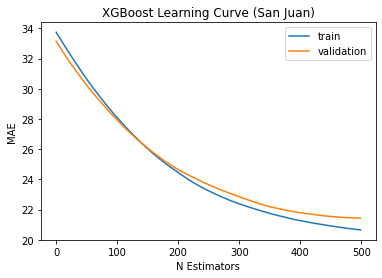

In [ ]:
model = XGBRegressor(n_estimators=500, learning_rate=0.002)
# define the datasets to evaluate each iteration
evalset = [(sj_train_X, sj_train_y), (sj_test_X, sj_test_y)]
# fit the model
model.fit(sj_train_X, sj_train_y, eval_metric='mae', eval_set=evalset)
# evaluate performance
yhat = model.predict(sj_test_X)
score = mean_absolute_error(sj_test_y, yhat)
print('MAE: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['mae'], label='train')
plt.plot(results['validation_1']['mae'], label='validation')
# show the legend
plt.title("XGBoost Learning Curve (San Juan)")
plt.xlabel("N Estimators")
plt.ylabel("MAE")
plt.legend()
# show the plot
plt.show()

#**SJ Attempting Recursive Feature Elimination**

#SJ RF RFE

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

#max_depth': 10, 'max_features': 19, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 100

#sel = RandomForestRegressor(n_estimators=100, max_depth=10, max_features=19, min_samples_leaf=5, min_samples_split=4, random_state=0)

#rfe = RFE(sel, 8)

#fit = rfe.fit(iq_train_X, iq_train_y)

rfe = RFE(RandomForestRegressor(), n_features_to_select=8)

model = RandomForestRegressor()

pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, sj_train_X, sj_train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
np.mean(n_scores)


-13.733270774774775

#SJ XGBoost RFE

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost.sklearn import XGBRegressor
from hyperopt import hp

rfe = RFE(XGBRegressor(), n_features_to_select=8)

model = XGBRegressor()

pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, sj_train_X, sj_train_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
np.mean(n_scores)

-13.937685039426077

In [ ]:
pipe.fit(sj_train_X, sj_train_y)

[04:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:25:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

Pipeline(memory=None,
         steps=[('Feature Selection',
                 RFE(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='reg:linear',
                                            random_state=...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              i

In [ ]:
rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False,  True])

In [ ]:
pd.DataFrame(rfe.support_,index=sj_X.columns,columns=['Rank']).head()

Rank
year         True
weekofyear   True
ndvi_ne     False
ndvi_nw     False
ndvi_se      True

In [ ]:
sj_X.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'month'],
      dtype='object')

In [ ]:
rfe.ranking_

array([ 1,  1, 13, 12,  1,  7,  8, 11, 10,  1,  1,  4,  9,  3,  6, 14,  5,
       15,  1,  1,  2,  1])

In [ ]:
rf_df = pd.DataFrame(rfe.ranking_,index=sj_X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

In [ ]:

rf_df

Rank
year                                      1
station_min_temp_c                        1
station_max_temp_c                        1
reanalysis_dew_point_temp_k               1
reanalysis_max_air_temp_k                 1
month                                     1
weekofyear                                1
ndvi_se                                   1
station_precip_mm                         2
reanalysis_relative_humidity_percent      3
reanalysis_min_air_temp_k                 4
station_avg_temp_c                        5
reanalysis_specific_humidity_g_per_kg     6
ndvi_sw                                   7
precipitation_amt_mm                      8
reanalysis_precip_amt_kg_per_m2           9
reanalysis_avg_temp_k                    10
reanalysis_air_temp_k                    11
ndvi_nw                                  12
ndvi_ne                                  13
reanalysis_tdtr_k                        14
station_diur_temp_rng_c                  15

#**SJ Model Prep continuation**

In [ ]:
scaler = StandardScaler()

scaler.fit(sj_train_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
sj_train_X = scaler.transform(sj_train_X)
sj_test_X = scaler.transform(sj_test_X)

In [ ]:
sjCorrect_test_rel_vars_filled_NAs = scaler.transform(sjCorrect_test_rel_vars_filled_NAs)

In [ ]:
#sjCorrect_test_all_vars_filled_NAs = scaler.transform(sjCorrect_test)

ValueError: ignored

In [ ]:
sj_y

total_cases
0             4
1             5
2             4
3             3
4             6
..          ...
931           4
932           3
933           1
934           3
935           5

[936 rows x 1 columns]

#**SJ Random Forest Model**

#**SJ RF Grid Search**

In [ ]:
#def rfr_model(train_features, train_target):
# Perform Grid-Search

gsc = GridSearchCV(estimator=RandomForestRegressor(), 
                   param_grid={'max_depth': (2, 5, 10, 20, 40),
                               'n_estimators': (100, 1000, 1500, 2000),
                               'max_features': [19],
                               'min_samples_leaf': [3, 4 , 5],
                               'min_samples_split': [2, 4, 8, 10],
                               },cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    
grid_result = gsc.fit(sj_train_X, sj_train_y)
best_params = grid_result.best_params_
    
rfr = RandomForestRegressor(max_depth=best_params["max_depth"],
                            n_estimators=best_params["n_estimators"],
                            max_features=best_params["max_features"],
                            min_samples_leaf=best_params["min_samples_leaf"],
                            min_samples_split=best_params["min_samples_split"],
                            random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, sj_train_X, sj_train_y, cv=10, scoring='neg_mean_absolute_error')

    #return scores

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 45.1min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 75.0min finished


Best: -814.978699 using {'max_depth': 10, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
-2004.750860 (959.662789) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
-1974.508861 (930.726779) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1000}
-1977.547575 (932.197638) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 1500}
-1975.159528 (929.826472) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 2000}
-1974.524838 (905.446573) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}
-1986.470043 (949.798417) with: {'max_depth': 2, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 1000}
-1980.999916 (930.248565) with: {'max_depth'

#**SJ RF Model Instantiation**

In [ ]:
#previously had max_depth =2
#currently best params are? {'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}

#rel vars Best: -2993.390390 using {'max_depth': 2, 'max_features': 4, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}

#with month added and rel vars: Best: -2117.059661 using {'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

#with specific correlated rel vars Best: -1935.605743 using {'max_depth': 40, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

#RFE Best: -814.978699 using {'max_depth': 10, 'max_features': 19, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}

#model = RandomForestRegressor(n_estimators=100, max_depth=40, max_features=6, min_samples_leaf=4, min_samples_split=2, random_state=0)

#very best model = RandomForestRegressor(n_estimators=5, max_depth=2, min_samples_split=2, min_samples_leaf=2)

model = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=4, min_samples_leaf=3)


model.fit(sj_train_X, sj_train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#**Visualizing the trees**

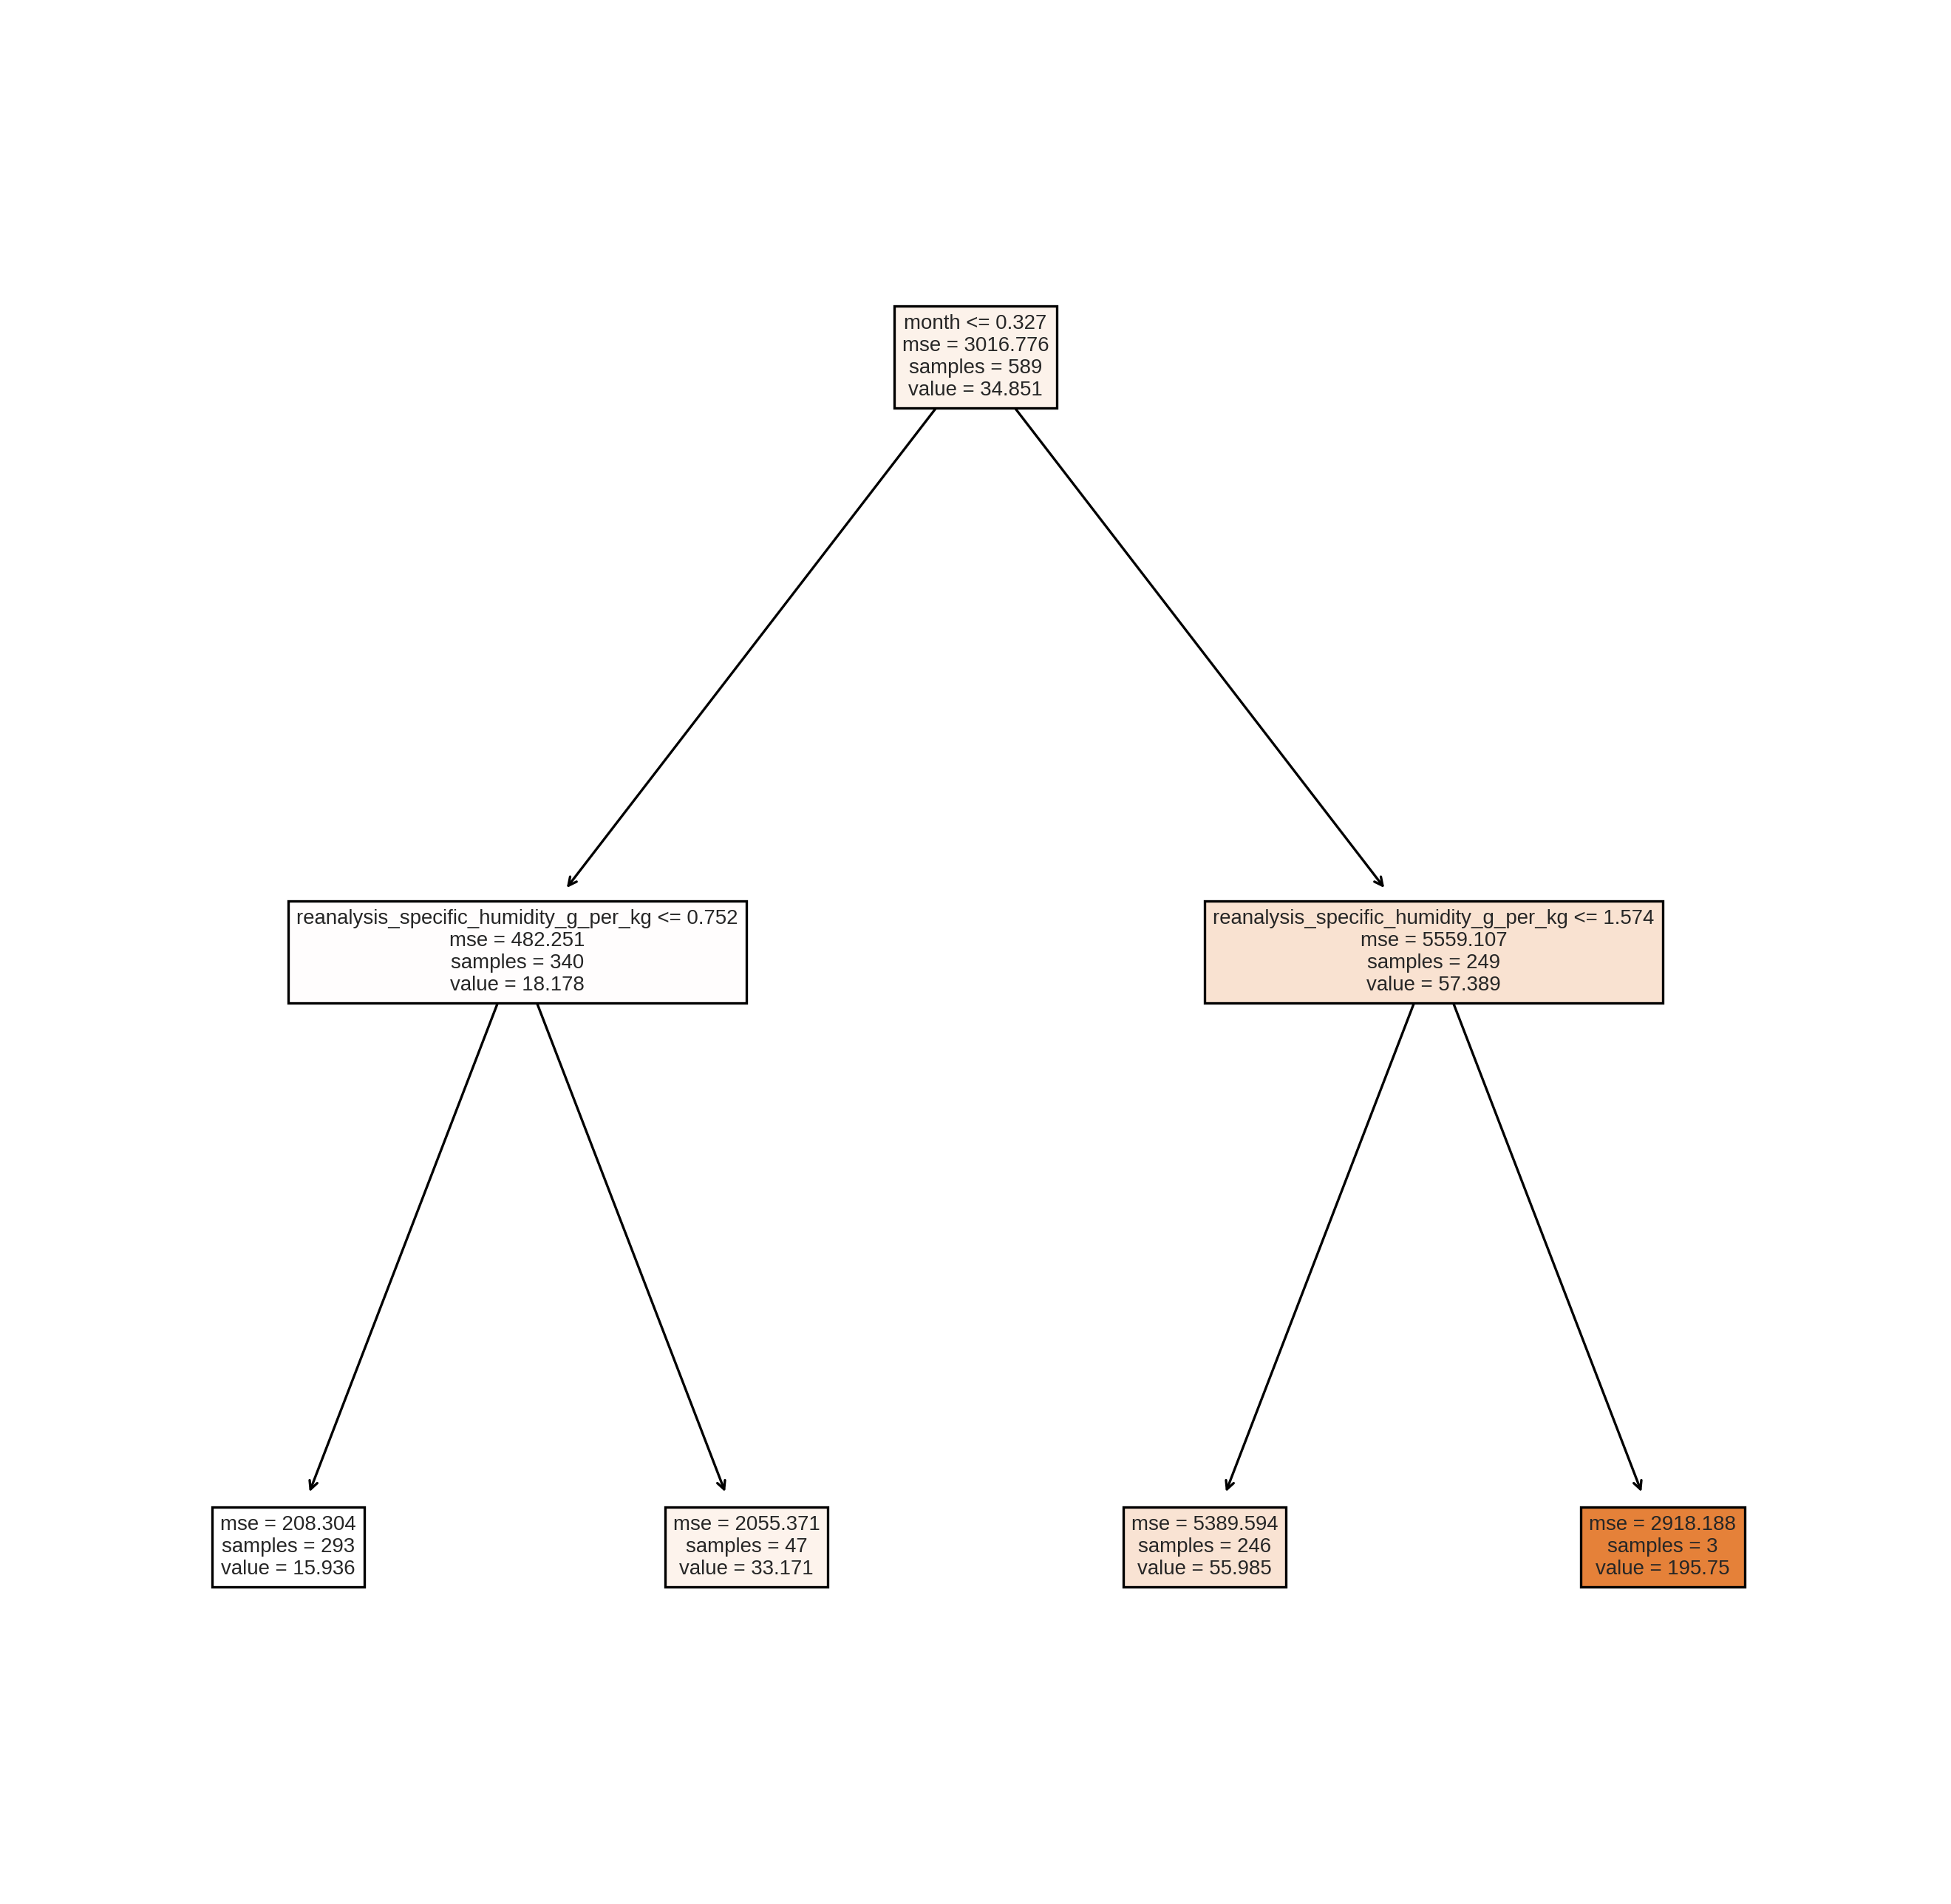

In [ ]:
fn=sj_X.columns
cn=sj_y.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

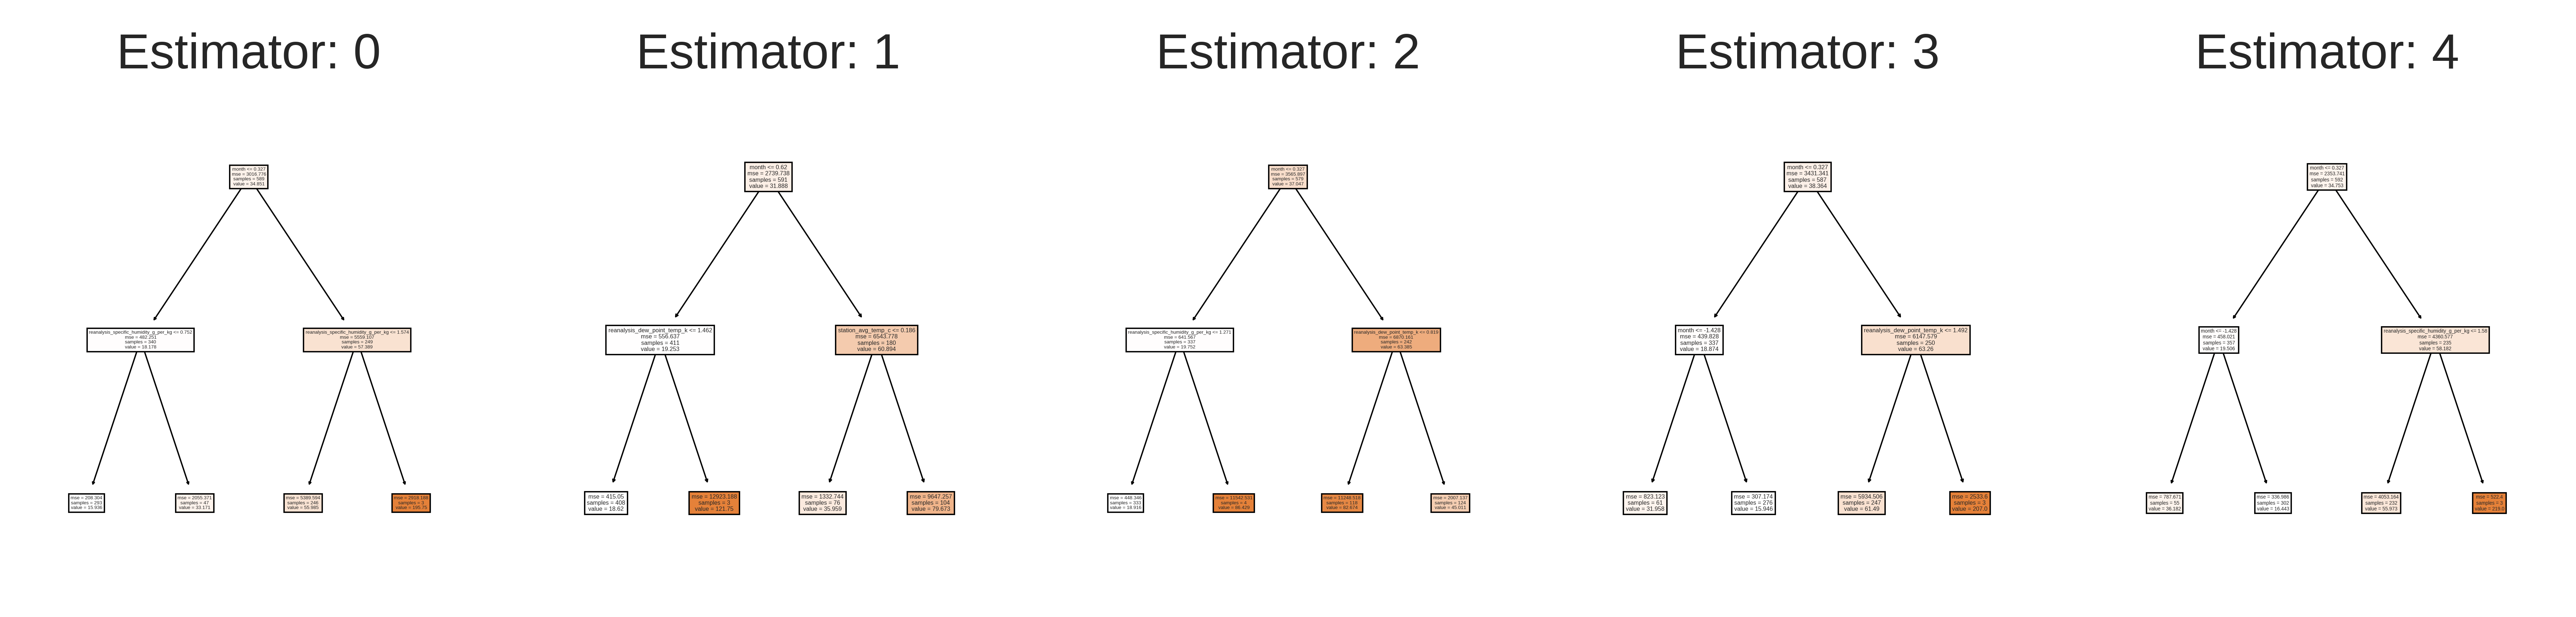

In [ ]:
fn=sj_X.columns
cn=sj_y.columns
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

#**Model Continuation**

In [ ]:
len(sj_train_X)

748

In [ ]:
sj_predicted = model.predict(sj_test_X)

sj_predicted

array([27.67512393,  8.55263059, 25.05583936, 20.7349614 , 15.21991162,
        8.77103066, 15.28317352, 25.33972547, 25.32370238,  6.19867777,
       35.06308503,  9.16990765, 27.36259416, 25.5701746 ,  6.09615548,
       26.57581746, 46.05389017, 30.27622777, 24.59755628, 11.1352904 ,
       13.53217352, 36.2249854 , 55.33650938, 25.13165568, 17.92334632,
       27.72050916, 26.34671284,  6.7341746 ,  7.6404246 ,  8.57976587,
       27.84273593,  6.46078211, 12.92201082,  9.23974278, 19.80163528,
        6.061808  , 26.30368434, 28.3154533 , 22.67981061, 10.08582179,
       37.70496176, 13.8759329 , 16.45322403, 35.26043856, 29.25994605,
       24.42063492, 24.06180411, 12.54139683, 24.98784452,  5.66491595,
       14.53927381,  6.56451515, 21.01307287, 27.36097403, 11.31024675,
       13.75246861, 36.43839924, 18.92455353, 10.05890118,  4.40132576,
       19.75083333, 13.19538095, 45.30027597, 80.49194986,  8.35333514,
       15.75102778,  8.91664208, 34.41236941, 20.00007079, 29.16

([<matplotlib.axis.XTick at 0x7f63da937610>,
 <a list of 20 Text major ticklabel objects>)

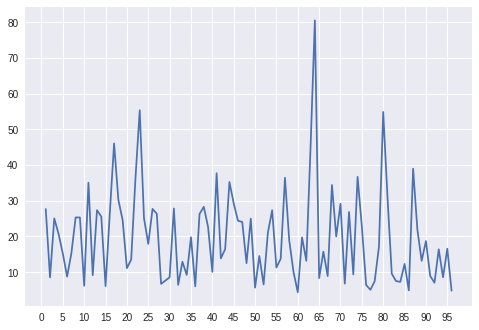

In [ ]:
y_example = np.arange(1, 97)
plt.plot(y_example, sj_predicted)
plt.xticks(np.arange(0, len(sj_predicted),5))

In [ ]:
pd.DataFrame(sj_predicted).to_csv("sj_pred_example_array2.csv", header=None)

In [ ]:
len(sj_predicted)

188

MAE & MSE

In [ ]:
sj_score_MAE = mean_absolute_error(sj_test_y, sj_predicted)
sj_score_MSE = math.sqrt(mean_absolute_error(sj_test_y, sj_predicted))

sj_score_MAE, sj_score_MSE

(13.077162955256545, 3.616236020402505)

#**Fitting the final RF SJ model in prep for prediction**

In [ ]:
sj_full_X = np.concatenate([sj_train_X, sj_test_X])
sj_full_y = np.concatenate([sj_train_y, sj_test_y])
sj_full_model = model.fit(sj_full_X, sj_full_y)

In [ ]:
sj_full_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=5, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#**SJ Gradient Boosting Model**

#**SJ GB Grid Search**

In [ ]:
#def rfr_model(train_features, train_target):
# Perform Grid-Search

gsc = GridSearchCV(estimator=GradientBoostingRegressor(), 
                   param_grid={'max_depth': range(3,7),
                               'n_estimators': (10, 50, 100, 1000),
                               'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                               'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
                               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
                               },
                   cv=5, 
                   scoring='neg_mean_squared_error', 
                   verbose=1, 
                   n_jobs=-1)
    
grid_result = gsc.fit(sj_train_X, sj_train_y)
best_params = grid_result.best_params_
    
gbr = GradientBoostingRegressor(max_depth=best_params["max_depth"], 
                                n_estimators=best_params["n_estimators"],
                                learning_rate=best_params["learning_rate"],
                                min_samples_split=best_params["min_samples_split"],
                                min_samples_leaf=best_params["min_samples_leaf"],
                                random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(gbr, sj_train_X, sj_train_y, cv=5, scoring='neg_mean_absolute_error')

    #return scores

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 4800 candidates, totalling 24000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 50.0min
[Parallel(n_jobs=-1)]: Done 11246 tasks      |

Best: -989.478591 using {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 1000}
-1409.001177 (352.117379) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 10}
-1512.967426 (301.269766) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 50}
-1496.054282 (265.822962) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 100}
-1577.570707 (256.292093) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 1000}
-1409.001177 (352.117379) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'n_estimators': 10}
-1512.967426 (301.269766) with: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'n_estimators': 50}
-1496.988256 (264.72

#**SJ GB Model Instantiation**

In [ ]:
#best grid search params {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 1000}

params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 2,
          'min_samples_split': 0.1,
          'learning_rate': 0.05,
          'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(sj_train_X, sj_train_y)

sj_predicted_GB = clf.predict(sj_test_X)

MAE & MSE

In [ ]:
sj_score_MAE_GB = mean_absolute_error(sj_test_y, sj_predicted_GB)
sj_score_MSE_GB = math.sqrt(mean_absolute_error(sj_test_y, sj_predicted_GB))

sj_score_MAE_GB, sj_score_MSE_GB

(16.621961056944855, 4.077003931436031)

In [ ]:
len(sj_predicted_GB)

260

#**Final GB SJ model in prep for prediction**

In [ ]:
sj_full_X = np.concatenate([sj_train_X, sj_test_X])

In [ ]:
sj_full_y = np.concatenate([sj_train_y, sj_test_y])

In [ ]:
sj_full_model = clf.fit(sj_full_X, sj_full_y)

In [ ]:
sj_full_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=0.1,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#**SJ Neural Network Model**

#**SJ NN Grid Search**

In [ ]:
#def rfr_model(train_features, train_target):
# Perform Grid-Search

gsc = GridSearchCV(estimator=MLPRegressor(), 
                   param_grid={'hidden_layer_sizes': [(100,), (100, 100), (100, 50), (50, 50)],
                               'activation': ['tanh', 'relu'],
                               'max_iter': [1000],
                               'alpha': [0.0001, 0.001, 0.05]}, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
    
grid_result = gsc.fit(sj_train_X, sj_train_y)
best_params = grid_result.best_params_
    
mlp = MLPRegressor(hidden_layer_sizes=best_params["hidden_layer_sizes"], 
                   activation=best_params["activation"],
                   max_iter=best_params["max_iter"],
                   alpha=best_params["alpha"],
                   random_state=False, verbose=True)

# Perform K-Fold CV
scores = cross_val_score(mlp, sj_train_X, sj_train_y, cv=10, scoring='neg_mean_absolute_error')

    #return scores

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  6.8min finished


Streaming output truncated to the last 5000 lines.
Iteration 26, loss = 1508.66891241
Iteration 27, loss = 1492.30498187
Iteration 28, loss = 1475.59614258
Iteration 29, loss = 1458.43186195
Iteration 30, loss = 1442.92640303
Iteration 31, loss = 1425.89558110
Iteration 32, loss = 1409.29569754
Iteration 33, loss = 1392.48523132
Iteration 34, loss = 1376.01093818
Iteration 35, loss = 1361.22947540
Iteration 36, loss = 1345.62763703
Iteration 37, loss = 1330.78456112
Iteration 38, loss = 1315.72678176
Iteration 39, loss = 1302.47663918
Iteration 40, loss = 1288.84622184
Iteration 41, loss = 1274.89324456
Iteration 42, loss = 1262.86197120
Iteration 43, loss = 1250.84845294
Iteration 44, loss = 1240.69947801
Iteration 45, loss = 1229.78340757
Iteration 46, loss = 1219.03264357
Iteration 47, loss = 1210.35091861
Iteration 48, loss = 1201.43515192
Iteration 49, loss = 1194.17493339
Iteration 50, loss = 1186.97872633
Iteration 51, loss = 1179.86951038
Iteration 52, loss = 1173.33268162
Iter

#**SJ NN Model Instantiation**

In [ ]:
#best model params so far? {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 1000}

from sklearn.neural_network import MLPRegressor

#may want to try lgbfs solver too
model = MLPRegressor(solver ='sgd', hidden_layer_sizes=50, max_iter=20, random_state=1)
model.fit(sj_train_X, sj_train_y)

sj_predicted_NN = model.predict(sj_test_X)

MAE & MSE

In [ ]:
sj_score_MAE_NN = mean_absolute_error(sj_test_y, sj_predicted_NN)
sj_score_MSE_NN = math.sqrt(mean_squared_error(sj_test_y, sj_predicted_NN))

sj_score_MAE_NN, sj_score_MSE_NN

(23.499125251492842, 40.80702142989702)

#**Final SJ NN Model in Prep for prediction**

In [ ]:
sj_full_X = np.concatenate([sj_train_X, sj_test_X])

In [ ]:
sj_full_y = np.concatenate([sj_train_y, sj_test_y])

In [ ]:
sj_full_model = model.fit(sj_full_X, sj_full_y)

In [ ]:
sj_full_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=50, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=20, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='sgd', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

#**SJ XGBoost Model**

#**SJ XGBoost Grid Search**

In [ ]:
#'colsample_bytree': [hp.uniform('colsample_bytree',0.5,1)],
#'reg_alpha': [hp.quniform('reg_alpha',40,180,1)],
#'min_child_weight': [hp.quniform('min_child_weight', 0, 10, 1)]

#def rfr_model(train_features, train_target):
# Perform Grid-Search
from xgboost.sklearn import XGBRegressor
from hyperopt import hp

gsc = GridSearchCV(estimator=XGBRegressor(), 
                   param_grid={'max_depth': (2, 5, 10, 40),
                               'n_estimators': (100, 1000, 2000),
                               'gamma': [0, 2, 4, 6],
                               'colsample_bytree': (0.5, 0.75, 1),
                               'reg_alpha': (1, 20, 40),
                               'reg_lambda': [1, 3, 5],
                               'min_child_weight': (0,1)
                               },cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
    
grid_result = gsc.fit(sj_train_X, sj_train_y)
best_params = grid_result.best_params_
    
xgbr = xgb.XGBRegressor(max_depth=best_params["max_depth"],
                            n_estimators=best_params["n_estimators"],
                            gamma=best_params["gamma"],
                            colsample_bytree=int(best_params["colsample_bytree"]),
                            reg_alpha=best_params["reg_alpha"],
                            reg_lambda=best_params["reg_lambda"],
                            min_child_weight=best_params["min_child_weight"],
                            random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(xgbr, sj_train_X, sj_train_y, cv=10, scoring='neg_mean_absolute_error')

    #return scores

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 934 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1498 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 2072 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 2872 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 3760 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 4720 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 5802 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 7004 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 8280 tasks      | elapsed: 45.7min
[Parallel(n_jobs=-1)]: Done 9610 tasks      | elapsed: 55.3min
[Parallel(n_jobs=-1)]: Done 11114 tasks      | elapsed: 68.2min
[Parallel(n_jobs=-1)]: Done 12640 tasks      

[11:44:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -23.432209 using {'colsample_bytree': 1, 'gamma': 4, 'max_depth': 5, 'min_child_weight': 0, 'n_estimators': 100, 'reg_alpha': 40, 'reg_lambda': 5}
-24.030099 (1.849442) with: {'colsample_bytree': 0.5, 'gamma': 0, 'max_depth': 2, 'min_child_weight': 0, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 1}
-23.757401 (1.807133) with: {'colsample_bytree': 0.5, 'gamma': 0, 'max_depth': 2, 'min_child_weight': 0, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 3}
-23.737512 (2.057090) with: {'colsample_bytree': 0.5, 'gamma': 0, 'max_depth': 2, 'min_child_weight': 0, 'n_estimators': 100, 'reg_alpha': 1, 'reg_lambda': 5}
-24.238563 (1.815640) with: {'colsample_bytree': 0.5, 'gamma': 0, 'max_depth': 2, 'min_child_weight': 0, 'n_estimators': 100, 'reg_alpha': 20, 'reg_lambda': 1}
-23.680093 (1.916947) with: {'colsample_bytree': 0.5, 'gamma': 0, 'max_depth': 2, '

#**SJ XGB Model Instantiation**

In [ ]:
#Best: -13.010273 using {'colsample_bytree': 1, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 0, 'n_estimators': 100, 'reg_alpha': 20, 'reg_lambda': 1}

#best with rel vars Best: -25.109559 using {'colsample_bytree': 1, 'gamma': 0, 'max_depth': 2, 'min_child_weight': 0, 'n_estimators': 100, 'reg_alpha': 20, 'reg_lambda': 5}

#best redone rel vars??? Best: -23.432209 using {'colsample_bytree': 1, 'gamma': 4, 'max_depth': 5, 'min_child_weight': 0, 'n_estimators': 100, 'reg_alpha': 40, 'reg_lambda': 5}

#model = xgb.XGBRegressor(colsample_bytree=1, max_depth=5, n_estimators=100, gamma=4, reg_lambda=5, reg_alpha=40, min_child_weight=0)

model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.002)

model.fit(sj_train_X, sj_train_y)

sj_predicted_XGB = model.predict(sj_test_X)

[09:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
sj_score_MAE_XGB = mean_absolute_error(sj_test_y, sj_predicted_XGB)
sj_score_MSE_XGB = math.sqrt(mean_squared_error(sj_test_y, sj_predicted_XGB))

sj_score_MAE_XGB, sj_score_MSE_XGB

(21.437178535664334, 45.84581273755159)

#**Final SJ XGB model in prep for prediction**

In [ ]:
sj_full_X = np.concatenate([sj_train_X, sj_test_X])

In [ ]:
sj_full_y = np.concatenate([sj_train_y, sj_test_y])

In [ ]:
sj_full_model = model.fit(sj_full_X, sj_full_y)

[09:37:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
sj_full_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.002, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#**Plotting model consistency**

<Figure size 432x288 with 0 Axes>

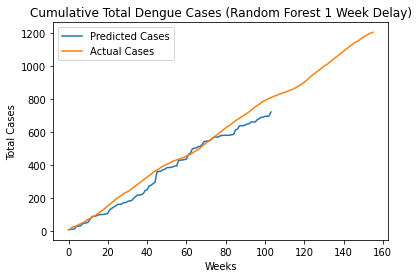

In [ ]:
sj_test_y_cumsum_array = np.array(iq_test_y) 
sj_y_predicted_cumsum_array = np.array(iq_predicted_full_RF) 

predicted_data = pd.DataFrame(sj_test_y_cumsum_array,columns=['Predicted Cases'])
predicted_plot = predicted_data.cumsum()

actual_data = pd.DataFrame(sj_y_predicted_cumsum_array, columns=['Actual Cases'])
actual_plot = actual_data.cumsum()

plt.figure();

ax=predicted_plot.plot();
actual_plot.plot(ax=ax);

plt.title("Cumulative Total Dengue Cases (Random Forest 1 Week Delay)")
plt.xlabel("Weeks")
plt.ylabel("Total Cases")

plt.show();

#**Converting model results and concatenating for predictions**

#**Random Forest Conversion**

In [ ]:
iq_predicted_full_RF = iq_full_model.predict(iqCorrect_test_rel_vars_filled_NAs).astype(int)
sj_predicted_full_RF = sj_full_model.predict(sjCorrect_test_rel_vars_filled_NAs).astype(int)

#**Gradient Boost Conversion**

In [ ]:
iq_predicted_GB = iq_predicted_GB.astype(int)
sj_predicted_GB = sj_predicted_GB.astype(int)

In [ ]:
iq_predicted_full_GB = iq_full_model.predict(iqCorrect_test_filled_NAs).astype(int)
sj_predicted_full_GB = sj_full_model.predict(sjCorrect_test_filled_NAs).astype(int)

#**Neural Network Conversion**

In [ ]:
iq_predicted_full_NN = iq_full_model.predict(iqCorrect_test_filled_NAs).astype(int)
sj_predicted_full_NN = sj_full_model.predict(sjCorrect_test_filled_NAs).astype(int)

#**XGBoost Conversion**

In [ ]:
iq_predicted_full_XGB = iq_full_model.predict(iqCorrect_test_filled_NAs).astype(int)
sj_predicted_full_XGB = sj_full_model.predict(sjCorrect_test_filled_NAs).astype(int)

In [ ]:
iq_predicted_full_XGB = iq_full_model.predict(iqCorrect_test_rel_vars_filled_NAs).astype(int)
sj_predicted_full_XGB = sj_full_model.predict(sjCorrect_test_rel_vars_filled_NAs).astype(int)

#**Additional Plotting Tests**

We can plot our predicted vs actual to see how well our model generalizes

No handles with labels found to put in legend.


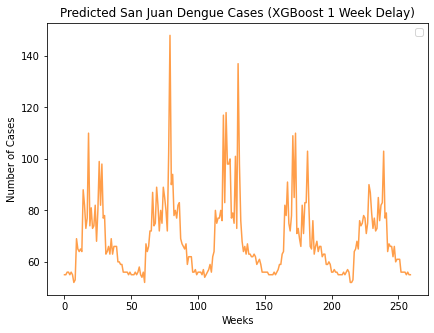

In [ ]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(sj_predicted_full_RF, color='#ff9e4a')
plt.title("Predicted San Juan Dengue Cases (XGBoost 1 Week Delay)")
plt.xlabel("Weeks")
plt.ylabel("Number of Cases")
plt.plot()
#plot ground truth to compare predictions vs real

plt.legend()



We can also calculate a cumulative sum plot to check predicted vs actual total cases, by using the test and predicted data.

#**Submission Procedures**

#**Random Forest Submission**

In [ ]:
submission = pd.read_csv('submission_format.csv', index_col=[0, 1, 2])

submission.reset_index()

submission.total_cases = np.concatenate([sj_predicted_RF, iq_predicted_RF])

submission.to_csv('RandomForestWith2WeekDelayAndGridSearch.csv')


In [ ]:
submission = pd.read_csv('submission_format.csv', index_col=[0, 1, 2])

submission.reset_index()

submission.total_cases = np.concatenate([sj_predicted_full_RF, iq_predicted_full_RF])



submission.to_csv('RandomForestWithRelVarsNoDelayWithHPOByHandAndOnly2YearSpikeTrain.csv')

#**Gradient Boosting Submission**

In [ ]:
submission = pd.read_csv('submission_format.csv', index_col=[0, 1, 2])

submission.reset_index()

submission.total_cases = np.concatenate([sj_predicted_GB, iq_predicted_GB])



submission.to_csv('Gradient Boosting Submission w Hard Coded Test Size.csv')

In [ ]:
submission = pd.read_csv('submission_format.csv', index_col=[0, 1, 2])

submission.reset_index()

submission.total_cases = np.concatenate([sj_predicted_full_GB, iq_predicted_full_GB])



submission.to_csv('GradientBoostingWith1WeekDelayandFullModelTest.csv')

#**Neural Network Submission**

In [ ]:
submission = pd.read_csv('submission_format.csv', index_col=[0, 1, 2])

submission.reset_index()

submission.total_cases = np.concatenate([sj_predicted_full_NN, iq_predicted_full_NN])



submission.to_csv('Neural Network Submission with 1 Week Delay 2.csv')

#**XGBoost Submission**

In [ ]:
submission = pd.read_csv('submission_format.csv', index_col=[0, 1, 2])

submission.reset_index()

submission.total_cases = np.concatenate([sj_predicted_full_XGB, iq_predicted_full_XGB])



submission.to_csv('XGBoostNoDelayWithRelVarsAndHPOByHand.csv')

#**Negative Binomial Model** 

#**IQ Negative Binomial**

In [ ]:
%matplotlib inline

from __future__ import print_function
from __future__ import division

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# just for the sake of this blog post!
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
def iq_preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want

    #previously had #'reanalysis_dew_point_temp_k' in it
    features = ['reanalysis_specific_humidity_g_per_kg', 
                'reanalysis_dew_point_temp_k',
                #'station_max_temp_c',
                #'reanalysis_min_air_temp_k',
                #'weekofyear_feature',
                #'year_feature',
                'station_min_temp_c',
                'station_avg_temp_c']

    df = df[features]
    
    df['reanalysis_specific_humidity_g_per_kg'].fillna(df['reanalysis_specific_humidity_g_per_kg'].mean(),inplace = True)
    df['reanalysis_dew_point_temp_k'].fillna(df['reanalysis_dew_point_temp_k'].mean(),inplace = True)
    #df['station_max_temp_c'].fillna(df['station_max_temp_c'].mean(),inplace = True)
    #df['reanalysis_min_air_temp_k'].fillna(df['reanalysis_min_air_temp_k'].mean(),inplace = True)
    df['station_min_temp_c'].fillna(df['station_min_temp_c'].mean(),inplace = True)
    df['station_avg_temp_c'].fillna(df['station_avg_temp_c'].mean(),inplace = True)
  
    
    # fill missing values
    #df.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df = df.join(labels)
    
    # separate san juan and iquitos
    #sj = df.loc['sj']
    iq = df.loc['iq']
    
    #return sj, iq
    return iq

In [ ]:
#iq_train = iq_preprocess_data('dengue_features_train_iq_year_weekofyear_added.csv',
                            #labels_path="dengue_labels_train.csv")

iq_train = iq_preprocess_data('dengue_features_train.csv',
                            labels_path="dengue_labels_train.csv")

#**SJ Negative Binomial**

In [ ]:
def sj_preprocess_data(data_path, labels_path=None):
    # load data and set index to city, year, weekofyear
    df2 = pd.read_csv(data_path, index_col=[0, 1, 2])
    
    # select features we want

    #previously had #'reanalysis_dew_point_temp_k' in it
    features = ['reanalysis_specific_humidity_g_per_kg', 
                'reanalysis_dew_point_temp_k',
                'reanalysis_air_temp_k',
                'station_max_temp_c',
                'reanalysis_min_air_temp_k',
                'month',
                'year_feature',
                'weekofyear_feature',
                'station_avg_temp_c',
                'station_min_temp_c']

    df2 = df2[features]
    
    df2['reanalysis_specific_humidity_g_per_kg'].fillna(df2['reanalysis_specific_humidity_g_per_kg'].mean(),inplace = True)
    df2['reanalysis_dew_point_temp_k'].fillna(df2['reanalysis_dew_point_temp_k'].mean(),inplace = True)
    df2['reanalysis_air_temp_k'].fillna(df2['reanalysis_air_temp_k'].mean(),inplace = True)
    df2['station_max_temp_c'].fillna(df2['station_max_temp_c'].mean(),inplace = True)
    df2['reanalysis_min_air_temp_k'].fillna(df2['reanalysis_min_air_temp_k'].mean(),inplace = True)
    df2['station_avg_temp_c'].fillna(df2['station_avg_temp_c'].mean(),inplace = True)
    df2['station_min_temp_c'].fillna(df2['station_min_temp_c'].mean(),inplace = True)
  
    # fill missing values
    #df2.fillna(method='ffill', inplace=True)

    # add labels to dataframe
    if labels_path:
        labels = pd.read_csv(labels_path, index_col=[0, 1, 2])
        df2 = df2.join(labels)
    
    # separate san juan and iquitos
    sj = df2.loc['sj']
    #iq = df.loc['iq']
    
    #return sj, iq
    return sj

In [ ]:
sj_train = sj_preprocess_data('dengue_features_train_sj_year_weekofyear_month_added.csv',
                            labels_path="dengue_labels_train.csv")


#**Sanity check visualizing**

In [ ]:
sj_train.describe()

reanalysis_specific_humidity_g_per_kg  ...  total_cases
count                             936.000000  ...   936.000000
mean                               16.553652  ...    34.180556
std                                 1.555984  ...    51.381372
min                                11.715714  ...     0.000000
25%                                15.248214  ...     9.000000
50%                                16.832143  ...    19.000000
75%                                17.854286  ...    37.000000
max                                19.440000  ...   461.000000

[8 rows x 11 columns]

In [ ]:
iq_train.describe()

reanalysis_specific_humidity_g_per_kg  ...  total_cases
count                             520.000000  ...   520.000000
mean                               17.093420  ...     7.565385
std                                 1.440511  ...    10.765478
min                                12.111429  ...     0.000000
25%                                16.121429  ...     1.000000
50%                                17.420714  ...     5.000000
75%                                18.176786  ...     9.000000
max                                20.461429  ...   116.000000

[8 rows x 9 columns]

In [ ]:
sj_train

reanalysis_specific_humidity_g_per_kg  ...  total_cases
year weekofyear                                         ...             
1990 18                                      14.012857  ...            4
     19                                      15.372857  ...            5
     20                                      16.848571  ...            4
     21                                      16.672857  ...            3
     22                                      17.210000  ...            6
...                                                ...  ...          ...
2008 13                                      13.644286  ...            4
     14                                      14.662857  ...            3
     15                                      14.184286  ...            1
     16                                      13.858571  ...            3
     17                                      15.671429  ...            5

[936 rows x 11 columns]

In [ ]:
iq_train

reanalysis_specific_humidity_g_per_kg  ...  total_cases
year weekofyear                                         ...             
2000 26                                      16.651429  ...            0
     27                                      16.862857  ...            0
     28                                      17.120000  ...            0
     29                                      14.431429  ...            0
     30                                      15.444286  ...            0
...                                                ...  ...          ...
2010 21                                      18.485714  ...            5
     22                                      18.070000  ...            8
     23                                      17.008571  ...            1
     24                                      16.815714  ...            1
     25                                      17.355714  ...            4

[520 rows x 8 columns]

In [ ]:
sj_train_subtrain = sj_train.head(800)
sj_train_subtest = sj_train.tail(sj_train.shape[0] - 800)

iq_train_subtrain = iq_train.head(400)
iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

In [ ]:
sj_train_subtrain

reanalysis_specific_humidity_g_per_kg  ...  total_cases
year weekofyear                                         ...             
1990 18                                      14.012857  ...            4
     19                                      15.372857  ...            5
     20                                      16.848571  ...            4
     21                                      16.672857  ...            3
     22                                      17.210000  ...            6
...                                                ...  ...          ...
2005 32                                      18.938571  ...           82
     33                                      18.720000  ...          126
     34                                      18.174286  ...          119
     35                                      18.867143  ...          137
     36                                      18.157143  ...          131

[800 rows x 11 columns]

In [ ]:
sj_train_subtest

reanalysis_specific_humidity_g_per_kg  ...  total_cases
year weekofyear                                         ...             
2005 37                                      19.440000  ...          112
     38                                      18.505714  ...           82
     39                                      18.704286  ...           73
     40                                      18.498571  ...           43
     41                                      18.035714  ...           55
...                                                ...  ...          ...
2008 13                                      13.644286  ...            4
     14                                      14.662857  ...            3
     15                                      14.184286  ...            1
     16                                      13.858571  ...            3
     17                                      15.671429  ...            5

[136 rows x 11 columns]

In [ ]:
iq_train_subtrain

reanalysis_specific_humidity_g_per_kg  ...  total_cases
year weekofyear                                         ...             
2000 26                                      16.651429  ...            0
     27                                      16.862857  ...            0
     28                                      17.120000  ...            0
     29                                      14.431429  ...            0
     30                                      15.444286  ...            0
...                                                ...  ...          ...
2008 6                                       16.284286  ...           37
     7                                       18.557143  ...           20
     8                                       17.130000  ...           29
     9                                       17.947143  ...           25
     10                                      17.064286  ...           23

[400 rows x 8 columns]

In [ ]:
iq_train_subtest

reanalysis_specific_humidity_g_per_kg  ...  total_cases
year weekofyear                                         ...             
2008 11                                      17.505714  ...            9
     12                                      16.997143  ...            3
     13                                      17.507143  ...            6
     14                                      17.421429  ...            6
     15                                      18.315714  ...            3
...                                                ...  ...          ...
2010 21                                      18.485714  ...            5
     22                                      18.070000  ...            8
     23                                      17.008571  ...            1
     24                                      16.815714  ...            1
     25                                      17.355714  ...            4

[120 rows x 8 columns]

#**Neg Binom continued**

In [ ]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def iq_get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"
                    #"station_max_temp_c + " \
                    #"year_feature + " \
                    #"weekofyear_feature + " \
                    #"reanalysis_min_air_temp_k"
    
    #grid = 10 ** np.arange(-8, -3, dtype=np.float64)
    grid = 10 ** np.arange(-40, 100, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
#sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = iq_get_best_model(iq_train_subtrain, iq_train_subtest)

best alpha =  100000000000.0
best score =  6.041666666666667


In [ ]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

def sj_get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_air_temp_k + " \
                    "station_max_temp_c + " \
                    "reanalysis_min_air_temp_k + " \
                    "month + " \
                    "year_feature + " \
                    "weekofyear_feature + " \
                    "station_min_temp_c + " \
                    "station_avg_temp_c"
    
    #grid = 10 ** np.arange(-8, -3, dtype=np.float64)
    grid = 10 ** np.arange(-8, 100, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,
                        data=train,
                        family=sm.families.NegativeBinomial(alpha=alpha))

        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = sj_get_best_model(sj_train_subtrain, sj_train_subtest)
#iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

best alpha =  10000000000.0
best score =  14.610294117647058


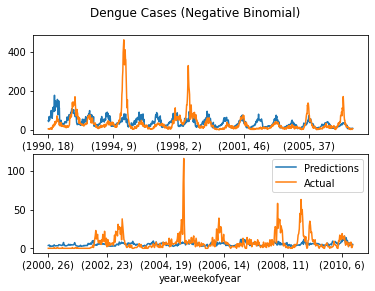

In [ ]:
figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
sj_train['fitted'] = sj_best_model.fittedvalues
sj_train.fitted.plot(ax=axes[0], label="Predictions")
sj_train.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
iq_train['fitted'] = iq_best_model.fittedvalues
iq_train.fitted.plot(ax=axes[1], label="Predictions")
iq_train.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Cases (Negative Binomial)")
plt.legend()

Submission format :

In [ ]:
#iq_test = iq_preprocess_data('dengue_features_test_iq.csv')
iq_test = iq_preprocess_data('dengue_features_test.csv')

In [ ]:
sj_test = sj_preprocess_data('dengue_features_test_sj.csv')

In [ ]:
#sj_test, iq_test = preprocess_data('dengue_features_test.csv')

sj_predictions = sj_best_model.predict(sj_test).astype(int)
iq_predictions = iq_best_model.predict(iq_test).astype(int)

submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv("NegativeBinomialSmallIQdictLargeSJdict.csv")

In [ ]:
sj_predictions.to_csv('sj_pred_count_test.csv')

#**DEPREPCATED (Forgot to separate city models) Refining XGBoost, retrying forward fill, using grid search params and RFE features**

In [ ]:
train_features = pd.read_csv("dengue_features_train.csv")
train_labels = pd.read_csv("dengue_labels_train.csv")
test = pd.read_csv("dengue_features_test.csv")

Attempting a grid search to find the optimal hyperparameters for the Random Forest.

In [ ]:
train_features.fillna(method='ffill', inplace=True)

test.fillna(method='ffill', inplace=True)

In [ ]:
features=['year', 'weekofyear', 'station_avg_temp_c', 'reanalysis_dew_point_temp_k', 'reanalysis_tdtr_k']

train_features = train_features[features]

In [ ]:
train_labels.drop(columns='city', inplace=True)
train_labels.drop(columns='year', inplace=True)
train_labels.drop(columns='weekofyear', inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2)

#**XGBoost Grid Search**

In [ ]:
#def rfr_model(train_features, train_target):
# Perform Grid-Search
from xgboost.sklearn import XGBRegressor
from hyperopt import hp

gsc = GridSearchCV(estimator=XGBRegressor(), 
                   param_grid={'max_depth': (2, 5, 10, 40),
                               'n_estimators': (100, 1000, 2000),
                               'gamma': [0, 2, 4, 6],
                               'colsample_bytree': (0.5, 0.75, 1),
                               'reg_alpha': (1, 20, 40),
                               'reg_lambda': [1, 3, 5],
                               'min_child_weight': (0,1)
                               },cv=5, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)
    
grid_result = gsc.fit(sj_train_X, sj_train_y)
best_params = grid_result.best_params_
    
xgbr = xgb.XGBRegressor(max_depth=best_params["max_depth"],
                            n_estimators=best_params["n_estimators"],
                            gamma=best_params["gamma"],
                            colsample_bytree=int(best_params["colsample_bytree"]),
                            reg_alpha=best_params["reg_alpha"],
                            reg_lambda=best_params["reg_lambda"],
                            min_child_weight=best_params["min_child_weight"],
                            random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(xgbr, sj_train_X, sj_train_y, cv=10, scoring='neg_mean_absolute_error')

    #return scores

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#**XGBoost Model**

In [ ]:
#model = XGBRegressor(n_estimators=1500, learning_rate=0.009, max_depth=7, subsample=1, cosample_bytree=1, gamma=1)

[05:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:24.2132	validation_1-mae:23.8951
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:24.1188	validation_1-mae:23.8009
[2]	validation_0-mae:24.0249	validation_1-mae:23.7071
[3]	validation_0-mae:23.9315	validation_1-mae:23.6135
[4]	validation_0-mae:23.8387	validation_1-mae:23.5204
[5]	validation_0-mae:23.7461	validation_1-mae:23.4277
[6]	validation_0-mae:23.6541	validation_1-mae:23.3353
[7]	validation_0-mae:23.5622	validation_1-mae:23.2433
[8]	validation_0-mae:23.4708	validation_1-mae:23.1516
[9]	validation_0-mae:23.3799	validation_1-mae:23.0603
[10]	validation_0-mae:23.2894	validation_1-mae:22.9694
[11]	validation_0-mae:23.1993	validation_1-mae:22.8788
[12]	validation_0-mae:23.1098	validation_1-mae:22.7886
[13]	valida

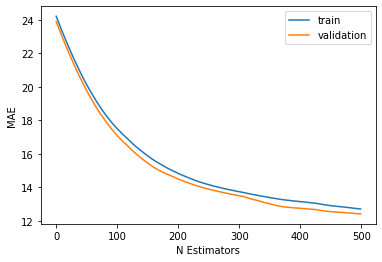

In [ ]:
model = XGBRegressor(n_estimators=500, learning_rate=0.004)

evalset = [(X_train, y_train), (X_test, y_test)]

#model.fit(X_train, y_train)
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='mae', eval_set=evalset)

model.fit(X_train, y_train, eval_metric='mae', eval_set=evalset)

yhat = model.predict(X_test)
score = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % score)
# retrieve performance metrics
results = model.evals_result()
# plot learning curves
plt.plot(results['validation_0']['mae'], label='train')
plt.plot(results['validation_1']['mae'], label='validation')
# show the legend
plt.xlabel("N Estimators")
plt.ylabel("MAE")
plt.legend()
# show the plot
plt.show()

In [ ]:
xgb_pred = model.predict(X_test)

print(mean_absolute_error(xgb_pred, y_test))

12.420014026230328


In [ ]:
model.fit(train_features, train_labels)

[05:48:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.004, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
test_features = test[features]

In [ ]:
xgb_test_pred = model.predict(test_features).astype(int)

In [ ]:
submission=pd.read_csv('submission_format.csv', index_col=[0,1,2])
submission.total_cases=xgb_test_pred
submission.to_csv('XGBwithForwardFillAndRFEAndLearningCurve.csv')